<a href="https://colab.research.google.com/github/Mattia-Colbertaldo/PrimacyRL/blob/main/dopamine_prl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General information on the execution on the Notebook
- The notebook is designed to be executed with a GPU activated but will work without
- The notebook should ***never*** be run with _run all_, as the exectution time can be extremely high and the notebook might request session restarts!
***The notebook might require restarts and updates to some source code...Pay attention to the comments***

- The last section is very relevant for the results and has a high execution time of > 1h
- ***Warning: The demo zipped files if downloaded are already ~1GB***

In [1]:
# @title Installation of packages and games (might be unused)

# Install some prerequired dependencies
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf

!pip install atari-py
!pip install ale-py
!pip install dm_control

!wget https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz
!mkdir /root/.mujoco/
!tar -xf mujoco210-linux-x86_64.tar.gz -C /root/.mujoco
import os
os.environ['LD_LIBRARY_PATH'] += ':/root/.mujoco/mujoco210/bin'

# Install Mujoco python bindings
!pip install gym
!pip install free-mujoco-py
#!git clone https://github.com/openai/mujoco-py
#%cd mujoco-py
#!pip install -r requirements.txt
#!pip install -r requirements.dev.txt
#!pip install -e . --no-cache
#%cd ..
#!pip install mujoco-py
#!pip install "cython<3"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
software-properties-common is already the newest version (0.99.22.7).
The following additional packages will be installed:
  libegl-dev libgl-dev libgles-dev libgles1 libglu1-mesa libglu1-mesa-dev libglvnd-core-dev
  libglvnd-dev libglx-dev libopengl-dev libosmesa6
The following NEW packages will be installed:
  libegl-dev libgl-dev libgl1-mesa-dev libgl1-mesa-glx libgles-dev libgles1 libglew-dev
  libglu1-mesa libglu1-mesa-dev libglvnd-core-dev libglvnd-dev libglx-dev libopengl-dev libosmesa6
  libosmesa6-dev
0 upgraded, 15 newly installed, 0 to remove and 19 not upgraded.
Need to get 3,952 kB of archives.
After this operation, 18.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:3 http://archive.ubuntu.com/ubuntu 

***Restart the environment after this step!!!***

In [1]:
import os
os.environ['LD_LIBRARY_PATH'] += ':/root/.mujoco/mujoco210/bin'

In [ ]:
# @title Test of the Mujoco env. ***Only execute if you really want to test***
import os
os.environ['LD_LIBRARY_PATH'] += ':/root/.mujoco/mujoco210/bin'
import mujoco_py
mj_path = mujoco_py.utils.discover_mujoco()
xml_path = os.path.join(mj_path, 'model', 'humanoid.xml')
model = mujoco_py.load_model_from_path(xml_path)
sim = mujoco_py.MjSim(model)

print(sim.data.qpos)
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sim.step()
print(sim.data.qpos)

Compiling /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.10/dist-packages/mujoco_py/cymj.pyx


INFO:root:running build_ext
INFO:root:building 'mujoco_py.cymj' extension
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-310/usr/local/lib
INFO:root:creating /usr/local/lib/python3.10/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_310_linuxcpuextensionbuilder/temp.linux-x86_64-cpython-31

In [2]:
# @title Install Dopamine from source
!git clone https://github.com/google/dopamine
!pip install -r dopamine/requirements.txt

# Install the dopamine package itself (required as there might be previous unseen instalations)
%cd dopamine
!pip install .
%cd ..

Cloning into 'dopamine'...
remote: Enumerating objects: 3989, done.
remote: Counting objects: 100% (1467/1467), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 3989 (delta 1168), reused 1150 (delta 1150), pack-reused 2522
Receiving objects: 100% (3989/3989), 21.12 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (2663/2663), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.

In [1]:
# @title Import dependencies and set up base path
import numpy as np
import os
#import gin
#gin.enter_interactive_mode()
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

BASE_PATH = '/tmp/colab_dopamine_run'  # @param

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes
/usr/local/lib/python3.10/dist-packages/gin/tf/__init__.py:48: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/flax/linen/module.py:77: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr, jax.dtypes.prng_key) for runtime detection of typed prng keys.
  KeyArray = Union[jax.Array, jax.random.KeyArray]  # pylint: disable=invalid-name
/usr/local/lib/python3.10/dist-packages/flax/linen/recurrent.py:45: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr, jax.dtypes.prng_key) for runtime detect

# Cartpole with two Agents

In [8]:
DQN_PATH = os.path.join(BASE_PATH, 'cartpole/dqn')

# Modified from dopamine/agents/dqn/config/dqn_cartpole.gin
dqn_config = """
# Hyperparameters for a simple DQN-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables

DQNAgent.observation_shape = %gym_lib.CARTPOLE_OBSERVATION_SHAPE
DQNAgent.observation_dtype = %gym_lib.CARTPOLE_OBSERVATION_DTYPE
DQNAgent.stack_size = %gym_lib.CARTPOLE_STACK_SIZE
DQNAgent.network = @gym_lib.CartpoleDQNNetwork
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:*'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'CartPole'
create_gym_environment.version = 'v1'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 100
Runner.training_steps = 100
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 10000  # Default max episode length.

WrappedReplayBuffer.replay_capacity = 50000
WrappedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config, skip_unknown=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([],
 ['dopamine.discrete_domains.gym_lib',
  'dopamine.discrete_domains.run_experiment',
  'dopamine.agents.dqn.dqn_agent',
  'dopamine.replay_memory.circular_replay_buffer',
  'gin.tf.external_configurables'])

In [9]:
# @title Train DQN on Cartpole
from absl import logging
logging.set_verbosity('debug')
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
print('Will train DQN agent, please be patient, may be a while...')
dqn_runner.run_experiment()
print('Done training!')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:absl:Creating TrainRunner ...
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
INFO:abs

Will train DQN agent, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 9.25
INFO:absl:Average training steps per second: 238.22
INFO:absl:[Iteration 0]: Train/NumEpisodes = 109
[Iteration 0]: Train/AverageReturns = 9.247706422018348
[Iteration 0]: Train/AverageStepsPerSecond = 238.22161899773968



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 246.15
INFO:absl:[Iteration 1]: Train/NumEpisodes = 103
[Iteration 1]: Train/AverageReturns = 9.728155339805825
[Iteration 1]: Train/AverageStepsPerSecond = 246.152587813437



INFO:absl:Average undiscounted return per training episode: 18.85
INFO:absl:Average training steps per second: 292.03
INFO:absl:[Iteration 2]: Train/NumEpisodes = 54
[Iteration 2]: Train/AverageReturns = 18.85185185185185
[Iteration 2]: Train/AverageStepsPerSecond = 292.02613748614266



INFO:absl:Average undiscounted return per training episode: 244.00
INFO:absl:Average training steps per second: 329.18
INFO:absl:[Iteration 3]: Train/NumEpisodes = 5
[Iteration 3]: Train/AverageReturns = 244.0
[Iteration 3]: Train/AverageStepsPerSecond = 329.1842641579348



INFO:absl:Average undiscounted return per training episode: 159.71
INFO:absl:Average training steps per second: 275.79
INFO:absl:[Iteration 4]: Train/NumEpisodes = 7
[Iteration 4]: Train/AverageReturns = 159.71428571428572
[Iteration 4]: Train/AverageStepsPerSecond = 275.79479388225764



INFO:absl:Average undiscounted return per training episode: 299.50
INFO:absl:Average training steps per second: 331.90
INFO:absl:[Iteration 5]: Train/NumEpisodes = 4
[Iteration 5]: Train/AverageReturns = 299.5
[Iteration 5]: Train/AverageStepsPerSecond = 331.9003533294424



INFO:absl:Average undiscounted return per training episode: 214.00
INFO:absl:Average training steps per second: 320.11
INFO:absl:[Iteration 6]: Train/NumEpisodes = 6
[Iteration 6]: Train/AverageReturns = 214.0
[Iteration 6]: Train/AverageStepsPerSecond = 320.10687192233297



INFO:absl:Average undiscounted return per training episode: 153.57
INFO:absl:Average training steps per second: 255.66
INFO:absl:[Iteration 7]: Train/NumEpisodes = 7
[Iteration 7]: Train/AverageReturns = 153.57142857142858
[Iteration 7]: Train/AverageStepsPerSecond = 255.65946521541414



INFO:absl:Average undiscounted return per training episode: 266.75
INFO:absl:Average training steps per second: 331.97
INFO:absl:[Iteration 8]: Train/NumEpisodes = 4
[Iteration 8]: Train/AverageReturns = 266.75
[Iteration 8]: Train/AverageStepsPerSecond = 331.9673115492418



INFO:absl:Average undiscounted return per training episode: 252.00
INFO:absl:Average training steps per second: 327.63
INFO:absl:[Iteration 9]: Train/NumEpisodes = 4
[Iteration 9]: Train/AverageReturns = 252.0
[Iteration 9]: Train/AverageStepsPerSecond = 327.6322355348585



INFO:absl:Average undiscounted return per training episode: 256.25
INFO:absl:Average training steps per second: 254.74
INFO:absl:[Iteration 10]: Train/NumEpisodes = 4
[Iteration 10]: Train/AverageReturns = 256.25
[Iteration 10]: Train/AverageStepsPerSecond = 254.74045033266407



INFO:absl:Average undiscounted return per training episode: 303.00
INFO:absl:Average training steps per second: 326.84
INFO:absl:[Iteration 11]: Train/NumEpisodes = 4
[Iteration 11]: Train/AverageReturns = 303.0
[Iteration 11]: Train/AverageStepsPerSecond = 326.8351869973061



INFO:absl:Average undiscounted return per training episode: 188.17
INFO:absl:Average training steps per second: 329.60
INFO:absl:[Iteration 12]: Train/NumEpisodes = 6
[Iteration 12]: Train/AverageReturns = 188.16666666666666
[Iteration 12]: Train/AverageStepsPerSecond = 329.5955322719862



INFO:absl:Average undiscounted return per training episode: 228.40
INFO:absl:Average training steps per second: 255.69
INFO:absl:[Iteration 13]: Train/NumEpisodes = 5
[Iteration 13]: Train/AverageReturns = 228.4
[Iteration 13]: Train/AverageStepsPerSecond = 255.6935863278341



INFO:absl:Average undiscounted return per training episode: 280.20
INFO:absl:Average training steps per second: 333.62
INFO:absl:[Iteration 14]: Train/NumEpisodes = 5
[Iteration 14]: Train/AverageReturns = 280.2
[Iteration 14]: Train/AverageStepsPerSecond = 333.62032373472726



INFO:absl:Average undiscounted return per training episode: 218.00
INFO:absl:Average training steps per second: 276.09
INFO:absl:[Iteration 15]: Train/NumEpisodes = 5
[Iteration 15]: Train/AverageReturns = 218.0
[Iteration 15]: Train/AverageStepsPerSecond = 276.09448104097925



INFO:absl:Average undiscounted return per training episode: 224.80
INFO:absl:Average training steps per second: 328.81
INFO:absl:[Iteration 16]: Train/NumEpisodes = 5
[Iteration 16]: Train/AverageReturns = 224.8
[Iteration 16]: Train/AverageStepsPerSecond = 328.8132437647405



INFO:absl:Average undiscounted return per training episode: 298.75
INFO:absl:Average training steps per second: 324.59
INFO:absl:[Iteration 17]: Train/NumEpisodes = 4
[Iteration 17]: Train/AverageReturns = 298.75
[Iteration 17]: Train/AverageStepsPerSecond = 324.58788447966333



INFO:absl:Average undiscounted return per training episode: 1622.50
INFO:absl:Average training steps per second: 301.61
INFO:absl:[Iteration 18]: Train/NumEpisodes = 2
[Iteration 18]: Train/AverageReturns = 1622.5
[Iteration 18]: Train/AverageStepsPerSecond = 301.60547476706125



INFO:absl:Average undiscounted return per training episode: 4791.00
INFO:absl:Average training steps per second: 302.44
INFO:absl:[Iteration 19]: Train/NumEpisodes = 1
[Iteration 19]: Train/AverageReturns = 4791.0
[Iteration 19]: Train/AverageStepsPerSecond = 302.43594788205473



INFO:absl:Average undiscounted return per training episode: 504.50
INFO:absl:Average training steps per second: 327.81
INFO:absl:[Iteration 20]: Train/NumEpisodes = 2
[Iteration 20]: Train/AverageReturns = 504.5
[Iteration 20]: Train/AverageStepsPerSecond = 327.8115794744174



INFO:absl:Average undiscounted return per training episode: 710.33
INFO:absl:Average training steps per second: 292.97
INFO:absl:[Iteration 21]: Train/NumEpisodes = 3
[Iteration 21]: Train/AverageReturns = 710.3333333333334
[Iteration 21]: Train/AverageStepsPerSecond = 292.9722873340086



INFO:absl:Average undiscounted return per training episode: 706.50
INFO:absl:Average training steps per second: 331.82
INFO:absl:[Iteration 22]: Train/NumEpisodes = 2
[Iteration 22]: Train/AverageReturns = 706.5
[Iteration 22]: Train/AverageStepsPerSecond = 331.82221874343355



INFO:absl:Average undiscounted return per training episode: 347.67
INFO:absl:Average training steps per second: 256.45
INFO:absl:[Iteration 23]: Train/NumEpisodes = 3
[Iteration 23]: Train/AverageReturns = 347.6666666666667
[Iteration 23]: Train/AverageStepsPerSecond = 256.4528159511896



INFO:absl:Average undiscounted return per training episode: 234.00
INFO:absl:Average training steps per second: 326.33
INFO:absl:[Iteration 24]: Train/NumEpisodes = 5
[Iteration 24]: Train/AverageReturns = 234.0
[Iteration 24]: Train/AverageStepsPerSecond = 326.32584362460636



INFO:absl:Average undiscounted return per training episode: 640.00
INFO:absl:Average training steps per second: 287.48
INFO:absl:[Iteration 25]: Train/NumEpisodes = 3
[Iteration 25]: Train/AverageReturns = 640.0
[Iteration 25]: Train/AverageStepsPerSecond = 287.4842793429774



INFO:absl:Average undiscounted return per training episode: 294.25
INFO:absl:Average training steps per second: 325.51
INFO:absl:[Iteration 26]: Train/NumEpisodes = 4
[Iteration 26]: Train/AverageReturns = 294.25
[Iteration 26]: Train/AverageStepsPerSecond = 325.5077087836649



INFO:absl:Average undiscounted return per training episode: 306.00
INFO:absl:Average training steps per second: 272.63
INFO:absl:[Iteration 27]: Train/NumEpisodes = 5
[Iteration 27]: Train/AverageReturns = 306.0
[Iteration 27]: Train/AverageStepsPerSecond = 272.6280983941062



INFO:absl:Average undiscounted return per training episode: 525.50
INFO:absl:Average training steps per second: 336.89
INFO:absl:[Iteration 28]: Train/NumEpisodes = 2
[Iteration 28]: Train/AverageReturns = 525.5
[Iteration 28]: Train/AverageStepsPerSecond = 336.89441072776367



INFO:absl:Average undiscounted return per training episode: 347.00
INFO:absl:Average training steps per second: 255.79
INFO:absl:[Iteration 29]: Train/NumEpisodes = 3
[Iteration 29]: Train/AverageReturns = 347.0
[Iteration 29]: Train/AverageStepsPerSecond = 255.7892586414038



INFO:absl:Average undiscounted return per training episode: 542.00
INFO:absl:Average training steps per second: 325.86
INFO:absl:[Iteration 30]: Train/NumEpisodes = 3
[Iteration 30]: Train/AverageReturns = 542.0
[Iteration 30]: Train/AverageStepsPerSecond = 325.86364461237883



INFO:absl:Average undiscounted return per training episode: 430.33
INFO:absl:Average training steps per second: 265.51
INFO:absl:[Iteration 31]: Train/NumEpisodes = 3
[Iteration 31]: Train/AverageReturns = 430.3333333333333
[Iteration 31]: Train/AverageStepsPerSecond = 265.51181999955475



INFO:absl:Average undiscounted return per training episode: 350.33
INFO:absl:Average training steps per second: 330.06
INFO:absl:[Iteration 32]: Train/NumEpisodes = 3
[Iteration 32]: Train/AverageReturns = 350.3333333333333
[Iteration 32]: Train/AverageStepsPerSecond = 330.06201196446796



INFO:absl:Average undiscounted return per training episode: 361.33
INFO:absl:Average training steps per second: 260.49
INFO:absl:[Iteration 33]: Train/NumEpisodes = 3
[Iteration 33]: Train/AverageReturns = 361.3333333333333
[Iteration 33]: Train/AverageStepsPerSecond = 260.48846245294123



INFO:absl:Average undiscounted return per training episode: 1020.00
INFO:absl:Average training steps per second: 328.31
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 1020.0
[Iteration 34]: Train/AverageStepsPerSecond = 328.3102923926794



INFO:absl:Average undiscounted return per training episode: 305.50
INFO:absl:Average training steps per second: 267.96
INFO:absl:[Iteration 35]: Train/NumEpisodes = 4
[Iteration 35]: Train/AverageReturns = 305.5
[Iteration 35]: Train/AverageStepsPerSecond = 267.960967734515



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 330.38
INFO:absl:[Iteration 36]: Train/NumEpisodes = 7
[Iteration 36]: Train/AverageReturns = 149.0
[Iteration 36]: Train/AverageStepsPerSecond = 330.37643434194985



INFO:absl:Average undiscounted return per training episode: 356.00
INFO:absl:Average training steps per second: 281.55
INFO:absl:[Iteration 37]: Train/NumEpisodes = 4
[Iteration 37]: Train/AverageReturns = 356.0
[Iteration 37]: Train/AverageStepsPerSecond = 281.55169017122705



INFO:absl:Average undiscounted return per training episode: 102.90
INFO:absl:Average training steps per second: 348.76
INFO:absl:[Iteration 38]: Train/NumEpisodes = 10
[Iteration 38]: Train/AverageReturns = 102.9
[Iteration 38]: Train/AverageStepsPerSecond = 348.7590970566852



INFO:absl:Average undiscounted return per training episode: 87.33
INFO:absl:Average training steps per second: 313.98
INFO:absl:[Iteration 39]: Train/NumEpisodes = 12
[Iteration 39]: Train/AverageReturns = 87.33333333333333
[Iteration 39]: Train/AverageStepsPerSecond = 313.98332476997325



INFO:absl:Average undiscounted return per training episode: 86.58
INFO:absl:Average training steps per second: 346.58
INFO:absl:[Iteration 40]: Train/NumEpisodes = 12
[Iteration 40]: Train/AverageReturns = 86.58333333333333
[Iteration 40]: Train/AverageStepsPerSecond = 346.58006988096184



INFO:absl:Average undiscounted return per training episode: 101.18
INFO:absl:Average training steps per second: 346.78
INFO:absl:[Iteration 41]: Train/NumEpisodes = 11
[Iteration 41]: Train/AverageReturns = 101.18181818181819
[Iteration 41]: Train/AverageStepsPerSecond = 346.777106588717



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 334.72
INFO:absl:[Iteration 42]: Train/NumEpisodes = 9
[Iteration 42]: Train/AverageReturns = 112.0
[Iteration 42]: Train/AverageStepsPerSecond = 334.7167726269148



INFO:absl:Average undiscounted return per training episode: 107.70
INFO:absl:Average training steps per second: 355.55
INFO:absl:[Iteration 43]: Train/NumEpisodes = 10
[Iteration 43]: Train/AverageReturns = 107.7
[Iteration 43]: Train/AverageStepsPerSecond = 355.5506289853943



INFO:absl:Average undiscounted return per training episode: 110.40
INFO:absl:Average training steps per second: 276.25
INFO:absl:[Iteration 44]: Train/NumEpisodes = 10
[Iteration 44]: Train/AverageReturns = 110.4
[Iteration 44]: Train/AverageStepsPerSecond = 276.2491429914596



INFO:absl:Average undiscounted return per training episode: 98.82
INFO:absl:Average training steps per second: 339.83
INFO:absl:[Iteration 45]: Train/NumEpisodes = 11
[Iteration 45]: Train/AverageReturns = 98.81818181818181
[Iteration 45]: Train/AverageStepsPerSecond = 339.83138515021886



INFO:absl:Average undiscounted return per training episode: 96.73
INFO:absl:Average training steps per second: 265.77
INFO:absl:[Iteration 46]: Train/NumEpisodes = 11
[Iteration 46]: Train/AverageReturns = 96.72727272727273
[Iteration 46]: Train/AverageStepsPerSecond = 265.76927462310283



INFO:absl:Average undiscounted return per training episode: 95.18
INFO:absl:Average training steps per second: 343.17
INFO:absl:[Iteration 47]: Train/NumEpisodes = 11
[Iteration 47]: Train/AverageReturns = 95.18181818181819
[Iteration 47]: Train/AverageStepsPerSecond = 343.16610809057



INFO:absl:Average undiscounted return per training episode: 95.18
INFO:absl:Average training steps per second: 276.51
INFO:absl:[Iteration 48]: Train/NumEpisodes = 11
[Iteration 48]: Train/AverageReturns = 95.18181818181819
[Iteration 48]: Train/AverageStepsPerSecond = 276.5057781195785



INFO:absl:Average undiscounted return per training episode: 90.67
INFO:absl:Average training steps per second: 346.15
INFO:absl:[Iteration 49]: Train/NumEpisodes = 12
[Iteration 49]: Train/AverageReturns = 90.66666666666667
[Iteration 49]: Train/AverageStepsPerSecond = 346.1533342896021



INFO:absl:Average undiscounted return per training episode: 91.55
INFO:absl:Average training steps per second: 322.34
INFO:absl:[Iteration 50]: Train/NumEpisodes = 11
[Iteration 50]: Train/AverageReturns = 91.54545454545455
[Iteration 50]: Train/AverageStepsPerSecond = 322.34306852723677



INFO:absl:Average undiscounted return per training episode: 84.62
INFO:absl:Average training steps per second: 342.98
INFO:absl:[Iteration 51]: Train/NumEpisodes = 13
[Iteration 51]: Train/AverageReturns = 84.61538461538461
[Iteration 51]: Train/AverageStepsPerSecond = 342.984667687899



INFO:absl:Average undiscounted return per training episode: 100.27
INFO:absl:Average training steps per second: 343.60
INFO:absl:[Iteration 52]: Train/NumEpisodes = 11
[Iteration 52]: Train/AverageReturns = 100.27272727272727
[Iteration 52]: Train/AverageStepsPerSecond = 343.60204016986415



INFO:absl:Average undiscounted return per training episode: 109.10
INFO:absl:Average training steps per second: 337.60
INFO:absl:[Iteration 53]: Train/NumEpisodes = 10
[Iteration 53]: Train/AverageReturns = 109.1
[Iteration 53]: Train/AverageStepsPerSecond = 337.59962403560445



INFO:absl:Average undiscounted return per training episode: 115.11
INFO:absl:Average training steps per second: 353.53
INFO:absl:[Iteration 54]: Train/NumEpisodes = 9
[Iteration 54]: Train/AverageReturns = 115.11111111111111
[Iteration 54]: Train/AverageStepsPerSecond = 353.52728379795445



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 275.03
INFO:absl:[Iteration 55]: Train/NumEpisodes = 9
[Iteration 55]: Train/AverageReturns = 116.0
[Iteration 55]: Train/AverageStepsPerSecond = 275.0256004712083



INFO:absl:Average undiscounted return per training episode: 120.11
INFO:absl:Average training steps per second: 347.09
INFO:absl:[Iteration 56]: Train/NumEpisodes = 9
[Iteration 56]: Train/AverageReturns = 120.11111111111111
[Iteration 56]: Train/AverageStepsPerSecond = 347.09141233184135



INFO:absl:Average undiscounted return per training episode: 130.00
INFO:absl:Average training steps per second: 267.87
INFO:absl:[Iteration 57]: Train/NumEpisodes = 8
[Iteration 57]: Train/AverageReturns = 130.0
[Iteration 57]: Train/AverageStepsPerSecond = 267.8678234768354



INFO:absl:Average undiscounted return per training episode: 126.62
INFO:absl:Average training steps per second: 348.74
INFO:absl:[Iteration 58]: Train/NumEpisodes = 8
[Iteration 58]: Train/AverageReturns = 126.625
[Iteration 58]: Train/AverageStepsPerSecond = 348.73952186218105



INFO:absl:Average undiscounted return per training episode: 136.12
INFO:absl:Average training steps per second: 274.39
INFO:absl:[Iteration 59]: Train/NumEpisodes = 8
[Iteration 59]: Train/AverageReturns = 136.125
[Iteration 59]: Train/AverageStepsPerSecond = 274.3880304362097



INFO:absl:Average undiscounted return per training episode: 164.71
INFO:absl:Average training steps per second: 355.55
INFO:absl:[Iteration 60]: Train/NumEpisodes = 7
[Iteration 60]: Train/AverageReturns = 164.71428571428572
[Iteration 60]: Train/AverageStepsPerSecond = 355.5462610290466



INFO:absl:Average undiscounted return per training episode: 203.20
INFO:absl:Average training steps per second: 342.63
INFO:absl:[Iteration 61]: Train/NumEpisodes = 5
[Iteration 61]: Train/AverageReturns = 203.2
[Iteration 61]: Train/AverageStepsPerSecond = 342.6330745649621



INFO:absl:Average undiscounted return per training episode: 256.60
INFO:absl:Average training steps per second: 350.35
INFO:absl:[Iteration 62]: Train/NumEpisodes = 5
[Iteration 62]: Train/AverageReturns = 256.6
[Iteration 62]: Train/AverageStepsPerSecond = 350.3454228822586



INFO:absl:Average undiscounted return per training episode: 325.75
INFO:absl:Average training steps per second: 356.15
INFO:absl:[Iteration 63]: Train/NumEpisodes = 4
[Iteration 63]: Train/AverageReturns = 325.75
[Iteration 63]: Train/AverageStepsPerSecond = 356.1492167709599



INFO:absl:Average undiscounted return per training episode: 192.83
INFO:absl:Average training steps per second: 353.65
INFO:absl:[Iteration 64]: Train/NumEpisodes = 6
[Iteration 64]: Train/AverageReturns = 192.83333333333334
[Iteration 64]: Train/AverageStepsPerSecond = 353.6521667965677



INFO:absl:Average undiscounted return per training episode: 182.33
INFO:absl:Average training steps per second: 353.66
INFO:absl:[Iteration 65]: Train/NumEpisodes = 6
[Iteration 65]: Train/AverageReturns = 182.33333333333334
[Iteration 65]: Train/AverageStepsPerSecond = 353.6551625059144



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 300.93
INFO:absl:[Iteration 66]: Train/NumEpisodes = 8
[Iteration 66]: Train/AverageReturns = 137.0
[Iteration 66]: Train/AverageStepsPerSecond = 300.92949811470527



INFO:absl:Average undiscounted return per training episode: 124.67
INFO:absl:Average training steps per second: 347.88
INFO:absl:[Iteration 67]: Train/NumEpisodes = 9
[Iteration 67]: Train/AverageReturns = 124.66666666666667
[Iteration 67]: Train/AverageStepsPerSecond = 347.877668529255



INFO:absl:Average undiscounted return per training episode: 118.33
INFO:absl:Average training steps per second: 277.67
INFO:absl:[Iteration 68]: Train/NumEpisodes = 9
[Iteration 68]: Train/AverageReturns = 118.33333333333333
[Iteration 68]: Train/AverageStepsPerSecond = 277.6662264469721



INFO:absl:Average undiscounted return per training episode: 102.40
INFO:absl:Average training steps per second: 345.35
INFO:absl:[Iteration 69]: Train/NumEpisodes = 10
[Iteration 69]: Train/AverageReturns = 102.4
[Iteration 69]: Train/AverageStepsPerSecond = 345.35088206262003



INFO:absl:Average undiscounted return per training episode: 104.10
INFO:absl:Average training steps per second: 267.90
INFO:absl:[Iteration 70]: Train/NumEpisodes = 10
[Iteration 70]: Train/AverageReturns = 104.1
[Iteration 70]: Train/AverageStepsPerSecond = 267.89670209277807



KeyboardInterrupt: ignored

In [ ]:
# @title Load the configuration for C51.

C51_PATH = os.path.join(BASE_PATH, 'cartpole/c51')
# Modified from dopamine/agents/rainbow/config/c51_cartpole.gin
c51_config = """
# Hyperparameters for a simple C51-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.agents.dqn.dqn_agent
import dopamine.agents.rainbow.rainbow_agent
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.replay_memory.prioritized_replay_buffer
import gin.tf.external_configurables

RainbowAgent.observation_shape = %gym_lib.CARTPOLE_OBSERVATION_SHAPE
RainbowAgent.observation_dtype = %gym_lib.CARTPOLE_OBSERVATION_DTYPE
RainbowAgent.stack_size = %gym_lib.CARTPOLE_STACK_SIZE
RainbowAgent.network = @gym_lib.CartpoleRainbowNetwork
RainbowAgent.num_atoms = 51
RainbowAgent.vmax = 10.
RainbowAgent.gamma = 0.99
RainbowAgent.update_horizon = 1
RainbowAgent.min_replay_history = 500
RainbowAgent.update_period = 4
RainbowAgent.target_update_period = 100
RainbowAgent.epsilon_fn = @dqn_agent.identity_epsilon
RainbowAgent.replay_scheme = 'uniform'
RainbowAgent.tf_device = '/gpu:*'  # use '/cpu:*' for non-GPU version
RainbowAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'CartPole'
create_gym_environment.version = 'v0'
create_agent.agent_name = 'rainbow'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 50
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 1000  # Default max episode length.

WrappedPrioritizedReplayBuffer.replay_capacity = 50000
WrappedPrioritizedReplayBuffer.batch_size = 128
"""
gin.parse_config(c51_config, skip_unknown=False)

([],
 ['dopamine.agents.dqn.dqn_agent',
  'dopamine.agents.rainbow.rainbow_agent',
  'dopamine.discrete_domains.gym_lib',
  'dopamine.discrete_domains.run_experiment',
  'dopamine.replay_memory.prioritized_replay_buffer',
  'gin.tf.external_configurables'])

In [ ]:
# @title Train C51 on Cartpole
c51_runner = run_experiment.create_runner(C51_PATH, schedule='continuous_train')
print('Will train agent, please be patient, may be a while...')
c51_runner.run_experiment()
print('Done training!')


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Will train agent, please be patient, may be a while...
Done training!


In [10]:
# @title Load the training logs.
#data = colab_utils.read_experiment(DQN_PATH, verbose=True,
#                                   summary_keys=['train_episode_returns'])
#data['agent'] = 'DQN'
#data['run'] = 1

import collections
#parameter_set = collections.OrderedDict([
#    ('agent', ['DQN', 'C51']),
#    ('game', ['Cartpole'])
#])
parameter_set = collections.OrderedDict([
    ('agent', ['DQN']),
    ('game', ['Cartpole'])
])

data = colab_utils.read_experiment(DQN_PATH, verbose=True,
                                      parameter_set=parameter_set,
                              summary_keys=['train_episode_returns'])

#data2 = colab_utils.read_experiment(DQN_PATH, verbose=True,
#                                     parameter_set=parameter_set,
#                              summary_keys=['train_episode_returns'])
#data3 = colab_utils.read_experiment(DQN_PATH3, verbose=True,
#                                      parameter_set=parameter_set,
#                              summary_keys=['train_episode_returns'])

#datac51 = colab_utils.read_experiment(C51_PATH, verbose=True,
#                                      parameter_set=parameter_set,
#                              summary_keys=['train_episode_returns'])

#datac51['agent'] = 'C51'
#datac51['run'] = 1
data['agent'] = 'DQN'
data['run'] = 1
#data2['agent'] = 'DQN'
#data2['run'] = 2
#data = data.merge(data2, how='outer')
#data = data.merge(data3, how='outer')

Reading statistics from: /tmp/colab_dopamine_run/cartpole/dqn//logs/log_75
Reading statistics from: /tmp/colab_dopamine_run/cartpole/dqn2//logs/log_63
Reading statistics from: /tmp/colab_dopamine_run/cartpole/dqn3//logs/log_70


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

#import seaborn as sns
#import matplotlib.pyplot as plt
#
#fig, ax = plt.subplots(figsize=(16,8))
#sns.lineplot(x='iteration', y='train_episode_returns', hue='agent',
#             data=data, ax=ax)
#plt.title('Cartpole')
#plt.show()

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='agent',
              data=data, ax=ax)
plt.yscale('log')
plt.grid()
plt.title('Cartpole')
plt.show()

# Acrobot

In [4]:
# @title Load the configuration for DQN.

DQN_PATH = os.path.join(BASE_PATH, 'acrobot/dqn')
# Modified from dopamine/agents/dqn/config/dqn_acrobot.gin
dqn_config = """
# Hyperparameters for a simple DQN-style Acrobot agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.agents.dqn.dqn_agent
import dopamine.agents.rainbow.rainbow_agent
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.replay_memory.prioritized_replay_buffer
import gin.tf.external_configurables

RainbowAgent.observation_shape = %gym_lib.ACROBOT_OBSERVATION_SHAPE
RainbowAgent.observation_dtype = %gym_lib.ACROBOT_OBSERVATION_DTYPE
RainbowAgent.stack_size = %gym_lib.ACROBOT_STACK_SIZE
RainbowAgent.network = @gym_lib.AcrobotRainbowNetwork
RainbowAgent.num_atoms = 51
RainbowAgent.vmax = 10.
RainbowAgent.gamma = 0.99
RainbowAgent.update_horizon = 1
RainbowAgent.min_replay_history = 500
RainbowAgent.update_period = 4
RainbowAgent.target_update_period = 100
RainbowAgent.epsilon_fn = @dqn_agent.identity_epsilon
RainbowAgent.replay_scheme = 'uniform'
RainbowAgent.tf_device = '/gpu:*'  # use '/cpu:*' for non-GPU version
RainbowAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.1
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'Acrobot'
create_gym_environment.version = 'v1'
create_agent.agent_name = 'dqn'
Runner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 100
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 1000

WrappedPrioritizedReplayBuffer.replay_capacity = 50000
WrappedPrioritizedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config, skip_unknown=False)

([],
 ['dopamine.agents.dqn.dqn_agent',
  'dopamine.agents.rainbow.rainbow_agent',
  'dopamine.discrete_domains.gym_lib',
  'dopamine.discrete_domains.run_experiment',
  'dopamine.replay_memory.prioritized_replay_buffer',
  'gin.tf.external_configurables'])

In [8]:
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
print('Will train DQN agent, please be patient, may be a while...')
dqn_runner.run_experiment()
print('Done training!')

AssertionError: ignored

In [ ]:
import collections
parameter_set = collections.OrderedDict([
    ('agent', ['DQN']),
    ('game', ['Acrobot'])
])

data = colab_utils.read_experiment(DQN_PATH, verbose=True,
                                      parameter_set=parameter_set,
                              summary_keys=['train_episode_returns'])



data['agent'] = 'DQN'
data['run'] = 1


Reading statistics from: /tmp/colab_dopamine_run/dqn//logs/log_49


In [ ]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='agent',
              data=data, ax=ax)
plt.title('Acrobot')
plt.show()

# Play a different game

In [ ]:
from dopamine.agents.dqn import dqn_agent

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

GAME = 'Asterix'
LOG_PATH = os.path.join(BASE_PATH, 'dqn', GAME)

def create_dqn_agent(sess, environment, summary_writer=None):
  """The Runner class will expect a function of this type to create an agent."""
  return dqn_agent.DQNAgent(sess, num_actions=environment.action_space.n)

game_dqn_config = """
import dopamine.discrete_domains.atari_lib
import dopamine.discrete_domains.run_experiment
atari_lib.create_atari_environment.game_name = '{}'
atari_lib.create_atari_environment.sticky_actions = True
run_experiment.Runner.num_iterations = 200
run_experiment.Runner.training_steps = 10
run_experiment.Runner.max_steps_per_episode = 100
""".format(GAME)
gin.parse_config(game_dqn_config, skip_unknown=False)

In [ ]:
dqn_runner = run_experiment.TrainRunner(LOG_PATH, create_dqn_agent)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
print('Will train agent, please be patient, may be a while...')
dqn_runner.run_experiment()
print('Done training!')

Will train agent, please be patient, may be a while...
Done training!


In [ ]:
# @title Load the training logs.
dqn_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
dqn_data['agent'] = 'MyRandomDQN'
dqn_data['run_number'] = 1

Reading statistics from: /tmp/colab_dopamine_run/dqn/Asterix//logs/log_49


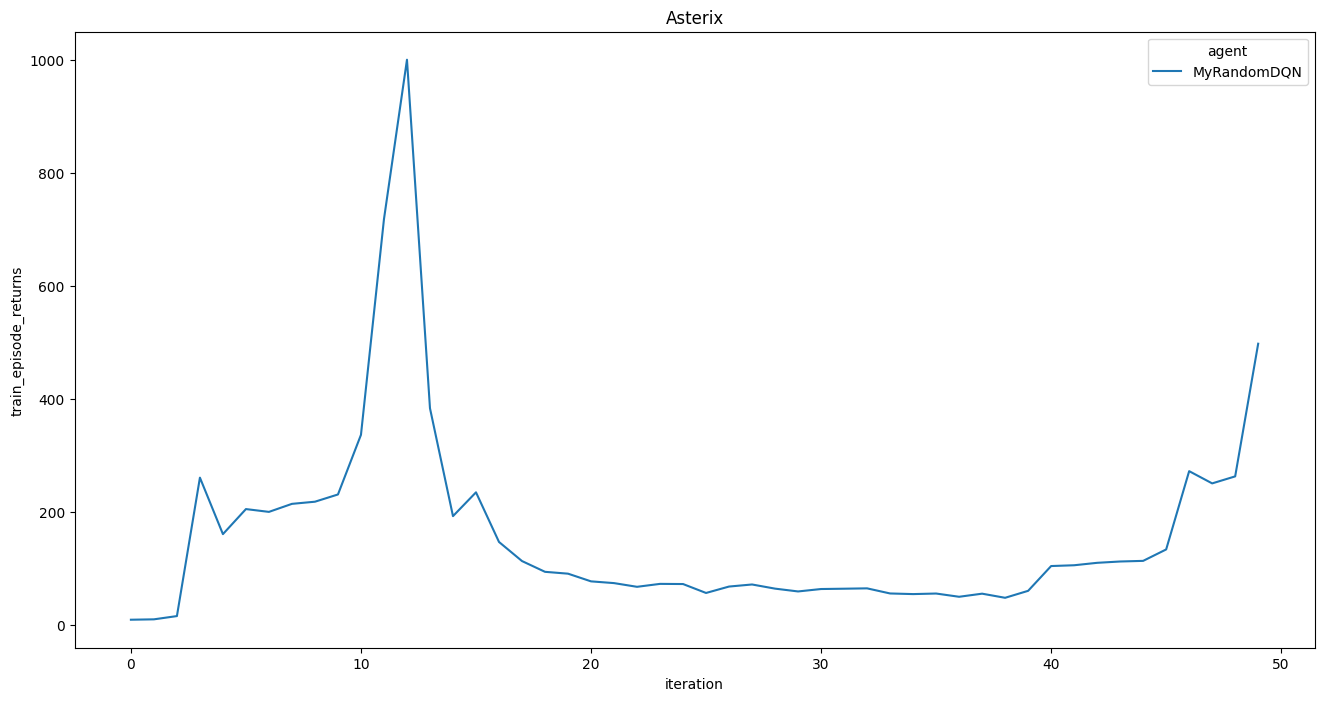

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(
    x='iteration', y='train_episode_returns', hue='agent',
    data=dqn_data, ax=ax)
plt.title(GAME)
plt.grid()
plt.show()

# Mujoco Environment Test

In [3]:
from dopamine.jax.agents.sac import sac_agent
from dopamine.continuous_domains import run_experiment
from dopamine.discrete_domains import gym_lib

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


In [4]:
GAME = 'HalfCheetah'
LOG_PATH = os.path.join(BASE_PATH, 'sac', GAME)


game_sac_config = """
SACAgent.reward_scale_factor = 0.1
SACAgent.network = @continuous_networks.SACNetwork
SACAgent.num_layers = 2
SACAgent.hidden_units = 256
SACAgent.gamma = 0.99
SACAgent.update_horizon = 1
SACAgent.min_replay_history = 1000  # agent steps
SACAgent.update_period = 1
SACAgent.target_update_type = 'soft'
SACAgent.target_smoothing_coefficient = 0.005
SACAgent.target_entropy = None  # Defaults to -num_action_dims/2
SACAgent.optimizer = 'adam'
SACAgent.seed = None  # Seed with the current time
SACAgent.observation_dtype = %sac_agent.STATE_DTYPE
create_optimizer.learning_rate = 3.0e-4
create_optimizer.beta1 = 0.9
create_optimizer.beta2 = 0.999
create_optimizer.eps = 1.0e-8

create_gym_environment.environment_name = '{}'
create_gym_environment.version = 'v4'
create_continuous_runner.schedule = 'continuous_train_and_eval'
create_continuous_agent.agent_name = 'sac'
ContinuousTrainRunner.create_environment_fn = @gym_lib.create_gym_environment
ContinuousRunner.num_iterations = 40
ContinuousRunner.training_steps = 500
ContinuousRunner.evaluation_steps = 10000  # agent steps
ContinuousRunner.max_steps_per_episode = 1000
ContinuousRunner.clip_rewards = False

circular_replay_buffer.OutOfGraphReplayBuffer.replay_capacity = 1000000
circular_replay_buffer.OutOfGraphReplayBuffer.batch_size = 256
""".format(GAME)
gin.parse_config(game_sac_config)

([], [])

In [5]:
from absl import app
from absl import flags
from absl import logging
logging.set_verbosity('debug')

sac_runner = run_experiment.create_continuous_runner(LOG_PATH)

<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
INFO:absl:Creating SACAgent agent with the following parameters:
INFO:absl:	 action_shape: (6,)
INFO:absl:	 action_dtype: float32
INFO:absl:	 action_limits: (array([-1., -1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1., 

In [6]:
sac_runner.run_experiment()

INFO:absl:Beginning training...
INFO:absl:Starting iteration 1


INFO:absl:Average undiscounted return per training episode: -368.17
INFO:absl:Average training steps per second: 28.12


INFO:absl:Average undiscounted return per evaluation episode: -0.73
INFO:absl:[Iteration 1]: Train/NumEpisodes = 1
[Iteration 1]: Train/AverageReturns = -368.1730123305455
[Iteration 1]: Train/AverageStepsPerSecond = 28.12378172219313
[Iteration 1]: Eval/NumEpisodes = 10
[Iteration 1]: Eval/AverageReturns = -0.7273067602209132

INFO:absl:Starting iteration 2


INFO:absl:Average undiscounted return per training episode: -265.25
INFO:absl:Average training steps per second: 34.16


INFO:absl:Average undiscounted return per evaluation episode: -0.58
INFO:absl:[Iteration 2]: Train/NumEpisodes = 1
[Iteration 2]: Train/AverageReturns = -265.2479667120899
[Iteration 2]: Train/AverageStepsPerSecond = 34.16054723543271
[Iteration 2]: Eval/NumEpisodes = 10
[Iteration 2]: Eval/AverageReturns = -0.580771176654606

INFO:absl:Starting iteration 3


INFO:absl:Average undiscounted return per training episode: -285.13
INFO:absl:Average training steps per second: 36.93


INFO:absl:Average undiscounted return per evaluation episode: -0.74
INFO:absl:[Iteration 3]: Train/NumEpisodes = 1
[Iteration 3]: Train/AverageReturns = -285.1333916982495
[Iteration 3]: Train/AverageStepsPerSecond = 36.93372286164709
[Iteration 3]: Eval/NumEpisodes = 10
[Iteration 3]: Eval/AverageReturns = -0.7428259528294734

INFO:absl:Starting iteration 4


INFO:absl:Average undiscounted return per training episode: -202.81
INFO:absl:Average training steps per second: 36.70


INFO:absl:Average undiscounted return per evaluation episode: -1.79
INFO:absl:[Iteration 4]: Train/NumEpisodes = 1
[Iteration 4]: Train/AverageReturns = -202.80539987746846
[Iteration 4]: Train/AverageStepsPerSecond = 36.70243734035892
[Iteration 4]: Eval/NumEpisodes = 10
[Iteration 4]: Eval/AverageReturns = -1.786626906932068

INFO:absl:Starting iteration 5


INFO:absl:Average undiscounted return per training episode: -245.53
INFO:absl:Average training steps per second: 36.81


INFO:absl:Average undiscounted return per evaluation episode: -3.74
INFO:absl:[Iteration 5]: Train/NumEpisodes = 1
[Iteration 5]: Train/AverageReturns = -245.52949784293216
[Iteration 5]: Train/AverageStepsPerSecond = 36.81073784601966
[Iteration 5]: Eval/NumEpisodes = 10
[Iteration 5]: Eval/AverageReturns = -3.7388243415426055

INFO:absl:Starting iteration 6


INFO:absl:Average undiscounted return per training episode: -256.27
INFO:absl:Average training steps per second: 36.94


INFO:absl:Average undiscounted return per evaluation episode: -5.22
INFO:absl:[Iteration 6]: Train/NumEpisodes = 1
[Iteration 6]: Train/AverageReturns = -256.26884395957126
[Iteration 6]: Train/AverageStepsPerSecond = 36.93764291053236
[Iteration 6]: Eval/NumEpisodes = 10
[Iteration 6]: Eval/AverageReturns = -5.2209841460967805

INFO:absl:Starting iteration 7


INFO:absl:Average undiscounted return per training episode: -196.67
INFO:absl:Average training steps per second: 36.46


INFO:absl:Average undiscounted return per evaluation episode: -5.32
INFO:absl:[Iteration 7]: Train/NumEpisodes = 1
[Iteration 7]: Train/AverageReturns = -196.67116527059574
[Iteration 7]: Train/AverageStepsPerSecond = 36.463149980913435
[Iteration 7]: Eval/NumEpisodes = 10
[Iteration 7]: Eval/AverageReturns = -5.318826816855006

INFO:absl:Starting iteration 8


INFO:absl:Average undiscounted return per training episode: -260.52
INFO:absl:Average training steps per second: 36.04


INFO:absl:Average undiscounted return per evaluation episode: -9.59
INFO:absl:[Iteration 8]: Train/NumEpisodes = 1
[Iteration 8]: Train/AverageReturns = -260.52207109415406
[Iteration 8]: Train/AverageStepsPerSecond = 36.041692558477294
[Iteration 8]: Eval/NumEpisodes = 10
[Iteration 8]: Eval/AverageReturns = -9.589616579924632

INFO:absl:Starting iteration 9


INFO:absl:Average undiscounted return per training episode: -252.60
INFO:absl:Average training steps per second: 36.33


INFO:absl:Average undiscounted return per evaluation episode: -14.04
INFO:absl:[Iteration 9]: Train/NumEpisodes = 1
[Iteration 9]: Train/AverageReturns = -252.60302891427986
[Iteration 9]: Train/AverageStepsPerSecond = 36.32774399814802
[Iteration 9]: Eval/NumEpisodes = 10
[Iteration 9]: Eval/AverageReturns = -14.038709746799114

INFO:absl:Starting iteration 10


INFO:absl:Average undiscounted return per training episode: -194.87
INFO:absl:Average training steps per second: 36.82


INFO:absl:Average undiscounted return per evaluation episode: 223.07
INFO:absl:[Iteration 10]: Train/NumEpisodes = 1
[Iteration 10]: Train/AverageReturns = -194.86849734974356
[Iteration 10]: Train/AverageStepsPerSecond = 36.818170474436215
[Iteration 10]: Eval/NumEpisodes = 10
[Iteration 10]: Eval/AverageReturns = 223.06783935792959

INFO:absl:Starting iteration 11


INFO:absl:Average undiscounted return per training episode: -195.80
INFO:absl:Average training steps per second: 36.89


INFO:absl:Average undiscounted return per evaluation episode: 104.19
INFO:absl:[Iteration 11]: Train/NumEpisodes = 1
[Iteration 11]: Train/AverageReturns = -195.80140085719202
[Iteration 11]: Train/AverageStepsPerSecond = 36.88973862629703
[Iteration 11]: Eval/NumEpisodes = 10
[Iteration 11]: Eval/AverageReturns = 104.1905053632424

INFO:absl:Starting iteration 12


INFO:absl:Average undiscounted return per training episode: -243.93
INFO:absl:Average training steps per second: 36.61


INFO:absl:Average undiscounted return per evaluation episode: 12.67
INFO:absl:[Iteration 12]: Train/NumEpisodes = 1
[Iteration 12]: Train/AverageReturns = -243.92634610154104
[Iteration 12]: Train/AverageStepsPerSecond = 36.6086085510848
[Iteration 12]: Eval/NumEpisodes = 10
[Iteration 12]: Eval/AverageReturns = 12.6724836375866

INFO:absl:Starting iteration 13


INFO:absl:Average undiscounted return per training episode: -207.67
INFO:absl:Average training steps per second: 36.79


INFO:absl:Average undiscounted return per evaluation episode: -141.68
INFO:absl:[Iteration 13]: Train/NumEpisodes = 1
[Iteration 13]: Train/AverageReturns = -207.6689580397556
[Iteration 13]: Train/AverageStepsPerSecond = 36.79033568809502
[Iteration 13]: Eval/NumEpisodes = 10
[Iteration 13]: Eval/AverageReturns = -141.68260363891224

INFO:absl:Starting iteration 14


INFO:absl:Average undiscounted return per training episode: -226.02
INFO:absl:Average training steps per second: 36.78


INFO:absl:Average undiscounted return per evaluation episode: -123.06
INFO:absl:[Iteration 14]: Train/NumEpisodes = 1
[Iteration 14]: Train/AverageReturns = -226.02329560182832
[Iteration 14]: Train/AverageStepsPerSecond = 36.7839007571076
[Iteration 14]: Eval/NumEpisodes = 10
[Iteration 14]: Eval/AverageReturns = -123.0560304849625

INFO:absl:Starting iteration 15


INFO:absl:Average undiscounted return per training episode: -233.68
INFO:absl:Average training steps per second: 36.29


INFO:absl:Average undiscounted return per evaluation episode: -146.87
INFO:absl:[Iteration 15]: Train/NumEpisodes = 1
[Iteration 15]: Train/AverageReturns = -233.6823070083376
[Iteration 15]: Train/AverageStepsPerSecond = 36.28862831166295
[Iteration 15]: Eval/NumEpisodes = 10
[Iteration 15]: Eval/AverageReturns = -146.87093487687784

INFO:absl:Starting iteration 16


INFO:absl:Average undiscounted return per training episode: -227.00
INFO:absl:Average training steps per second: 35.43


INFO:absl:Average undiscounted return per evaluation episode: -178.07
INFO:absl:[Iteration 16]: Train/NumEpisodes = 1
[Iteration 16]: Train/AverageReturns = -227.00105336727702
[Iteration 16]: Train/AverageStepsPerSecond = 35.434863242493286
[Iteration 16]: Eval/NumEpisodes = 10
[Iteration 16]: Eval/AverageReturns = -178.0700214201716

INFO:absl:Starting iteration 17


INFO:absl:Average undiscounted return per training episode: -195.19
INFO:absl:Average training steps per second: 36.27


INFO:absl:Average undiscounted return per evaluation episode: -158.10
INFO:absl:[Iteration 17]: Train/NumEpisodes = 1
[Iteration 17]: Train/AverageReturns = -195.19079751272463
[Iteration 17]: Train/AverageStepsPerSecond = 36.26785855045403
[Iteration 17]: Eval/NumEpisodes = 10
[Iteration 17]: Eval/AverageReturns = -158.09541960554822

INFO:absl:Starting iteration 18


INFO:absl:Average undiscounted return per training episode: -187.12
INFO:absl:Average training steps per second: 36.10


INFO:absl:Average undiscounted return per evaluation episode: -202.44
INFO:absl:[Iteration 18]: Train/NumEpisodes = 1
[Iteration 18]: Train/AverageReturns = -187.12206473070358
[Iteration 18]: Train/AverageStepsPerSecond = 36.103428187799345
[Iteration 18]: Eval/NumEpisodes = 10
[Iteration 18]: Eval/AverageReturns = -202.44108888412475

INFO:absl:Starting iteration 19


INFO:absl:Average undiscounted return per training episode: -212.17
INFO:absl:Average training steps per second: 36.22


INFO:absl:Average undiscounted return per evaluation episode: -163.01
INFO:absl:[Iteration 19]: Train/NumEpisodes = 1
[Iteration 19]: Train/AverageReturns = -212.17190386411335
[Iteration 19]: Train/AverageStepsPerSecond = 36.21603973480244
[Iteration 19]: Eval/NumEpisodes = 10
[Iteration 19]: Eval/AverageReturns = -163.00741575765437

INFO:absl:Starting iteration 20


INFO:absl:Average undiscounted return per training episode: -210.64
INFO:absl:Average training steps per second: 35.89


INFO:absl:Average undiscounted return per evaluation episode: -242.63
INFO:absl:[Iteration 20]: Train/NumEpisodes = 1
[Iteration 20]: Train/AverageReturns = -210.64101281194652
[Iteration 20]: Train/AverageStepsPerSecond = 35.8860997515919
[Iteration 20]: Eval/NumEpisodes = 10
[Iteration 20]: Eval/AverageReturns = -242.62789570792674

INFO:absl:Starting iteration 21


INFO:absl:Average undiscounted return per training episode: -156.89
INFO:absl:Average training steps per second: 35.98


INFO:absl:Average undiscounted return per evaluation episode: -230.24
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = -156.8890981716277
[Iteration 21]: Train/AverageStepsPerSecond = 35.978149550396225
[Iteration 21]: Eval/NumEpisodes = 10
[Iteration 21]: Eval/AverageReturns = -230.238779084187

INFO:absl:Starting iteration 22


INFO:absl:Average undiscounted return per training episode: -251.46
INFO:absl:Average training steps per second: 36.88


INFO:absl:Average undiscounted return per evaluation episode: -204.56
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = -251.45926819989978
[Iteration 22]: Train/AverageStepsPerSecond = 36.87990676478649
[Iteration 22]: Eval/NumEpisodes = 10
[Iteration 22]: Eval/AverageReturns = -204.5562176877965

INFO:absl:Starting iteration 23


INFO:absl:Average undiscounted return per training episode: -307.46
INFO:absl:Average training steps per second: 36.65


INFO:absl:Average undiscounted return per evaluation episode: -148.71
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = -307.4552422499289
[Iteration 23]: Train/AverageStepsPerSecond = 36.64693939065258
[Iteration 23]: Eval/NumEpisodes = 10
[Iteration 23]: Eval/AverageReturns = -148.71110870641766

INFO:absl:Starting iteration 24


INFO:absl:Average undiscounted return per training episode: -181.93
INFO:absl:Average training steps per second: 36.34


INFO:absl:Average undiscounted return per evaluation episode: -153.08
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = -181.928975331797
[Iteration 24]: Train/AverageStepsPerSecond = 36.34355063023589
[Iteration 24]: Eval/NumEpisodes = 10
[Iteration 24]: Eval/AverageReturns = -153.0765736005093

INFO:absl:Starting iteration 25


INFO:absl:Average undiscounted return per training episode: -113.95
INFO:absl:Average training steps per second: 36.73


INFO:absl:Average undiscounted return per evaluation episode: -190.18
INFO:absl:[Iteration 25]: Train/NumEpisodes = 1
[Iteration 25]: Train/AverageReturns = -113.9546903270548
[Iteration 25]: Train/AverageStepsPerSecond = 36.73431860001558
[Iteration 25]: Eval/NumEpisodes = 10
[Iteration 25]: Eval/AverageReturns = -190.1845284054939

INFO:absl:Starting iteration 26


KeyboardInterrupt: ignored

***Information about the Mujoco experiments***.    
- The experiments might run for a longer time.
- If the experiment fails after ~10 iterations, the file _summary_v2.py_ has to be updated by commenting or removing the line _tf.debugging.assert_scalar(data)_ <https://stackoverflow.com/questions/71935007/valueerror-expected-scalar-shape-saw-shape-1>
- After this action restart the environment and rerun all cells that carry environment imports or variables.

In [7]:
sac_data = colab_utils.read_experiment(
    LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
sac_data['agent'] = 'SAC'
sac_data['run_number'] = 1

Reading statistics from: /tmp/colab_dopamine_run/sac/HalfCheetah//logs/log_25


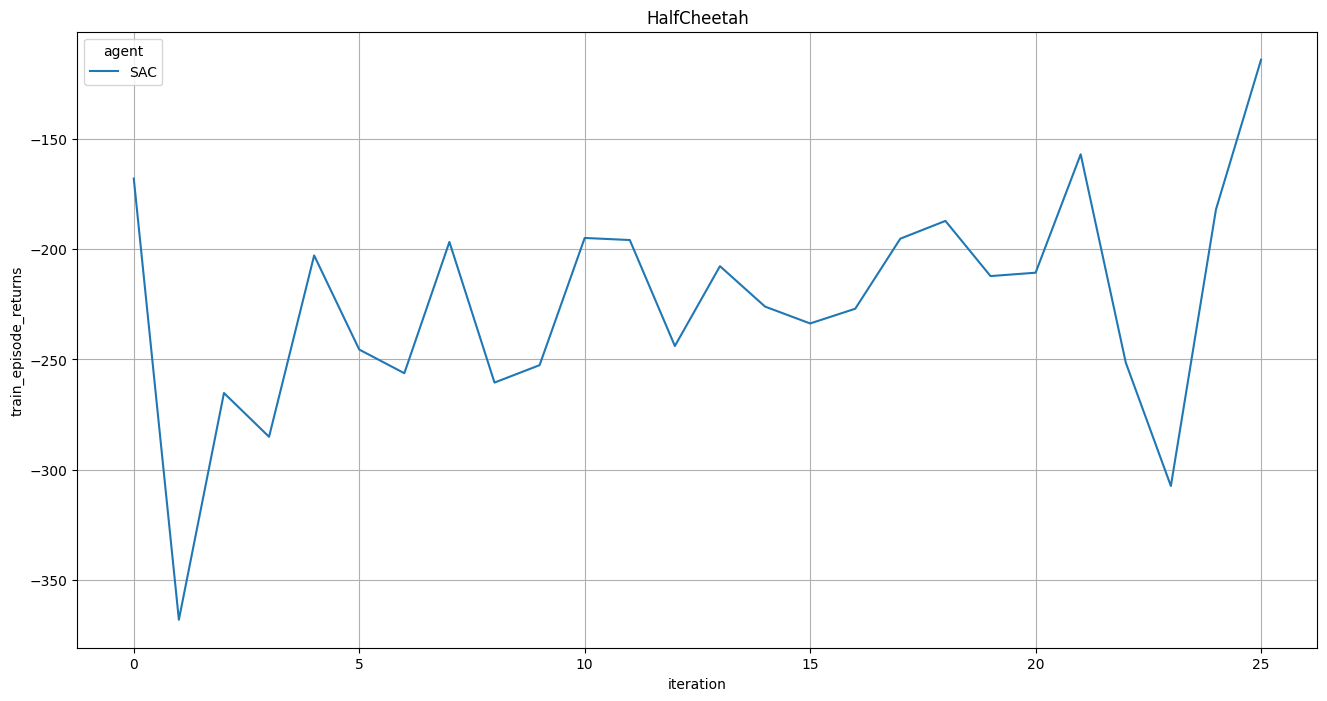

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(
    x='iteration', y='train_episode_returns', hue='agent',
    data=sac_data, ax=ax)
plt.title(GAME)
plt.grid()
plt.show()

# Training Loop (ca. 10 experiments) Initialized with Cartpole, but can be used with any environment.

## Set up the environment by parsing the config

In [13]:
MAIN_PATH = '/tmp/eval/run'

# Modified from dopamine/agents/dqn/config/dqn_cartpole.gin
dqn_config = """
# Hyperparameters for a simple DQN-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables

DQNAgent.observation_shape = %gym_lib.CARTPOLE_OBSERVATION_SHAPE
DQNAgent.observation_dtype = %gym_lib.CARTPOLE_OBSERVATION_DTYPE
DQNAgent.stack_size = %gym_lib.CARTPOLE_STACK_SIZE
DQNAgent.network = @gym_lib.CartpoleDQNNetwork
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:*'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'CartPole'
create_gym_environment.version = 'v1'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 100
Runner.training_steps = 100
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 10000  # Default max episode length.

WrappedReplayBuffer.replay_capacity = 50000
WrappedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config, skip_unknown=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([],
 ['dopamine.discrete_domains.gym_lib',
  'dopamine.discrete_domains.run_experiment',
  'dopamine.agents.dqn.dqn_agent',
  'dopamine.replay_memory.circular_replay_buffer',
  'gin.tf.external_configurables'])

In [14]:
from absl import logging
logging.set_verbosity('info')

log_files = list()

for i in range(10):
  LOG_PATH = MAIN_PATH + str(i)
  log_files.append(LOG_PATH)
  dqn_runner = run_experiment.create_runner(LOG_PATH, schedule='continuous_train')
  print('Will train DQN agent number {}, please be patient, may be a while...'.format(i))
  dqn_runner.run_experiment()
  print('Done training agent number {}!'.format(i))

INFO:absl:Creating TrainRunner ...
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_dev

Will train DQN agent number 0, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 286.19
INFO:absl:[Iteration 0]: Train/NumEpisodes = 12
[Iteration 0]: Train/AverageReturns = 8.916666666666666
[Iteration 0]: Train/AverageStepsPerSecond = 286.1857785367614



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 476.47
INFO:absl:[Iteration 1]: Train/NumEpisodes = 11
[Iteration 1]: Train/AverageReturns = 9.090909090909092
[Iteration 1]: Train/AverageStepsPerSecond = 476.47330795507344



INFO:absl:Average undiscounted return per training episode: 8.75
INFO:absl:Average training steps per second: 484.56
INFO:absl:[Iteration 2]: Train/NumEpisodes = 12
[Iteration 2]: Train/AverageReturns = 8.75
[Iteration 2]: Train/AverageStepsPerSecond = 484.55559492033035



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 483.47
INFO:absl:[Iteration 3]: Train/NumEpisodes = 12
[Iteration 3]: Train/AverageReturns = 8.916666666666666
[Iteration 3]: Train/AverageStepsPerSecond = 483.4687763931262



INFO:absl:Average undiscounted return per training episode: 9.00
INFO:absl:Average training steps per second: 55.94
INFO:absl:[Iteration 4]: Train/NumEpisodes = 12
[Iteration 4]: Train/AverageReturns = 9.0
[Iteration 4]: Train/AverageStepsPerSecond = 55.94228637481846



INFO:absl:Average undiscounted return per training episode: 8.75
INFO:absl:Average training steps per second: 201.95
INFO:absl:[Iteration 5]: Train/NumEpisodes = 12
[Iteration 5]: Train/AverageReturns = 8.75
[Iteration 5]: Train/AverageStepsPerSecond = 201.9508625061791



INFO:absl:Average undiscounted return per training episode: 8.67
INFO:absl:Average training steps per second: 216.26
INFO:absl:[Iteration 6]: Train/NumEpisodes = 12
[Iteration 6]: Train/AverageReturns = 8.666666666666666
[Iteration 6]: Train/AverageStepsPerSecond = 216.25772393958968



INFO:absl:Average undiscounted return per training episode: 8.75
INFO:absl:Average training steps per second: 141.34
INFO:absl:[Iteration 7]: Train/NumEpisodes = 12
[Iteration 7]: Train/AverageReturns = 8.75
[Iteration 7]: Train/AverageStepsPerSecond = 141.33520752500795



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 212.65
INFO:absl:[Iteration 8]: Train/NumEpisodes = 11
[Iteration 8]: Train/AverageReturns = 9.272727272727273
[Iteration 8]: Train/AverageStepsPerSecond = 212.64627878090207



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 212.04
INFO:absl:[Iteration 9]: Train/NumEpisodes = 11
[Iteration 9]: Train/AverageReturns = 9.181818181818182
[Iteration 9]: Train/AverageStepsPerSecond = 212.03742973166015



INFO:absl:Average undiscounted return per training episode: 8.75
INFO:absl:Average training steps per second: 197.37
INFO:absl:[Iteration 10]: Train/NumEpisodes = 12
[Iteration 10]: Train/AverageReturns = 8.75
[Iteration 10]: Train/AverageStepsPerSecond = 197.36795473642934



INFO:absl:Average undiscounted return per training episode: 10.60
INFO:absl:Average training steps per second: 215.79
INFO:absl:[Iteration 11]: Train/NumEpisodes = 10
[Iteration 11]: Train/AverageReturns = 10.6
[Iteration 11]: Train/AverageStepsPerSecond = 215.7897842132367



INFO:absl:Average undiscounted return per training episode: 18.00
INFO:absl:Average training steps per second: 223.60
INFO:absl:[Iteration 12]: Train/NumEpisodes = 6
[Iteration 12]: Train/AverageReturns = 18.0
[Iteration 12]: Train/AverageStepsPerSecond = 223.59507106908677



INFO:absl:Average undiscounted return per training episode: 28.00
INFO:absl:Average training steps per second: 219.14
INFO:absl:[Iteration 13]: Train/NumEpisodes = 4
[Iteration 13]: Train/AverageReturns = 28.0
[Iteration 13]: Train/AverageStepsPerSecond = 219.13650442973258



INFO:absl:Average undiscounted return per training episode: 26.40
INFO:absl:Average training steps per second: 233.46
INFO:absl:[Iteration 14]: Train/NumEpisodes = 5
[Iteration 14]: Train/AverageReturns = 26.4
[Iteration 14]: Train/AverageStepsPerSecond = 233.45973528068606



INFO:absl:Average undiscounted return per training episode: 27.00
INFO:absl:Average training steps per second: 166.54
INFO:absl:[Iteration 15]: Train/NumEpisodes = 5
[Iteration 15]: Train/AverageReturns = 27.0
[Iteration 15]: Train/AverageStepsPerSecond = 166.54451718561666



INFO:absl:Average undiscounted return per training episode: 25.50
INFO:absl:Average training steps per second: 160.04
INFO:absl:[Iteration 16]: Train/NumEpisodes = 4
[Iteration 16]: Train/AverageReturns = 25.5
[Iteration 16]: Train/AverageStepsPerSecond = 160.04026940037318



INFO:absl:Average undiscounted return per training episode: 32.25
INFO:absl:Average training steps per second: 238.21
INFO:absl:[Iteration 17]: Train/NumEpisodes = 4
[Iteration 17]: Train/AverageReturns = 32.25
[Iteration 17]: Train/AverageStepsPerSecond = 238.20539635285897



INFO:absl:Average undiscounted return per training episode: 38.67
INFO:absl:Average training steps per second: 229.11
INFO:absl:[Iteration 18]: Train/NumEpisodes = 3
[Iteration 18]: Train/AverageReturns = 38.666666666666664
[Iteration 18]: Train/AverageStepsPerSecond = 229.10930245261375



INFO:absl:Average undiscounted return per training episode: 40.00
INFO:absl:Average training steps per second: 222.23
INFO:absl:[Iteration 19]: Train/NumEpisodes = 3
[Iteration 19]: Train/AverageReturns = 40.0
[Iteration 19]: Train/AverageStepsPerSecond = 222.23116671295412



INFO:absl:Average undiscounted return per training episode: 134.00
INFO:absl:Average training steps per second: 234.75
INFO:absl:[Iteration 20]: Train/NumEpisodes = 1
[Iteration 20]: Train/AverageReturns = 134.0
[Iteration 20]: Train/AverageStepsPerSecond = 234.75006849910116



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 236.95
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = 122.0
[Iteration 21]: Train/AverageStepsPerSecond = 236.94602805631638



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 247.50
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = 129.0
[Iteration 22]: Train/AverageStepsPerSecond = 247.49797176759037



INFO:absl:Average undiscounted return per training episode: 187.00
INFO:absl:Average training steps per second: 169.04
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 187.0
[Iteration 23]: Train/AverageStepsPerSecond = 169.04059725167676



INFO:absl:Average undiscounted return per training episode: 222.00
INFO:absl:Average training steps per second: 283.43
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = 222.0
[Iteration 24]: Train/AverageStepsPerSecond = 283.43497803165855



INFO:absl:Average undiscounted return per training episode: 156.00
INFO:absl:Average training steps per second: 274.65
INFO:absl:[Iteration 25]: Train/NumEpisodes = 1
[Iteration 25]: Train/AverageReturns = 156.0
[Iteration 25]: Train/AverageStepsPerSecond = 274.64658139605166



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 261.23
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 148.0
[Iteration 26]: Train/AverageStepsPerSecond = 261.23288412584657



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 264.40
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 143.0
[Iteration 27]: Train/AverageStepsPerSecond = 264.39750337117187



INFO:absl:Average undiscounted return per training episode: 156.00
INFO:absl:Average training steps per second: 266.14
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 156.0
[Iteration 28]: Train/AverageStepsPerSecond = 266.13614885792856



INFO:absl:Average undiscounted return per training episode: 145.00
INFO:absl:Average training steps per second: 267.61
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 145.0
[Iteration 29]: Train/AverageStepsPerSecond = 267.6124057409312



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 264.67
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 144.0
[Iteration 30]: Train/AverageStepsPerSecond = 264.66776335105146



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 163.79
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 159.0
[Iteration 31]: Train/AverageStepsPerSecond = 163.78970098117472



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 249.73
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 139.0
[Iteration 32]: Train/AverageStepsPerSecond = 249.7316412362355



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 257.06
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 153.0
[Iteration 33]: Train/AverageStepsPerSecond = 257.0575575850241



INFO:absl:Average undiscounted return per training episode: 232.00
INFO:absl:Average training steps per second: 284.20
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 232.0
[Iteration 34]: Train/AverageStepsPerSecond = 284.19963749216544



INFO:absl:Average undiscounted return per training episode: 244.00
INFO:absl:Average training steps per second: 282.33
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 244.0
[Iteration 35]: Train/AverageStepsPerSecond = 282.3330553435151



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 256.83
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 148.0
[Iteration 36]: Train/AverageStepsPerSecond = 256.83081256506034



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 269.91
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 155.0
[Iteration 37]: Train/AverageStepsPerSecond = 269.91460194976094



INFO:absl:Average undiscounted return per training episode: 145.00
INFO:absl:Average training steps per second: 163.61
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 145.0
[Iteration 38]: Train/AverageStepsPerSecond = 163.6081630017809



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 261.72
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 141.0
[Iteration 39]: Train/AverageStepsPerSecond = 261.72391918821785



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 242.79
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 115.0
[Iteration 40]: Train/AverageStepsPerSecond = 242.7892133718431



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 250.54
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 135.0
[Iteration 41]: Train/AverageStepsPerSecond = 250.54082790753242



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 252.84
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 135.0
[Iteration 42]: Train/AverageStepsPerSecond = 252.83544181710042



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 253.72
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 135.0
[Iteration 43]: Train/AverageStepsPerSecond = 253.72411815314024



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 166.65
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 114.0
[Iteration 44]: Train/AverageStepsPerSecond = 166.65063049372992



INFO:absl:Average undiscounted return per training episode: 125.00
INFO:absl:Average training steps per second: 156.67
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 125.0
[Iteration 45]: Train/AverageStepsPerSecond = 156.67065299958105



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 232.67
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 115.0
[Iteration 46]: Train/AverageStepsPerSecond = 232.6720397015438



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 260.18
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 136.0
[Iteration 47]: Train/AverageStepsPerSecond = 260.18175606672287



INFO:absl:Average undiscounted return per training episode: 125.00
INFO:absl:Average training steps per second: 251.14
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 125.0
[Iteration 48]: Train/AverageStepsPerSecond = 251.14365669318192



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 256.77
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 137.0
[Iteration 49]: Train/AverageStepsPerSecond = 256.7673479601412



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 256.36
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 140.0
[Iteration 50]: Train/AverageStepsPerSecond = 256.3607755752812



INFO:absl:Average undiscounted return per training episode: 164.00
INFO:absl:Average training steps per second: 266.41
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 164.0
[Iteration 51]: Train/AverageStepsPerSecond = 266.4137267007133



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 243.65
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 121.0
[Iteration 52]: Train/AverageStepsPerSecond = 243.65141161186747



INFO:absl:Average undiscounted return per training episode: 150.00
INFO:absl:Average training steps per second: 162.43
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 150.0
[Iteration 53]: Train/AverageStepsPerSecond = 162.4316666899027



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 246.56
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 133.0
[Iteration 54]: Train/AverageStepsPerSecond = 246.55670372838927



INFO:absl:Average undiscounted return per training episode: 230.00
INFO:absl:Average training steps per second: 287.11
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 230.0
[Iteration 55]: Train/AverageStepsPerSecond = 287.1133423532766



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 266.11
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 157.0
[Iteration 56]: Train/AverageStepsPerSecond = 266.1143154112188



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 250.28
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 136.0
[Iteration 57]: Train/AverageStepsPerSecond = 250.2834843494213



INFO:absl:Average undiscounted return per training episode: 178.00
INFO:absl:Average training steps per second: 267.13
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 178.0
[Iteration 58]: Train/AverageStepsPerSecond = 267.12731254047594



INFO:absl:Average undiscounted return per training episode: 170.00
INFO:absl:Average training steps per second: 177.48
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 170.0
[Iteration 59]: Train/AverageStepsPerSecond = 177.47998087383476



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 260.22
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 153.0
[Iteration 60]: Train/AverageStepsPerSecond = 260.2151340593785



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 246.93
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 126.0
[Iteration 61]: Train/AverageStepsPerSecond = 246.93242375676925



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 238.56
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 129.0
[Iteration 62]: Train/AverageStepsPerSecond = 238.55807307109805



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 242.57
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 128.0
[Iteration 63]: Train/AverageStepsPerSecond = 242.56953841065646



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 243.71
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 128.0
[Iteration 64]: Train/AverageStepsPerSecond = 243.70555650630132



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 237.78
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 121.0
[Iteration 65]: Train/AverageStepsPerSecond = 237.77734861635264



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 154.20
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 117.0
[Iteration 66]: Train/AverageStepsPerSecond = 154.20230448645535



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 246.48
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 119.0
[Iteration 67]: Train/AverageStepsPerSecond = 246.4828864722908



INFO:absl:Average undiscounted return per training episode: 118.00
INFO:absl:Average training steps per second: 235.93
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 118.0
[Iteration 68]: Train/AverageStepsPerSecond = 235.9263135264588



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 240.20
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 114.0
[Iteration 69]: Train/AverageStepsPerSecond = 240.19753086419752



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 245.67
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 129.0
[Iteration 70]: Train/AverageStepsPerSecond = 245.66704912249318



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 239.99
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 120.0
[Iteration 71]: Train/AverageStepsPerSecond = 239.99095950803704



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 238.36
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 122.0
[Iteration 72]: Train/AverageStepsPerSecond = 238.36134979098753



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 154.18
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 122.0
[Iteration 73]: Train/AverageStepsPerSecond = 154.1765205685161



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 234.43
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 123.0
[Iteration 74]: Train/AverageStepsPerSecond = 234.42545339044858



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 246.77
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 128.0
[Iteration 75]: Train/AverageStepsPerSecond = 246.7711683586277



INFO:absl:Average undiscounted return per training episode: 130.00
INFO:absl:Average training steps per second: 229.51
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 130.0
[Iteration 76]: Train/AverageStepsPerSecond = 229.5088365146919



INFO:absl:Average undiscounted return per training episode: 146.00
INFO:absl:Average training steps per second: 254.28
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 146.0
[Iteration 77]: Train/AverageStepsPerSecond = 254.2820475661535



INFO:absl:Average undiscounted return per training episode: 200.00
INFO:absl:Average training steps per second: 267.01
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 200.0
[Iteration 78]: Train/AverageStepsPerSecond = 267.0143415906128



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 160.33
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 143.0
[Iteration 79]: Train/AverageStepsPerSecond = 160.33212168000483



INFO:absl:Average undiscounted return per training episode: 109.00
INFO:absl:Average training steps per second: 240.34
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 109.0
[Iteration 80]: Train/AverageStepsPerSecond = 240.34091696452182



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 227.80
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 123.0
[Iteration 81]: Train/AverageStepsPerSecond = 227.80394442619303



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 228.00
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 121.0
[Iteration 82]: Train/AverageStepsPerSecond = 228.0003576047847



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 231.47
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 126.0
[Iteration 83]: Train/AverageStepsPerSecond = 231.47393345416225



INFO:absl:Average undiscounted return per training episode: 261.00
INFO:absl:Average training steps per second: 277.06
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 261.0
[Iteration 84]: Train/AverageStepsPerSecond = 277.0573972815957



INFO:absl:Average undiscounted return per training episode: 214.00
INFO:absl:Average training steps per second: 176.02
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 214.0
[Iteration 85]: Train/AverageStepsPerSecond = 176.01934057245145



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 246.70
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 139.0
[Iteration 86]: Train/AverageStepsPerSecond = 246.7000656305975



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 252.39
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 174.0
[Iteration 87]: Train/AverageStepsPerSecond = 252.3929646232239



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 259.85
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 174.0
[Iteration 88]: Train/AverageStepsPerSecond = 259.84533943263403



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 246.04
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 174.0
[Iteration 89]: Train/AverageStepsPerSecond = 246.0391304655639



INFO:absl:Average undiscounted return per training episode: 204.00
INFO:absl:Average training steps per second: 254.82
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 204.0
[Iteration 90]: Train/AverageStepsPerSecond = 254.81509929783036



INFO:absl:Average undiscounted return per training episode: 188.00
INFO:absl:Average training steps per second: 169.24
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 188.0
[Iteration 91]: Train/AverageStepsPerSecond = 169.2383038334439



INFO:absl:Average undiscounted return per training episode: 183.00
INFO:absl:Average training steps per second: 268.91
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 183.0
[Iteration 92]: Train/AverageStepsPerSecond = 268.9146236529002



INFO:absl:Average undiscounted return per training episode: 264.00
INFO:absl:Average training steps per second: 267.71
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 264.0
[Iteration 93]: Train/AverageStepsPerSecond = 267.7135704136458



INFO:absl:Average undiscounted return per training episode: 502.00
INFO:absl:Average training steps per second: 292.58
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 502.0
[Iteration 94]: Train/AverageStepsPerSecond = 292.57675430460273



INFO:absl:Average undiscounted return per training episode: 276.00
INFO:absl:Average training steps per second: 280.85
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 276.0
[Iteration 95]: Train/AverageStepsPerSecond = 280.84567640060396



INFO:absl:Average undiscounted return per training episode: 306.00
INFO:absl:Average training steps per second: 203.98
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 306.0
[Iteration 96]: Train/AverageStepsPerSecond = 203.98100076255054



INFO:absl:Average undiscounted return per training episode: 151.00
INFO:absl:Average training steps per second: 249.44
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 151.0
[Iteration 97]: Train/AverageStepsPerSecond = 249.43873086890423



INFO:absl:Average undiscounted return per training episode: 230.00
INFO:absl:Average training steps per second: 271.20
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 230.0
[Iteration 98]: Train/AverageStepsPerSecond = 271.20268557280536



INFO:absl:Average undiscounted return per training episode: 537.00
INFO:absl:Average training steps per second: 307.72
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 537.0
[Iteration 99]: Train/AverageStepsPerSecond = 307.72438521146563

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7bb02c0b20>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 0!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 1, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 28.20
INFO:absl:Average training steps per second: 183.13
INFO:absl:[Iteration 0]: Train/NumEpisodes = 5
[Iteration 0]: Train/AverageReturns = 28.2
[Iteration 0]: Train/AverageStepsPerSecond = 183.13004283791759



INFO:absl:Average undiscounted return per training episode: 22.00
INFO:absl:Average training steps per second: 429.53
INFO:absl:[Iteration 1]: Train/NumEpisodes = 6
[Iteration 1]: Train/AverageReturns = 22.0
[Iteration 1]: Train/AverageStepsPerSecond = 429.5268849905196



INFO:absl:Average undiscounted return per training episode: 29.50
INFO:absl:Average training steps per second: 400.63
INFO:absl:[Iteration 2]: Train/NumEpisodes = 4
[Iteration 2]: Train/AverageReturns = 29.5
[Iteration 2]: Train/AverageStepsPerSecond = 400.6332319866857



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 420.37
INFO:absl:[Iteration 3]: Train/NumEpisodes = 1
[Iteration 3]: Train/AverageReturns = 112.0
[Iteration 3]: Train/AverageStepsPerSecond = 420.3679707060927



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 45.48
INFO:absl:[Iteration 4]: Train/NumEpisodes = 11
[Iteration 4]: Train/AverageReturns = 9.454545454545455
[Iteration 4]: Train/AverageStepsPerSecond = 45.48202240278935



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 170.65
INFO:absl:[Iteration 5]: Train/NumEpisodes = 11
[Iteration 5]: Train/AverageReturns = 9.727272727272727
[Iteration 5]: Train/AverageStepsPerSecond = 170.65115665369137



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 179.36
INFO:absl:[Iteration 6]: Train/NumEpisodes = 11
[Iteration 6]: Train/AverageReturns = 9.454545454545455
[Iteration 6]: Train/AverageStepsPerSecond = 179.35858673493303



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 184.78
INFO:absl:[Iteration 7]: Train/NumEpisodes = 11
[Iteration 7]: Train/AverageReturns = 9.727272727272727
[Iteration 7]: Train/AverageStepsPerSecond = 184.7776437388783



INFO:absl:Average undiscounted return per training episode: 14.71
INFO:absl:Average training steps per second: 203.42
INFO:absl:[Iteration 8]: Train/NumEpisodes = 7
[Iteration 8]: Train/AverageReturns = 14.714285714285714
[Iteration 8]: Train/AverageStepsPerSecond = 203.41956204929477



INFO:absl:Average undiscounted return per training episode: 16.83
INFO:absl:Average training steps per second: 200.48
INFO:absl:[Iteration 9]: Train/NumEpisodes = 6
[Iteration 9]: Train/AverageReturns = 16.833333333333332
[Iteration 9]: Train/AverageStepsPerSecond = 200.48068261679236



INFO:absl:Average undiscounted return per training episode: 26.75
INFO:absl:Average training steps per second: 210.16
INFO:absl:[Iteration 10]: Train/NumEpisodes = 4
[Iteration 10]: Train/AverageReturns = 26.75
[Iteration 10]: Train/AverageStepsPerSecond = 210.1584969416798



INFO:absl:Average undiscounted return per training episode: 11.78
INFO:absl:Average training steps per second: 128.79
INFO:absl:[Iteration 11]: Train/NumEpisodes = 9
[Iteration 11]: Train/AverageReturns = 11.777777777777779
[Iteration 11]: Train/AverageStepsPerSecond = 128.79253912331106



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 199.17
INFO:absl:[Iteration 12]: Train/NumEpisodes = 11
[Iteration 12]: Train/AverageReturns = 9.272727272727273
[Iteration 12]: Train/AverageStepsPerSecond = 199.17002582391416



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 195.53
INFO:absl:[Iteration 13]: Train/NumEpisodes = 11
[Iteration 13]: Train/AverageReturns = 9.454545454545455
[Iteration 13]: Train/AverageStepsPerSecond = 195.52953242273088



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 177.41
INFO:absl:[Iteration 14]: Train/NumEpisodes = 11
[Iteration 14]: Train/AverageReturns = 10.0
[Iteration 14]: Train/AverageStepsPerSecond = 177.41331568583192



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 194.18
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.454545454545455
[Iteration 15]: Train/AverageStepsPerSecond = 194.17702385504552



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 193.67
INFO:absl:[Iteration 16]: Train/NumEpisodes = 11
[Iteration 16]: Train/AverageReturns = 9.272727272727273
[Iteration 16]: Train/AverageStepsPerSecond = 193.66651184898487



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 122.51
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.272727272727273
[Iteration 17]: Train/AverageStepsPerSecond = 122.51442029170195



INFO:absl:Average undiscounted return per training episode: 11.33
INFO:absl:Average training steps per second: 186.25
INFO:absl:[Iteration 18]: Train/NumEpisodes = 9
[Iteration 18]: Train/AverageReturns = 11.333333333333334
[Iteration 18]: Train/AverageStepsPerSecond = 186.25363326469218



INFO:absl:Average undiscounted return per training episode: 13.00
INFO:absl:Average training steps per second: 191.35
INFO:absl:[Iteration 19]: Train/NumEpisodes = 8
[Iteration 19]: Train/AverageReturns = 13.0
[Iteration 19]: Train/AverageStepsPerSecond = 191.34774806231985



INFO:absl:Average undiscounted return per training episode: 84.00
INFO:absl:Average training steps per second: 244.14
INFO:absl:[Iteration 20]: Train/NumEpisodes = 2
[Iteration 20]: Train/AverageReturns = 84.0
[Iteration 20]: Train/AverageStepsPerSecond = 244.1372434480909



INFO:absl:Average undiscounted return per training episode: 105.00
INFO:absl:Average training steps per second: 190.51
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = 105.0
[Iteration 21]: Train/AverageStepsPerSecond = 190.5070953201816



INFO:absl:Average undiscounted return per training episode: 127.00
INFO:absl:Average training steps per second: 212.98
INFO:absl:[Iteration 22]: Train/NumEpisodes = 2
[Iteration 22]: Train/AverageReturns = 127.0
[Iteration 22]: Train/AverageStepsPerSecond = 212.9760392433681



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 224.19
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 129.0
[Iteration 23]: Train/AverageStepsPerSecond = 224.1891281792899



INFO:absl:Average undiscounted return per training episode: 94.50
INFO:absl:Average training steps per second: 245.39
INFO:absl:[Iteration 24]: Train/NumEpisodes = 2
[Iteration 24]: Train/AverageReturns = 94.5
[Iteration 24]: Train/AverageStepsPerSecond = 245.385333962746



INFO:absl:Average undiscounted return per training episode: 78.00
INFO:absl:Average training steps per second: 218.28
INFO:absl:[Iteration 25]: Train/NumEpisodes = 2
[Iteration 25]: Train/AverageReturns = 78.0
[Iteration 25]: Train/AverageStepsPerSecond = 218.28338246263925



INFO:absl:Average undiscounted return per training episode: 66.00
INFO:absl:Average training steps per second: 215.48
INFO:absl:[Iteration 26]: Train/NumEpisodes = 2
[Iteration 26]: Train/AverageReturns = 66.0
[Iteration 26]: Train/AverageStepsPerSecond = 215.4830444453526



INFO:absl:Average undiscounted return per training episode: 66.50
INFO:absl:Average training steps per second: 193.82
INFO:absl:[Iteration 27]: Train/NumEpisodes = 2
[Iteration 27]: Train/AverageReturns = 66.5
[Iteration 27]: Train/AverageStepsPerSecond = 193.81534672866803



INFO:absl:Average undiscounted return per training episode: 70.00
INFO:absl:Average training steps per second: 214.04
INFO:absl:[Iteration 28]: Train/NumEpisodes = 2
[Iteration 28]: Train/AverageReturns = 70.0
[Iteration 28]: Train/AverageStepsPerSecond = 214.0356627349206



INFO:absl:Average undiscounted return per training episode: 91.00
INFO:absl:Average training steps per second: 235.86
INFO:absl:[Iteration 29]: Train/NumEpisodes = 2
[Iteration 29]: Train/AverageReturns = 91.0
[Iteration 29]: Train/AverageStepsPerSecond = 235.86359545194583



INFO:absl:Average undiscounted return per training episode: 160.00
INFO:absl:Average training steps per second: 227.19
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 160.0
[Iteration 30]: Train/AverageStepsPerSecond = 227.18924802166646



INFO:absl:Average undiscounted return per training episode: 234.00
INFO:absl:Average training steps per second: 248.10
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 234.0
[Iteration 31]: Train/AverageStepsPerSecond = 248.0977823638153



INFO:absl:Average undiscounted return per training episode: 77.50
INFO:absl:Average training steps per second: 196.19
INFO:absl:[Iteration 32]: Train/NumEpisodes = 2
[Iteration 32]: Train/AverageReturns = 77.5
[Iteration 32]: Train/AverageStepsPerSecond = 196.19188334419738



INFO:absl:Average undiscounted return per training episode: 83.50
INFO:absl:Average training steps per second: 238.97
INFO:absl:[Iteration 33]: Train/NumEpisodes = 2
[Iteration 33]: Train/AverageReturns = 83.5
[Iteration 33]: Train/AverageStepsPerSecond = 238.97292738512766



INFO:absl:Average undiscounted return per training episode: 81.00
INFO:absl:Average training steps per second: 231.88
INFO:absl:[Iteration 34]: Train/NumEpisodes = 2
[Iteration 34]: Train/AverageReturns = 81.0
[Iteration 34]: Train/AverageStepsPerSecond = 231.8784104245377



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 204.65
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 120.0
[Iteration 35]: Train/AverageStepsPerSecond = 204.64902804043078



INFO:absl:Average undiscounted return per training episode: 145.00
INFO:absl:Average training steps per second: 221.29
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 145.0
[Iteration 36]: Train/AverageStepsPerSecond = 221.2885934367416



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 202.64
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 119.0
[Iteration 37]: Train/AverageStepsPerSecond = 202.6371194734511



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 173.02
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 148.0
[Iteration 38]: Train/AverageStepsPerSecond = 173.01729623906581



INFO:absl:Average undiscounted return per training episode: 113.00
INFO:absl:Average training steps per second: 199.82
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 113.0
[Iteration 39]: Train/AverageStepsPerSecond = 199.81835597587792



INFO:absl:Average undiscounted return per training episode: 114.50
INFO:absl:Average training steps per second: 234.38
INFO:absl:[Iteration 40]: Train/NumEpisodes = 2
[Iteration 40]: Train/AverageReturns = 114.5
[Iteration 40]: Train/AverageStepsPerSecond = 234.37543626850152



INFO:absl:Average undiscounted return per training episode: 156.00
INFO:absl:Average training steps per second: 224.40
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 156.0
[Iteration 41]: Train/AverageStepsPerSecond = 224.3967146672227



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 217.69
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 137.0
[Iteration 42]: Train/AverageStepsPerSecond = 217.688642390629



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 160.92
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 149.0
[Iteration 43]: Train/AverageStepsPerSecond = 160.9220641343714



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 228.54
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 154.0
[Iteration 44]: Train/AverageStepsPerSecond = 228.53676042628967



INFO:absl:Average undiscounted return per training episode: 145.00
INFO:absl:Average training steps per second: 208.81
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 145.0
[Iteration 45]: Train/AverageStepsPerSecond = 208.80696171892328



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 199.73
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 112.0
[Iteration 46]: Train/AverageStepsPerSecond = 199.73292300732456



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 253.33
INFO:absl:[Iteration 47]: Train/NumEpisodes = 2
[Iteration 47]: Train/AverageReturns = 121.0
[Iteration 47]: Train/AverageStepsPerSecond = 253.3277114910752



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 143.79
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 128.0
[Iteration 48]: Train/AverageStepsPerSecond = 143.79420645884971



INFO:absl:Average undiscounted return per training episode: 100.00
INFO:absl:Average training steps per second: 195.72
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 100.0
[Iteration 49]: Train/AverageStepsPerSecond = 195.71894668468482



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 213.93
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 124.0
[Iteration 50]: Train/AverageStepsPerSecond = 213.9333972549886



INFO:absl:Average undiscounted return per training episode: 184.00
INFO:absl:Average training steps per second: 240.47
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 184.0
[Iteration 51]: Train/AverageStepsPerSecond = 240.4694824972619



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 229.72
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 168.0
[Iteration 52]: Train/AverageStepsPerSecond = 229.71833415813018



INFO:absl:Average undiscounted return per training episode: 210.00
INFO:absl:Average training steps per second: 152.45
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 210.0
[Iteration 53]: Train/AverageStepsPerSecond = 152.44902897245856



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 197.94
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 135.0
[Iteration 54]: Train/AverageStepsPerSecond = 197.93831039444265



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 219.24
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 142.0
[Iteration 55]: Train/AverageStepsPerSecond = 219.23743847659378



INFO:absl:Average undiscounted return per training episode: 182.00
INFO:absl:Average training steps per second: 231.39
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 182.0
[Iteration 56]: Train/AverageStepsPerSecond = 231.39177837701516



INFO:absl:Average undiscounted return per training episode: 201.00
INFO:absl:Average training steps per second: 245.46
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 201.0
[Iteration 57]: Train/AverageStepsPerSecond = 245.45625646900916



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 158.55
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 140.0
[Iteration 58]: Train/AverageStepsPerSecond = 158.55208448369947



INFO:absl:Average undiscounted return per training episode: 117.50
INFO:absl:Average training steps per second: 247.32
INFO:absl:[Iteration 59]: Train/NumEpisodes = 2
[Iteration 59]: Train/AverageReturns = 117.5
[Iteration 59]: Train/AverageStepsPerSecond = 247.3208635115316



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 223.20
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 153.0
[Iteration 60]: Train/AverageStepsPerSecond = 223.1991260248635



INFO:absl:Average undiscounted return per training episode: 108.00
INFO:absl:Average training steps per second: 195.35
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 108.0
[Iteration 61]: Train/AverageStepsPerSecond = 195.35110556040476



INFO:absl:Average undiscounted return per training episode: 177.50
INFO:absl:Average training steps per second: 219.83
INFO:absl:[Iteration 62]: Train/NumEpisodes = 2
[Iteration 62]: Train/AverageReturns = 177.5
[Iteration 62]: Train/AverageStepsPerSecond = 219.82696157872647



INFO:absl:Average undiscounted return per training episode: 101.00
INFO:absl:Average training steps per second: 237.45
INFO:absl:[Iteration 63]: Train/NumEpisodes = 2
[Iteration 63]: Train/AverageReturns = 101.0
[Iteration 63]: Train/AverageStepsPerSecond = 237.45047321971575



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 188.78
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 119.0
[Iteration 64]: Train/AverageStepsPerSecond = 188.7834752392973



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 207.95
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 133.0
[Iteration 65]: Train/AverageStepsPerSecond = 207.9481876371569



INFO:absl:Average undiscounted return per training episode: 100.00
INFO:absl:Average training steps per second: 238.24
INFO:absl:[Iteration 66]: Train/NumEpisodes = 2
[Iteration 66]: Train/AverageReturns = 100.0
[Iteration 66]: Train/AverageStepsPerSecond = 238.24423205601116



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 134.50
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 135.0
[Iteration 67]: Train/AverageStepsPerSecond = 134.49994275395747



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 210.04
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 140.0
[Iteration 68]: Train/AverageStepsPerSecond = 210.04211554984508



INFO:absl:Average undiscounted return per training episode: 225.00
INFO:absl:Average training steps per second: 244.46
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 225.0
[Iteration 69]: Train/AverageStepsPerSecond = 244.45863971016792



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 225.00
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 168.0
[Iteration 70]: Train/AverageStepsPerSecond = 225.00143594891892



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 209.64
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 141.0
[Iteration 71]: Train/AverageStepsPerSecond = 209.63602894651487



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 128.51
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 120.0
[Iteration 72]: Train/AverageStepsPerSecond = 128.5147243228558



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 221.91
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 166.0
[Iteration 73]: Train/AverageStepsPerSecond = 221.90521544826478



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 214.77
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 140.0
[Iteration 74]: Train/AverageStepsPerSecond = 214.7684720379764



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 216.77
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 157.0
[Iteration 75]: Train/AverageStepsPerSecond = 216.7715274309884



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 216.06
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 154.0
[Iteration 76]: Train/AverageStepsPerSecond = 216.0555897851696



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 132.16
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 135.0
[Iteration 77]: Train/AverageStepsPerSecond = 132.1561083723377



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 222.00
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 168.0
[Iteration 78]: Train/AverageStepsPerSecond = 221.99782426446055



INFO:absl:Average undiscounted return per training episode: 186.00
INFO:absl:Average training steps per second: 219.79
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 186.0
[Iteration 79]: Train/AverageStepsPerSecond = 219.78706019869114



INFO:absl:Average undiscounted return per training episode: 188.00
INFO:absl:Average training steps per second: 236.91
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 188.0
[Iteration 80]: Train/AverageStepsPerSecond = 236.91058150459247



INFO:absl:Average undiscounted return per training episode: 276.00
INFO:absl:Average training steps per second: 221.69
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 276.0
[Iteration 81]: Train/AverageStepsPerSecond = 221.68634283418467



INFO:absl:Average undiscounted return per training episode: 127.00
INFO:absl:Average training steps per second: 207.71
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 127.0
[Iteration 82]: Train/AverageStepsPerSecond = 207.70706519683517



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 200.18
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 136.0
[Iteration 83]: Train/AverageStepsPerSecond = 200.18380155451396



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 198.96
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 121.0
[Iteration 84]: Train/AverageStepsPerSecond = 198.96360160767014



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 216.84
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 158.0
[Iteration 85]: Train/AverageStepsPerSecond = 216.84018417835668



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 149.52
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 149.0
[Iteration 86]: Train/AverageStepsPerSecond = 149.523078951228



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 204.83
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 139.0
[Iteration 87]: Train/AverageStepsPerSecond = 204.83417836482803



INFO:absl:Average undiscounted return per training episode: 238.00
INFO:absl:Average training steps per second: 248.09
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 238.0
[Iteration 88]: Train/AverageStepsPerSecond = 248.09466247378307



INFO:absl:Average undiscounted return per training episode: 223.00
INFO:absl:Average training steps per second: 246.98
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 223.0
[Iteration 89]: Train/AverageStepsPerSecond = 246.9756264235699



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 199.20
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 124.0
[Iteration 90]: Train/AverageStepsPerSecond = 199.200009805003



INFO:absl:Average undiscounted return per training episode: 450.00
INFO:absl:Average training steps per second: 207.06
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 450.0
[Iteration 91]: Train/AverageStepsPerSecond = 207.058524103242



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 225.76
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 158.0
[Iteration 92]: Train/AverageStepsPerSecond = 225.76148319189318



INFO:absl:Average undiscounted return per training episode: 241.00
INFO:absl:Average training steps per second: 246.38
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 241.0
[Iteration 93]: Train/AverageStepsPerSecond = 246.38236546528034



INFO:absl:Average undiscounted return per training episode: 373.00
INFO:absl:Average training steps per second: 275.16
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 373.0
[Iteration 94]: Train/AverageStepsPerSecond = 275.1647130749353



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 144.14
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 174.0
[Iteration 95]: Train/AverageStepsPerSecond = 144.1432962037527



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 220.40
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 171.0
[Iteration 96]: Train/AverageStepsPerSecond = 220.40036432962242



INFO:absl:Average undiscounted return per training episode: 342.00
INFO:absl:Average training steps per second: 260.84
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 342.0
[Iteration 97]: Train/AverageStepsPerSecond = 260.8408444798265



INFO:absl:Average undiscounted return per training episode: 211.00
INFO:absl:Average training steps per second: 228.46
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 211.0
[Iteration 98]: Train/AverageStepsPerSecond = 228.4626147897972



INFO:absl:Average undiscounted return per training episode: 416.00
INFO:absl:Average training steps per second: 189.00
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 416.0
[Iteration 99]: Train/AverageStepsPerSecond = 189.00328009422267

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7bd6c7b550>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 1!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 2, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 166.78
INFO:absl:[Iteration 0]: Train/NumEpisodes = 11
[Iteration 0]: Train/AverageReturns = 9.363636363636363
[Iteration 0]: Train/AverageStepsPerSecond = 166.7810595058028



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 244.80
INFO:absl:[Iteration 1]: Train/NumEpisodes = 11
[Iteration 1]: Train/AverageReturns = 9.090909090909092
[Iteration 1]: Train/AverageStepsPerSecond = 244.80364015422563



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 263.43
INFO:absl:[Iteration 2]: Train/NumEpisodes = 11
[Iteration 2]: Train/AverageReturns = 9.818181818181818
[Iteration 2]: Train/AverageStepsPerSecond = 263.43173603837744



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 246.24
INFO:absl:[Iteration 3]: Train/NumEpisodes = 11
[Iteration 3]: Train/AverageReturns = 9.454545454545455
[Iteration 3]: Train/AverageStepsPerSecond = 246.24311708311436



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 47.65
INFO:absl:[Iteration 4]: Train/NumEpisodes = 11
[Iteration 4]: Train/AverageReturns = 9.363636363636363
[Iteration 4]: Train/AverageStepsPerSecond = 47.649886482055514



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 132.42
INFO:absl:[Iteration 5]: Train/NumEpisodes = 11
[Iteration 5]: Train/AverageReturns = 9.363636363636363
[Iteration 5]: Train/AverageStepsPerSecond = 132.42266294995497



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 151.40
INFO:absl:[Iteration 6]: Train/NumEpisodes = 11
[Iteration 6]: Train/AverageReturns = 9.181818181818182
[Iteration 6]: Train/AverageStepsPerSecond = 151.39970586711127



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 160.97
INFO:absl:[Iteration 7]: Train/NumEpisodes = 11
[Iteration 7]: Train/AverageReturns = 9.545454545454545
[Iteration 7]: Train/AverageStepsPerSecond = 160.96955590652257



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 149.16
INFO:absl:[Iteration 8]: Train/NumEpisodes = 11
[Iteration 8]: Train/AverageReturns = 9.454545454545455
[Iteration 8]: Train/AverageStepsPerSecond = 149.15834581426998



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 162.60
INFO:absl:[Iteration 9]: Train/NumEpisodes = 12
[Iteration 9]: Train/AverageReturns = 8.916666666666666
[Iteration 9]: Train/AverageStepsPerSecond = 162.6027893778428



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 164.00
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.272727272727273
[Iteration 10]: Train/AverageStepsPerSecond = 164.00418004236778



INFO:absl:Average undiscounted return per training episode: 9.00
INFO:absl:Average training steps per second: 151.75
INFO:absl:[Iteration 11]: Train/NumEpisodes = 12
[Iteration 11]: Train/AverageReturns = 9.0
[Iteration 11]: Train/AverageStepsPerSecond = 151.75361088535283



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 113.99
INFO:absl:[Iteration 12]: Train/NumEpisodes = 11
[Iteration 12]: Train/AverageReturns = 9.545454545454545
[Iteration 12]: Train/AverageStepsPerSecond = 113.98615400383679



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 155.57
INFO:absl:[Iteration 13]: Train/NumEpisodes = 11
[Iteration 13]: Train/AverageReturns = 9.727272727272727
[Iteration 13]: Train/AverageStepsPerSecond = 155.568764543716



INFO:absl:Average undiscounted return per training episode: 10.60
INFO:absl:Average training steps per second: 153.91
INFO:absl:[Iteration 14]: Train/NumEpisodes = 10
[Iteration 14]: Train/AverageReturns = 10.6
[Iteration 14]: Train/AverageStepsPerSecond = 153.90785044017812



INFO:absl:Average undiscounted return per training episode: 26.50
INFO:absl:Average training steps per second: 170.35
INFO:absl:[Iteration 15]: Train/NumEpisodes = 4
[Iteration 15]: Train/AverageReturns = 26.5
[Iteration 15]: Train/AverageStepsPerSecond = 170.34501250011974



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 156.90
INFO:absl:[Iteration 16]: Train/NumEpisodes = 11
[Iteration 16]: Train/AverageReturns = 9.545454545454545
[Iteration 16]: Train/AverageStepsPerSecond = 156.9026609207196



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 101.00
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.181818181818182
[Iteration 17]: Train/AverageStepsPerSecond = 100.99730308104871



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 159.08
INFO:absl:[Iteration 18]: Train/NumEpisodes = 11
[Iteration 18]: Train/AverageReturns = 9.363636363636363
[Iteration 18]: Train/AverageStepsPerSecond = 159.08172608664754



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 161.77
INFO:absl:[Iteration 19]: Train/NumEpisodes = 11
[Iteration 19]: Train/AverageReturns = 9.272727272727273
[Iteration 19]: Train/AverageStepsPerSecond = 161.77267751380282



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 146.17
INFO:absl:[Iteration 20]: Train/NumEpisodes = 11
[Iteration 20]: Train/AverageReturns = 9.181818181818182
[Iteration 20]: Train/AverageStepsPerSecond = 146.1716388349461



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 142.71
INFO:absl:[Iteration 21]: Train/NumEpisodes = 11
[Iteration 21]: Train/AverageReturns = 9.272727272727273
[Iteration 21]: Train/AverageStepsPerSecond = 142.70556393545647



INFO:absl:Average undiscounted return per training episode: 9.08
INFO:absl:Average training steps per second: 141.03
INFO:absl:[Iteration 22]: Train/NumEpisodes = 12
[Iteration 22]: Train/AverageReturns = 9.083333333333334
[Iteration 22]: Train/AverageStepsPerSecond = 141.02745472077942



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 152.37
INFO:absl:[Iteration 23]: Train/NumEpisodes = 11
[Iteration 23]: Train/AverageReturns = 9.363636363636363
[Iteration 23]: Train/AverageStepsPerSecond = 152.37092147002372



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 155.11
INFO:absl:[Iteration 24]: Train/NumEpisodes = 11
[Iteration 24]: Train/AverageReturns = 9.545454545454545
[Iteration 24]: Train/AverageStepsPerSecond = 155.11364560913012



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 159.63
INFO:absl:[Iteration 25]: Train/NumEpisodes = 11
[Iteration 25]: Train/AverageReturns = 9.727272727272727
[Iteration 25]: Train/AverageStepsPerSecond = 159.634557200389



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 103.84
INFO:absl:[Iteration 26]: Train/NumEpisodes = 11
[Iteration 26]: Train/AverageReturns = 9.181818181818182
[Iteration 26]: Train/AverageStepsPerSecond = 103.84404103316344



INFO:absl:Average undiscounted return per training episode: 9.91
INFO:absl:Average training steps per second: 150.19
INFO:absl:[Iteration 27]: Train/NumEpisodes = 11
[Iteration 27]: Train/AverageReturns = 9.909090909090908
[Iteration 27]: Train/AverageStepsPerSecond = 150.19341273929544



INFO:absl:Average undiscounted return per training episode: 25.00
INFO:absl:Average training steps per second: 189.14
INFO:absl:[Iteration 28]: Train/NumEpisodes = 6
[Iteration 28]: Train/AverageReturns = 25.0
[Iteration 28]: Train/AverageStepsPerSecond = 189.139359540158



INFO:absl:Average undiscounted return per training episode: 99.50
INFO:absl:Average training steps per second: 215.96
INFO:absl:[Iteration 29]: Train/NumEpisodes = 2
[Iteration 29]: Train/AverageReturns = 99.5
[Iteration 29]: Train/AverageStepsPerSecond = 215.95818206986127



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 206.44
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 158.0
[Iteration 30]: Train/AverageStepsPerSecond = 206.4382540314956



INFO:absl:Average undiscounted return per training episode: 206.00
INFO:absl:Average training steps per second: 204.54
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 206.0
[Iteration 31]: Train/AverageStepsPerSecond = 204.53989387452668



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 198.25
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 144.0
[Iteration 32]: Train/AverageStepsPerSecond = 198.25086204264966



INFO:absl:Average undiscounted return per training episode: 134.00
INFO:absl:Average training steps per second: 192.28
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 134.0
[Iteration 33]: Train/AverageStepsPerSecond = 192.27578619235354



INFO:absl:Average undiscounted return per training episode: 211.00
INFO:absl:Average training steps per second: 227.22
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 211.0
[Iteration 34]: Train/AverageStepsPerSecond = 227.22107630099742



INFO:absl:Average undiscounted return per training episode: 109.00
INFO:absl:Average training steps per second: 109.19
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 109.0
[Iteration 35]: Train/AverageStepsPerSecond = 109.19481296191071



INFO:absl:Average undiscounted return per training episode: 118.00
INFO:absl:Average training steps per second: 173.66
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 118.0
[Iteration 36]: Train/AverageStepsPerSecond = 173.65524655621286



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 181.82
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 120.0
[Iteration 37]: Train/AverageStepsPerSecond = 181.8212451872954



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 188.26
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 135.0
[Iteration 38]: Train/AverageStepsPerSecond = 188.25834997376762



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 154.79
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 133.0
[Iteration 39]: Train/AverageStepsPerSecond = 154.79017565045498



INFO:absl:Average undiscounted return per training episode: 90.00
INFO:absl:Average training steps per second: 212.69
INFO:absl:[Iteration 40]: Train/NumEpisodes = 2
[Iteration 40]: Train/AverageReturns = 90.0
[Iteration 40]: Train/AverageStepsPerSecond = 212.68972488296743



INFO:absl:Average undiscounted return per training episode: 102.00
INFO:absl:Average training steps per second: 216.91
INFO:absl:[Iteration 41]: Train/NumEpisodes = 2
[Iteration 41]: Train/AverageReturns = 102.0
[Iteration 41]: Train/AverageStepsPerSecond = 216.91496935793893



INFO:absl:Average undiscounted return per training episode: 191.50
INFO:absl:Average training steps per second: 261.71
INFO:absl:[Iteration 42]: Train/NumEpisodes = 2
[Iteration 42]: Train/AverageReturns = 191.5
[Iteration 42]: Train/AverageStepsPerSecond = 261.71269508686646



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 142.61
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 121.0
[Iteration 43]: Train/AverageStepsPerSecond = 142.6122880004496



INFO:absl:Average undiscounted return per training episode: 106.00
INFO:absl:Average training steps per second: 176.73
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 106.0
[Iteration 44]: Train/AverageStepsPerSecond = 176.73404321712752



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 189.38
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 140.0
[Iteration 45]: Train/AverageStepsPerSecond = 189.38218202670302



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 190.83
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 132.0
[Iteration 46]: Train/AverageStepsPerSecond = 190.82891964925827



INFO:absl:Average undiscounted return per training episode: 125.00
INFO:absl:Average training steps per second: 181.63
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 125.0
[Iteration 47]: Train/AverageStepsPerSecond = 181.63463130755676



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 130.82
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 135.0
[Iteration 48]: Train/AverageStepsPerSecond = 130.82298208756805



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 214.36
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 177.0
[Iteration 49]: Train/AverageStepsPerSecond = 214.36151613937116



INFO:absl:Average undiscounted return per training episode: 176.00
INFO:absl:Average training steps per second: 210.98
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 176.0
[Iteration 50]: Train/AverageStepsPerSecond = 210.97915694936026



INFO:absl:Average undiscounted return per training episode: 196.00
INFO:absl:Average training steps per second: 216.96
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 196.0
[Iteration 51]: Train/AverageStepsPerSecond = 216.96217957785882



INFO:absl:Average undiscounted return per training episode: 332.00
INFO:absl:Average training steps per second: 159.48
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 332.0
[Iteration 52]: Train/AverageStepsPerSecond = 159.48261856755175



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 214.31
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 175.0
[Iteration 53]: Train/AverageStepsPerSecond = 214.30850479885453



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 146.92
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 129.0
[Iteration 54]: Train/AverageStepsPerSecond = 146.91951953060934



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 182.39
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 131.0
[Iteration 55]: Train/AverageStepsPerSecond = 182.39137141622288



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 121.33
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 143.0
[Iteration 56]: Train/AverageStepsPerSecond = 121.32702207161502



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 194.07
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 143.0
[Iteration 57]: Train/AverageStepsPerSecond = 194.0708501952242



INFO:absl:Average undiscounted return per training episode: 195.00
INFO:absl:Average training steps per second: 205.13
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 195.0
[Iteration 58]: Train/AverageStepsPerSecond = 205.1313557632283



INFO:absl:Average undiscounted return per training episode: 227.00
INFO:absl:Average training steps per second: 221.68
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 227.0
[Iteration 59]: Train/AverageStepsPerSecond = 221.68130281801638



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 120.61
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 143.0
[Iteration 60]: Train/AverageStepsPerSecond = 120.61007735882066



INFO:absl:Average undiscounted return per training episode: 195.00
INFO:absl:Average training steps per second: 203.28
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 195.0
[Iteration 61]: Train/AverageStepsPerSecond = 203.27750564121735



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 173.52
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 144.0
[Iteration 62]: Train/AverageStepsPerSecond = 173.51961153289025



INFO:absl:Average undiscounted return per training episode: 164.00
INFO:absl:Average training steps per second: 195.20
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 164.0
[Iteration 63]: Train/AverageStepsPerSecond = 195.1997203105189



INFO:absl:Average undiscounted return per training episode: 163.00
INFO:absl:Average training steps per second: 127.46
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 163.0
[Iteration 64]: Train/AverageStepsPerSecond = 127.46193871392879



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 190.38
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 149.0
[Iteration 65]: Train/AverageStepsPerSecond = 190.38249636188775



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 189.80
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 153.0
[Iteration 66]: Train/AverageStepsPerSecond = 189.79638003964342



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 190.14
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 149.0
[Iteration 67]: Train/AverageStepsPerSecond = 190.1440783758909



INFO:absl:Average undiscounted return per training episode: 206.00
INFO:absl:Average training steps per second: 154.25
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 206.0
[Iteration 68]: Train/AverageStepsPerSecond = 154.24884892665568



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 172.49
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 114.0
[Iteration 69]: Train/AverageStepsPerSecond = 172.49115485763141



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 192.55
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 148.0
[Iteration 70]: Train/AverageStepsPerSecond = 192.55031516479113



INFO:absl:Average undiscounted return per training episode: 162.00
INFO:absl:Average training steps per second: 198.96
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 162.0
[Iteration 71]: Train/AverageStepsPerSecond = 198.95848494848428



INFO:absl:Average undiscounted return per training episode: 259.00
INFO:absl:Average training steps per second: 182.24
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 259.0
[Iteration 72]: Train/AverageStepsPerSecond = 182.23650347395628



INFO:absl:Average undiscounted return per training episode: 211.00
INFO:absl:Average training steps per second: 218.70
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 211.0
[Iteration 73]: Train/AverageStepsPerSecond = 218.70220210102826



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 168.03
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 126.0
[Iteration 74]: Train/AverageStepsPerSecond = 168.03456063611716



INFO:absl:Average undiscounted return per training episode: 173.00
INFO:absl:Average training steps per second: 193.84
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 173.0
[Iteration 75]: Train/AverageStepsPerSecond = 193.83682665363048



INFO:absl:Average undiscounted return per training episode: 200.00
INFO:absl:Average training steps per second: 131.95
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 200.0
[Iteration 76]: Train/AverageStepsPerSecond = 131.9455828408933



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 172.02
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 135.0
[Iteration 77]: Train/AverageStepsPerSecond = 172.0154629231608



INFO:absl:Average undiscounted return per training episode: 239.00
INFO:absl:Average training steps per second: 216.68
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 239.0
[Iteration 78]: Train/AverageStepsPerSecond = 216.6827751618141



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 157.69
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 129.0
[Iteration 79]: Train/AverageStepsPerSecond = 157.69126315004104



INFO:absl:Average undiscounted return per training episode: 216.00
INFO:absl:Average training steps per second: 133.05
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 216.0
[Iteration 80]: Train/AverageStepsPerSecond = 133.05453568139862



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 182.56
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 153.0
[Iteration 81]: Train/AverageStepsPerSecond = 182.55968543208851



INFO:absl:Average undiscounted return per training episode: 240.00
INFO:absl:Average training steps per second: 217.19
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 240.0
[Iteration 82]: Train/AverageStepsPerSecond = 217.18884929494686



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 169.81
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 132.0
[Iteration 83]: Train/AverageStepsPerSecond = 169.80664948709722



INFO:absl:Average undiscounted return per training episode: 249.00
INFO:absl:Average training steps per second: 169.67
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 249.0
[Iteration 84]: Train/AverageStepsPerSecond = 169.6724092133538



INFO:absl:Average undiscounted return per training episode: 165.00
INFO:absl:Average training steps per second: 191.00
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 165.0
[Iteration 85]: Train/AverageStepsPerSecond = 191.0039337318124



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 172.47
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 142.0
[Iteration 86]: Train/AverageStepsPerSecond = 172.47164803215503



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 171.62
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 136.0
[Iteration 87]: Train/AverageStepsPerSecond = 171.62344048189624



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 161.71
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 141.0
[Iteration 88]: Train/AverageStepsPerSecond = 161.71250568758532



INFO:absl:Average undiscounted return per training episode: 273.00
INFO:absl:Average training steps per second: 227.02
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 273.0
[Iteration 89]: Train/AverageStepsPerSecond = 227.01782505643004



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 150.84
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 115.0
[Iteration 90]: Train/AverageStepsPerSecond = 150.84442487440705



INFO:absl:Average undiscounted return per training episode: 138.00
INFO:absl:Average training steps per second: 173.10
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 138.0
[Iteration 91]: Train/AverageStepsPerSecond = 173.10303090478547



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 165.58
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 119.0
[Iteration 92]: Train/AverageStepsPerSecond = 165.57999221732314



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 154.37
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 114.0
[Iteration 93]: Train/AverageStepsPerSecond = 154.37446094927168



INFO:absl:Average undiscounted return per training episode: 215.00
INFO:absl:Average training steps per second: 206.37
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 215.0
[Iteration 94]: Train/AverageStepsPerSecond = 206.37041549600852



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 147.17
INFO:absl:[Iteration 95]: Train/NumEpisodes = 2
[Iteration 95]: Train/AverageReturns = 116.0
[Iteration 95]: Train/AverageStepsPerSecond = 147.1708762509271



INFO:absl:Average undiscounted return per training episode: 191.00
INFO:absl:Average training steps per second: 199.44
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 191.0
[Iteration 96]: Train/AverageStepsPerSecond = 199.44210428043462



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 177.54
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 143.0
[Iteration 97]: Train/AverageStepsPerSecond = 177.54182738715625



INFO:absl:Average undiscounted return per training episode: 105.00
INFO:absl:Average training steps per second: 153.88
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 105.0
[Iteration 98]: Train/AverageStepsPerSecond = 153.8841855337616



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 111.06
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 123.0
[Iteration 99]: Train/AverageStepsPerSecond = 111.05503527223154

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7bd42fa470>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 2!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 3, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 80.67
INFO:absl:Average training steps per second: 262.65
INFO:absl:[Iteration 0]: Train/NumEpisodes = 3
[Iteration 0]: Train/AverageReturns = 80.66666666666667
[Iteration 0]: Train/AverageStepsPerSecond = 262.654589125089



INFO:absl:Average undiscounted return per training episode: 52.50
INFO:absl:Average training steps per second: 221.43
INFO:absl:[Iteration 1]: Train/NumEpisodes = 2
[Iteration 1]: Train/AverageReturns = 52.5
[Iteration 1]: Train/AverageStepsPerSecond = 221.42522004161006



INFO:absl:Average undiscounted return per training episode: 97.50
INFO:absl:Average training steps per second: 58.48
INFO:absl:[Iteration 2]: Train/NumEpisodes = 2
[Iteration 2]: Train/AverageReturns = 97.5
[Iteration 2]: Train/AverageStepsPerSecond = 58.480266780477905



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 115.56
INFO:absl:[Iteration 3]: Train/NumEpisodes = 11
[Iteration 3]: Train/AverageReturns = 10.0
[Iteration 3]: Train/AverageStepsPerSecond = 115.56119284851945



INFO:absl:Average undiscounted return per training episode: 10.20
INFO:absl:Average training steps per second: 135.93
INFO:absl:[Iteration 4]: Train/NumEpisodes = 10
[Iteration 4]: Train/AverageReturns = 10.2
[Iteration 4]: Train/AverageStepsPerSecond = 135.92701825020328



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 132.75
INFO:absl:[Iteration 5]: Train/NumEpisodes = 11
[Iteration 5]: Train/AverageReturns = 9.181818181818182
[Iteration 5]: Train/AverageStepsPerSecond = 132.75468202469796



INFO:absl:Average undiscounted return per training episode: 10.20
INFO:absl:Average training steps per second: 91.18
INFO:absl:[Iteration 6]: Train/NumEpisodes = 10
[Iteration 6]: Train/AverageReturns = 10.2
[Iteration 6]: Train/AverageStepsPerSecond = 91.17609118738476



INFO:absl:Average undiscounted return per training episode: 26.00
INFO:absl:Average training steps per second: 177.32
INFO:absl:[Iteration 7]: Train/NumEpisodes = 6
[Iteration 7]: Train/AverageReturns = 26.0
[Iteration 7]: Train/AverageStepsPerSecond = 177.32362907894137



INFO:absl:Average undiscounted return per training episode: 55.00
INFO:absl:Average training steps per second: 147.22
INFO:absl:[Iteration 8]: Train/NumEpisodes = 2
[Iteration 8]: Train/AverageReturns = 55.0
[Iteration 8]: Train/AverageStepsPerSecond = 147.21904321258486



INFO:absl:Average undiscounted return per training episode: 10.20
INFO:absl:Average training steps per second: 135.37
INFO:absl:[Iteration 9]: Train/NumEpisodes = 10
[Iteration 9]: Train/AverageReturns = 10.2
[Iteration 9]: Train/AverageStepsPerSecond = 135.36554286828044



INFO:absl:Average undiscounted return per training episode: 11.11
INFO:absl:Average training steps per second: 89.90
INFO:absl:[Iteration 10]: Train/NumEpisodes = 9
[Iteration 10]: Train/AverageReturns = 11.11111111111111
[Iteration 10]: Train/AverageStepsPerSecond = 89.8994352435543



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 133.67
INFO:absl:[Iteration 11]: Train/NumEpisodes = 11
[Iteration 11]: Train/AverageReturns = 9.545454545454545
[Iteration 11]: Train/AverageStepsPerSecond = 133.6700119434424



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 131.75
INFO:absl:[Iteration 12]: Train/NumEpisodes = 11
[Iteration 12]: Train/AverageReturns = 9.272727272727273
[Iteration 12]: Train/AverageStepsPerSecond = 131.74813757737704



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 134.22
INFO:absl:[Iteration 13]: Train/NumEpisodes = 11
[Iteration 13]: Train/AverageReturns = 9.454545454545455
[Iteration 13]: Train/AverageStepsPerSecond = 134.2225187114371



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 90.12
INFO:absl:[Iteration 14]: Train/NumEpisodes = 11
[Iteration 14]: Train/AverageReturns = 9.545454545454545
[Iteration 14]: Train/AverageStepsPerSecond = 90.11979495994352



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 133.26
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.454545454545455
[Iteration 15]: Train/AverageStepsPerSecond = 133.25981544357148



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 138.04
INFO:absl:[Iteration 16]: Train/NumEpisodes = 11
[Iteration 16]: Train/AverageReturns = 9.636363636363637
[Iteration 16]: Train/AverageStepsPerSecond = 138.03606603184855



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 127.94
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.363636363636363
[Iteration 17]: Train/AverageStepsPerSecond = 127.94071315272926



INFO:absl:Average undiscounted return per training episode: 11.44
INFO:absl:Average training steps per second: 89.95
INFO:absl:[Iteration 18]: Train/NumEpisodes = 9
[Iteration 18]: Train/AverageReturns = 11.444444444444445
[Iteration 18]: Train/AverageStepsPerSecond = 89.9454892998355



INFO:absl:Average undiscounted return per training episode: 63.67
INFO:absl:Average training steps per second: 196.73
INFO:absl:[Iteration 19]: Train/NumEpisodes = 3
[Iteration 19]: Train/AverageReturns = 63.666666666666664
[Iteration 19]: Train/AverageStepsPerSecond = 196.73187477422587



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 163.04
INFO:absl:[Iteration 20]: Train/NumEpisodes = 1
[Iteration 20]: Train/AverageReturns = 121.0
[Iteration 20]: Train/AverageStepsPerSecond = 163.04069216451114



INFO:absl:Average undiscounted return per training episode: 199.00
INFO:absl:Average training steps per second: 192.54
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = 199.0
[Iteration 21]: Train/AverageStepsPerSecond = 192.53951428360523



INFO:absl:Average undiscounted return per training episode: 138.00
INFO:absl:Average training steps per second: 139.78
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = 138.0
[Iteration 22]: Train/AverageStepsPerSecond = 139.78015150373542



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 160.99
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 120.0
[Iteration 23]: Train/AverageStepsPerSecond = 160.98554599916199



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 169.10
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = 139.0
[Iteration 24]: Train/AverageStepsPerSecond = 169.09626894221196



INFO:absl:Average undiscounted return per training episode: 91.50
INFO:absl:Average training steps per second: 195.37
INFO:absl:[Iteration 25]: Train/NumEpisodes = 2
[Iteration 25]: Train/AverageReturns = 91.5
[Iteration 25]: Train/AverageStepsPerSecond = 195.37161396144177



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 155.75
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 112.0
[Iteration 26]: Train/AverageStepsPerSecond = 155.74575120905004



INFO:absl:Average undiscounted return per training episode: 110.00
INFO:absl:Average training steps per second: 143.86
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 110.0
[Iteration 27]: Train/AverageStepsPerSecond = 143.85951717916842



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 152.48
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 112.0
[Iteration 28]: Train/AverageStepsPerSecond = 152.47836242276466



INFO:absl:Average undiscounted return per training episode: 147.00
INFO:absl:Average training steps per second: 157.93
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 147.0
[Iteration 29]: Train/AverageStepsPerSecond = 157.92567669330853



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 185.11
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 159.0
[Iteration 30]: Train/AverageStepsPerSecond = 185.1085668605942



INFO:absl:Average undiscounted return per training episode: 215.00
INFO:absl:Average training steps per second: 205.55
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 215.0
[Iteration 31]: Train/AverageStepsPerSecond = 205.55158532971666



INFO:absl:Average undiscounted return per training episode: 189.00
INFO:absl:Average training steps per second: 199.21
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 189.0
[Iteration 32]: Train/AverageStepsPerSecond = 199.21298648296826



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 98.22
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 112.0
[Iteration 33]: Train/AverageStepsPerSecond = 98.22079049242951



INFO:absl:Average undiscounted return per training episode: 101.00
INFO:absl:Average training steps per second: 141.56
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 101.0
[Iteration 34]: Train/AverageStepsPerSecond = 141.55991668635446



INFO:absl:Average undiscounted return per training episode: 302.00
INFO:absl:Average training steps per second: 235.32
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 302.0
[Iteration 35]: Train/AverageStepsPerSecond = 235.32192690246052



INFO:absl:Average undiscounted return per training episode: 255.00
INFO:absl:Average training steps per second: 193.74
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 255.0
[Iteration 36]: Train/AverageStepsPerSecond = 193.74348126079286



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 153.82
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 116.0
[Iteration 37]: Train/AverageStepsPerSecond = 153.8245195150097



INFO:absl:Average undiscounted return per training episode: 212.00
INFO:absl:Average training steps per second: 198.26
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 212.0
[Iteration 38]: Train/AverageStepsPerSecond = 198.2630316351733



INFO:absl:Average undiscounted return per training episode: 202.00
INFO:absl:Average training steps per second: 198.95
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 202.0
[Iteration 39]: Train/AverageStepsPerSecond = 198.95152835269664



INFO:absl:Average undiscounted return per training episode: 190.00
INFO:absl:Average training steps per second: 130.39
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 190.0
[Iteration 40]: Train/AverageStepsPerSecond = 130.38588715892064



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 174.03
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 149.0
[Iteration 41]: Train/AverageStepsPerSecond = 174.03222771093027



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 156.59
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 124.0
[Iteration 42]: Train/AverageStepsPerSecond = 156.59251520254452



INFO:absl:Average undiscounted return per training episode: 180.00
INFO:absl:Average training steps per second: 181.32
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 180.0
[Iteration 43]: Train/AverageStepsPerSecond = 181.32190254594082



INFO:absl:Average undiscounted return per training episode: 197.00
INFO:absl:Average training steps per second: 134.57
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 197.0
[Iteration 44]: Train/AverageStepsPerSecond = 134.56654634665583



INFO:absl:Average undiscounted return per training episode: 210.00
INFO:absl:Average training steps per second: 195.92
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 210.0
[Iteration 45]: Train/AverageStepsPerSecond = 195.92235920811055



INFO:absl:Average undiscounted return per training episode: 151.00
INFO:absl:Average training steps per second: 178.10
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 151.0
[Iteration 46]: Train/AverageStepsPerSecond = 178.10308236994626



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 176.95
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 159.0
[Iteration 47]: Train/AverageStepsPerSecond = 176.9485563273775



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 185.33
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 177.0
[Iteration 48]: Train/AverageStepsPerSecond = 185.32644875257748



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 184.15
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 168.0
[Iteration 49]: Train/AverageStepsPerSecond = 184.14680040318524



INFO:absl:Average undiscounted return per training episode: 359.00
INFO:absl:Average training steps per second: 239.68
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 359.0
[Iteration 50]: Train/AverageStepsPerSecond = 239.682678566369



INFO:absl:Average undiscounted return per training episode: 226.00
INFO:absl:Average training steps per second: 144.90
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 226.0
[Iteration 51]: Train/AverageStepsPerSecond = 144.89673536545772



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 184.02
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 177.0
[Iteration 52]: Train/AverageStepsPerSecond = 184.0242228522235



INFO:absl:Average undiscounted return per training episode: 212.00
INFO:absl:Average training steps per second: 204.08
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 212.0
[Iteration 53]: Train/AverageStepsPerSecond = 204.0780258519389



INFO:absl:Average undiscounted return per training episode: 164.00
INFO:absl:Average training steps per second: 130.51
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 164.0
[Iteration 54]: Train/AverageStepsPerSecond = 130.51237348693283



INFO:absl:Average undiscounted return per training episode: 162.00
INFO:absl:Average training steps per second: 180.80
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 162.0
[Iteration 55]: Train/AverageStepsPerSecond = 180.799596826016



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 167.02
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 141.0
[Iteration 56]: Train/AverageStepsPerSecond = 167.0209683878522



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 164.87
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 139.0
[Iteration 57]: Train/AverageStepsPerSecond = 164.86619756346482



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 108.02
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 144.0
[Iteration 58]: Train/AverageStepsPerSecond = 108.02364938641765



INFO:absl:Average undiscounted return per training episode: 179.00
INFO:absl:Average training steps per second: 188.16
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 179.0
[Iteration 59]: Train/AverageStepsPerSecond = 188.15797261262705



INFO:absl:Average undiscounted return per training episode: 90.00
INFO:absl:Average training steps per second: 182.56
INFO:absl:[Iteration 60]: Train/NumEpisodes = 2
[Iteration 60]: Train/AverageReturns = 90.0
[Iteration 60]: Train/AverageStepsPerSecond = 182.56049302172397



INFO:absl:Average undiscounted return per training episode: 105.00
INFO:absl:Average training steps per second: 141.96
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 105.0
[Iteration 61]: Train/AverageStepsPerSecond = 141.96475266521222



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 171.97
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 142.0
[Iteration 62]: Train/AverageStepsPerSecond = 171.96972294735528



INFO:absl:Average undiscounted return per training episode: 138.00
INFO:absl:Average training steps per second: 163.14
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 138.0
[Iteration 63]: Train/AverageStepsPerSecond = 163.14443797419403



INFO:absl:Average undiscounted return per training episode: 187.00
INFO:absl:Average training steps per second: 186.86
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 187.0
[Iteration 64]: Train/AverageStepsPerSecond = 186.86300379355782



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 101.21
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 128.0
[Iteration 65]: Train/AverageStepsPerSecond = 101.20979727723542



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 173.73
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 158.0
[Iteration 66]: Train/AverageStepsPerSecond = 173.72931626362708



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 211.90
INFO:absl:[Iteration 67]: Train/NumEpisodes = 2
[Iteration 67]: Train/AverageReturns = 132.0
[Iteration 67]: Train/AverageStepsPerSecond = 211.90476214169783



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 156.00
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 128.0
[Iteration 68]: Train/AverageStepsPerSecond = 156.00390771879069



INFO:absl:Average undiscounted return per training episode: 74.50
INFO:absl:Average training steps per second: 158.38
INFO:absl:[Iteration 69]: Train/NumEpisodes = 2
[Iteration 69]: Train/AverageReturns = 74.5
[Iteration 69]: Train/AverageStepsPerSecond = 158.38488956291488



INFO:absl:Average undiscounted return per training episode: 77.00
INFO:absl:Average training steps per second: 168.46
INFO:absl:[Iteration 70]: Train/NumEpisodes = 2
[Iteration 70]: Train/AverageReturns = 77.0
[Iteration 70]: Train/AverageStepsPerSecond = 168.46312133741276



INFO:absl:Average undiscounted return per training episode: 89.50
INFO:absl:Average training steps per second: 182.09
INFO:absl:[Iteration 71]: Train/NumEpisodes = 2
[Iteration 71]: Train/AverageReturns = 89.5
[Iteration 71]: Train/AverageStepsPerSecond = 182.0885519629236



INFO:absl:Average undiscounted return per training episode: 89.50
INFO:absl:Average training steps per second: 128.92
INFO:absl:[Iteration 72]: Train/NumEpisodes = 2
[Iteration 72]: Train/AverageReturns = 89.5
[Iteration 72]: Train/AverageStepsPerSecond = 128.91671862333683



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 138.61
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 115.0
[Iteration 73]: Train/AverageStepsPerSecond = 138.60686504116438



INFO:absl:Average undiscounted return per training episode: 125.00
INFO:absl:Average training steps per second: 157.77
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 125.0
[Iteration 74]: Train/AverageStepsPerSecond = 157.77184819972572



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 153.63
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 124.0
[Iteration 75]: Train/AverageStepsPerSecond = 153.62570994783573



INFO:absl:Average undiscounted return per training episode: 192.00
INFO:absl:Average training steps per second: 132.47
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 192.0
[Iteration 76]: Train/AverageStepsPerSecond = 132.47477940647886



INFO:absl:Average undiscounted return per training episode: 163.00
INFO:absl:Average training steps per second: 177.37
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 163.0
[Iteration 77]: Train/AverageStepsPerSecond = 177.3690210052367



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 150.12
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 117.0
[Iteration 78]: Train/AverageStepsPerSecond = 150.12183540528287



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 172.46
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 166.0
[Iteration 79]: Train/AverageStepsPerSecond = 172.45512703018943



INFO:absl:Average undiscounted return per training episode: 178.00
INFO:absl:Average training steps per second: 179.22
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 178.0
[Iteration 80]: Train/AverageStepsPerSecond = 179.22302086429065



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 159.97
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 135.0
[Iteration 81]: Train/AverageStepsPerSecond = 159.9692170780803



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 162.90
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 141.0
[Iteration 82]: Train/AverageStepsPerSecond = 162.90371881908777



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 115.66
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 159.0
[Iteration 83]: Train/AverageStepsPerSecond = 115.66159305296128



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 140.38
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 107.0
[Iteration 84]: Train/AverageStepsPerSecond = 140.37838152321265



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 164.58
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 148.0
[Iteration 85]: Train/AverageStepsPerSecond = 164.5755686972973



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 150.37
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 131.0
[Iteration 86]: Train/AverageStepsPerSecond = 150.3682413099967



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 172.50
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 159.0
[Iteration 87]: Train/AverageStepsPerSecond = 172.49607903693138



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 143.05
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 114.0
[Iteration 88]: Train/AverageStepsPerSecond = 143.0542438569633



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 144.98
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 115.0
[Iteration 89]: Train/AverageStepsPerSecond = 144.98430810637123



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 95.95
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 121.0
[Iteration 90]: Train/AverageStepsPerSecond = 95.95245850498847



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 158.56
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 136.0
[Iteration 91]: Train/AverageStepsPerSecond = 158.56481424084492



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 137.99
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 112.0
[Iteration 92]: Train/AverageStepsPerSecond = 137.986534504561



INFO:absl:Average undiscounted return per training episode: 113.00
INFO:absl:Average training steps per second: 140.52
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 113.0
[Iteration 93]: Train/AverageStepsPerSecond = 140.51702932688517



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 140.10
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 124.0
[Iteration 94]: Train/AverageStepsPerSecond = 140.09899335457786



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 142.31
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 115.0
[Iteration 95]: Train/AverageStepsPerSecond = 142.31327954473437



INFO:absl:Average undiscounted return per training episode: 110.00
INFO:absl:Average training steps per second: 139.26
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 110.0
[Iteration 96]: Train/AverageStepsPerSecond = 139.2644698197668



INFO:absl:Average undiscounted return per training episode: 111.00
INFO:absl:Average training steps per second: 124.26
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 111.0
[Iteration 97]: Train/AverageStepsPerSecond = 124.26486050196233



INFO:absl:Average undiscounted return per training episode: 110.00
INFO:absl:Average training steps per second: 138.17
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 110.0
[Iteration 98]: Train/AverageStepsPerSecond = 138.16769624595864



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 152.15
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 128.0
[Iteration 99]: Train/AverageStepsPerSecond = 152.14768618980185

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7b465898a0>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 3!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 4, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 9.00
INFO:absl:Average training steps per second: 105.10
INFO:absl:[Iteration 0]: Train/NumEpisodes = 12
[Iteration 0]: Train/AverageReturns = 9.0
[Iteration 0]: Train/AverageStepsPerSecond = 105.0974996398028



INFO:absl:Average undiscounted return per training episode: 8.67
INFO:absl:Average training steps per second: 160.86
INFO:absl:[Iteration 1]: Train/NumEpisodes = 12
[Iteration 1]: Train/AverageReturns = 8.666666666666666
[Iteration 1]: Train/AverageStepsPerSecond = 160.85828529241806



INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 157.53
INFO:absl:[Iteration 2]: Train/NumEpisodes = 12
[Iteration 2]: Train/AverageReturns = 8.833333333333334
[Iteration 2]: Train/AverageStepsPerSecond = 157.52573509090934



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 164.91
INFO:absl:[Iteration 3]: Train/NumEpisodes = 11
[Iteration 3]: Train/AverageReturns = 9.454545454545455
[Iteration 3]: Train/AverageStepsPerSecond = 164.91450870738697



INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 35.04
INFO:absl:[Iteration 4]: Train/NumEpisodes = 12
[Iteration 4]: Train/AverageReturns = 8.833333333333334
[Iteration 4]: Train/AverageStepsPerSecond = 35.043094386688615



INFO:absl:Average undiscounted return per training episode: 8.67
INFO:absl:Average training steps per second: 82.49
INFO:absl:[Iteration 5]: Train/NumEpisodes = 12
[Iteration 5]: Train/AverageReturns = 8.666666666666666
[Iteration 5]: Train/AverageStepsPerSecond = 82.48794112407808



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 113.55
INFO:absl:[Iteration 6]: Train/NumEpisodes = 12
[Iteration 6]: Train/AverageReturns = 8.916666666666666
[Iteration 6]: Train/AverageStepsPerSecond = 113.55067343700702



INFO:absl:Average undiscounted return per training episode: 8.67
INFO:absl:Average training steps per second: 105.01
INFO:absl:[Iteration 7]: Train/NumEpisodes = 12
[Iteration 7]: Train/AverageReturns = 8.666666666666666
[Iteration 7]: Train/AverageStepsPerSecond = 105.0121900605603



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 106.33
INFO:absl:[Iteration 8]: Train/NumEpisodes = 11
[Iteration 8]: Train/AverageReturns = 9.181818181818182
[Iteration 8]: Train/AverageStepsPerSecond = 106.3266980909497



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 114.39
INFO:absl:[Iteration 9]: Train/NumEpisodes = 11
[Iteration 9]: Train/AverageReturns = 9.181818181818182
[Iteration 9]: Train/AverageStepsPerSecond = 114.39302297259238



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 79.40
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.545454545454545
[Iteration 10]: Train/AverageStepsPerSecond = 79.40317344469442



INFO:absl:Average undiscounted return per training episode: 12.30
INFO:absl:Average training steps per second: 126.74
INFO:absl:[Iteration 11]: Train/NumEpisodes = 10
[Iteration 11]: Train/AverageReturns = 12.3
[Iteration 11]: Train/AverageStepsPerSecond = 126.73938700712164



INFO:absl:Average undiscounted return per training episode: 11.56
INFO:absl:Average training steps per second: 119.56
INFO:absl:[Iteration 12]: Train/NumEpisodes = 9
[Iteration 12]: Train/AverageReturns = 11.555555555555555
[Iteration 12]: Train/AverageStepsPerSecond = 119.5562015339215



INFO:absl:Average undiscounted return per training episode: 15.57
INFO:absl:Average training steps per second: 123.32
INFO:absl:[Iteration 13]: Train/NumEpisodes = 7
[Iteration 13]: Train/AverageReturns = 15.571428571428571
[Iteration 13]: Train/AverageStepsPerSecond = 123.32324816753305



INFO:absl:Average undiscounted return per training episode: 11.89
INFO:absl:Average training steps per second: 116.67
INFO:absl:[Iteration 14]: Train/NumEpisodes = 9
[Iteration 14]: Train/AverageReturns = 11.88888888888889
[Iteration 14]: Train/AverageStepsPerSecond = 116.67142703761407



INFO:absl:Average undiscounted return per training episode: 10.20
INFO:absl:Average training steps per second: 115.58
INFO:absl:[Iteration 15]: Train/NumEpisodes = 10
[Iteration 15]: Train/AverageReturns = 10.2
[Iteration 15]: Train/AverageStepsPerSecond = 115.58183819369661



INFO:absl:Average undiscounted return per training episode: 10.40
INFO:absl:Average training steps per second: 116.16
INFO:absl:[Iteration 16]: Train/NumEpisodes = 10
[Iteration 16]: Train/AverageReturns = 10.4
[Iteration 16]: Train/AverageStepsPerSecond = 116.1582014060702



INFO:absl:Average undiscounted return per training episode: 10.40
INFO:absl:Average training steps per second: 84.95
INFO:absl:[Iteration 17]: Train/NumEpisodes = 10
[Iteration 17]: Train/AverageReturns = 10.4
[Iteration 17]: Train/AverageStepsPerSecond = 84.94519961870748



INFO:absl:Average undiscounted return per training episode: 15.78
INFO:absl:Average training steps per second: 140.00
INFO:absl:[Iteration 18]: Train/NumEpisodes = 9
[Iteration 18]: Train/AverageReturns = 15.777777777777779
[Iteration 18]: Train/AverageStepsPerSecond = 140.0046938468482



INFO:absl:Average undiscounted return per training episode: 40.25
INFO:absl:Average training steps per second: 160.26
INFO:absl:[Iteration 19]: Train/NumEpisodes = 4
[Iteration 19]: Train/AverageReturns = 40.25
[Iteration 19]: Train/AverageStepsPerSecond = 160.25878995268533



INFO:absl:Average undiscounted return per training episode: 101.00
INFO:absl:Average training steps per second: 85.73
INFO:absl:[Iteration 20]: Train/NumEpisodes = 1
[Iteration 20]: Train/AverageReturns = 101.0
[Iteration 20]: Train/AverageStepsPerSecond = 85.73012653360654



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 142.19
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = 121.0
[Iteration 21]: Train/AverageStepsPerSecond = 142.19122927099056



INFO:absl:Average undiscounted return per training episode: 113.00
INFO:absl:Average training steps per second: 134.34
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = 113.0
[Iteration 22]: Train/AverageStepsPerSecond = 134.33501078605406



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 135.22
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 112.0
[Iteration 23]: Train/AverageStepsPerSecond = 135.22254743246387



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 128.23
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = 107.0
[Iteration 24]: Train/AverageStepsPerSecond = 128.22945556761303



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 142.23
INFO:absl:[Iteration 25]: Train/NumEpisodes = 1
[Iteration 25]: Train/AverageReturns = 122.0
[Iteration 25]: Train/AverageStepsPerSecond = 142.22777230218807



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 135.74
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 119.0
[Iteration 26]: Train/AverageStepsPerSecond = 135.74493379226917



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 94.09
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 126.0
[Iteration 27]: Train/AverageStepsPerSecond = 94.0889012327216



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 160.62
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 152.0
[Iteration 28]: Train/AverageStepsPerSecond = 160.623444524143



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 141.05
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 129.0
[Iteration 29]: Train/AverageStepsPerSecond = 141.04675253579836



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 123.83
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 112.0
[Iteration 30]: Train/AverageStepsPerSecond = 123.83488086717782



INFO:absl:Average undiscounted return per training episode: 104.00
INFO:absl:Average training steps per second: 129.85
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 104.0
[Iteration 31]: Train/AverageStepsPerSecond = 129.8490080655604



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 137.79
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 131.0
[Iteration 32]: Train/AverageStepsPerSecond = 137.79492636317468



INFO:absl:Average undiscounted return per training episode: 127.00
INFO:absl:Average training steps per second: 140.75
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 127.0
[Iteration 33]: Train/AverageStepsPerSecond = 140.74942331686472



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 138.74
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 120.0
[Iteration 34]: Train/AverageStepsPerSecond = 138.73883827048806



INFO:absl:Average undiscounted return per training episode: 108.00
INFO:absl:Average training steps per second: 128.17
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 108.0
[Iteration 35]: Train/AverageStepsPerSecond = 128.1719973006583



INFO:absl:Average undiscounted return per training episode: 103.00
INFO:absl:Average training steps per second: 125.99
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 103.0
[Iteration 36]: Train/AverageStepsPerSecond = 125.98640730208714



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 87.51
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 115.0
[Iteration 37]: Train/AverageStepsPerSecond = 87.50766459767733



INFO:absl:Average undiscounted return per training episode: 101.00
INFO:absl:Average training steps per second: 121.13
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 101.0
[Iteration 38]: Train/AverageStepsPerSecond = 121.12588580290685



INFO:absl:Average undiscounted return per training episode: 118.00
INFO:absl:Average training steps per second: 138.54
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 118.0
[Iteration 39]: Train/AverageStepsPerSecond = 138.54025922840583



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 133.05
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 119.0
[Iteration 40]: Train/AverageStepsPerSecond = 133.0511711101722



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 133.77
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 112.0
[Iteration 41]: Train/AverageStepsPerSecond = 133.76617162350522



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 129.86
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 107.0
[Iteration 42]: Train/AverageStepsPerSecond = 129.8617897635615



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 134.92
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 117.0
[Iteration 43]: Train/AverageStepsPerSecond = 134.91506128634236



INFO:absl:Average undiscounted return per training episode: 134.00
INFO:absl:Average training steps per second: 141.53
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 134.0
[Iteration 44]: Train/AverageStepsPerSecond = 141.5259061094906



INFO:absl:Average undiscounted return per training episode: 184.00
INFO:absl:Average training steps per second: 168.96
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 184.0
[Iteration 45]: Train/AverageStepsPerSecond = 168.9612061227403



INFO:absl:Average undiscounted return per training episode: 118.00
INFO:absl:Average training steps per second: 132.09
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 118.0
[Iteration 46]: Train/AverageStepsPerSecond = 132.08745730885028



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 90.43
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 123.0
[Iteration 47]: Train/AverageStepsPerSecond = 90.42978510674548



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 136.13
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 121.0
[Iteration 48]: Train/AverageStepsPerSecond = 136.13399055370888



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 122.34
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 107.0
[Iteration 49]: Train/AverageStepsPerSecond = 122.34261835630532



INFO:absl:Average undiscounted return per training episode: 93.00
INFO:absl:Average training steps per second: 139.73
INFO:absl:[Iteration 50]: Train/NumEpisodes = 2
[Iteration 50]: Train/AverageReturns = 93.0
[Iteration 50]: Train/AverageStepsPerSecond = 139.72704832502825



INFO:absl:Average undiscounted return per training episode: 96.50
INFO:absl:Average training steps per second: 174.06
INFO:absl:[Iteration 51]: Train/NumEpisodes = 2
[Iteration 51]: Train/AverageReturns = 96.5
[Iteration 51]: Train/AverageStepsPerSecond = 174.06419275674233



INFO:absl:Average undiscounted return per training episode: 102.00
INFO:absl:Average training steps per second: 124.61
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 102.0
[Iteration 52]: Train/AverageStepsPerSecond = 124.61300700429136



INFO:absl:Average undiscounted return per training episode: 110.00
INFO:absl:Average training steps per second: 127.67
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 110.0
[Iteration 53]: Train/AverageStepsPerSecond = 127.6692164162068



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 126.68
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 116.0
[Iteration 54]: Train/AverageStepsPerSecond = 126.68366685899852



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 142.45
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 132.0
[Iteration 55]: Train/AverageStepsPerSecond = 142.4501006146486



INFO:absl:Average undiscounted return per training episode: 102.00
INFO:absl:Average training steps per second: 117.81
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 102.0
[Iteration 56]: Train/AverageStepsPerSecond = 117.81353738017796



INFO:absl:Average undiscounted return per training episode: 108.00
INFO:absl:Average training steps per second: 103.46
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 108.0
[Iteration 57]: Train/AverageStepsPerSecond = 103.46283949452713



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 135.50
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 117.0
[Iteration 58]: Train/AverageStepsPerSecond = 135.50213069221195



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 144.50
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 139.0
[Iteration 59]: Train/AverageStepsPerSecond = 144.50165505340908



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 90.76
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 129.0
[Iteration 60]: Train/AverageStepsPerSecond = 90.75939447799844



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 139.00
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 131.0
[Iteration 61]: Train/AverageStepsPerSecond = 139.0047194740095



INFO:absl:Average undiscounted return per training episode: 161.00
INFO:absl:Average training steps per second: 161.89
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 161.0
[Iteration 62]: Train/AverageStepsPerSecond = 161.88858581126857



INFO:absl:Average undiscounted return per training episode: 181.00
INFO:absl:Average training steps per second: 130.46
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 181.0
[Iteration 63]: Train/AverageStepsPerSecond = 130.46409856834214



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 153.64
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 155.0
[Iteration 64]: Train/AverageStepsPerSecond = 153.64026861879123



INFO:absl:Average undiscounted return per training episode: 180.00
INFO:absl:Average training steps per second: 165.05
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 180.0
[Iteration 65]: Train/AverageStepsPerSecond = 165.0493229799855



INFO:absl:Average undiscounted return per training episode: 167.00
INFO:absl:Average training steps per second: 149.61
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 167.0
[Iteration 66]: Train/AverageStepsPerSecond = 149.60562908588867



INFO:absl:Average undiscounted return per training episode: 130.00
INFO:absl:Average training steps per second: 142.86
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 130.0
[Iteration 67]: Train/AverageStepsPerSecond = 142.8551082811025



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 147.18
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 135.0
[Iteration 68]: Train/AverageStepsPerSecond = 147.1780098683398



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 141.13
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 133.0
[Iteration 69]: Train/AverageStepsPerSecond = 141.12800003845433



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 136.43
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 124.0
[Iteration 70]: Train/AverageStepsPerSecond = 136.4261057835822



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 124.39
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 112.0
[Iteration 71]: Train/AverageStepsPerSecond = 124.3872935713741



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 132.90
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 126.0
[Iteration 72]: Train/AverageStepsPerSecond = 132.90000128252166



INFO:absl:Average undiscounted return per training episode: 103.00
INFO:absl:Average training steps per second: 100.47
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 103.0
[Iteration 73]: Train/AverageStepsPerSecond = 100.46734760654385



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 106.53
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 115.0
[Iteration 74]: Train/AverageStepsPerSecond = 106.530922891876



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 129.37
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 116.0
[Iteration 75]: Train/AverageStepsPerSecond = 129.36801552184548



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 85.85
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 129.0
[Iteration 76]: Train/AverageStepsPerSecond = 85.8472436439841



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 134.94
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 122.0
[Iteration 77]: Train/AverageStepsPerSecond = 134.94325372191258



INFO:absl:Average undiscounted return per training episode: 109.00
INFO:absl:Average training steps per second: 122.18
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 109.0
[Iteration 78]: Train/AverageStepsPerSecond = 122.17572942666716



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 85.79
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 114.0
[Iteration 79]: Train/AverageStepsPerSecond = 85.79420328757409



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 131.40
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 121.0
[Iteration 80]: Train/AverageStepsPerSecond = 131.4019301562446



INFO:absl:Average undiscounted return per training episode: 163.00
INFO:absl:Average training steps per second: 145.42
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 163.0
[Iteration 81]: Train/AverageStepsPerSecond = 145.42233513702536



INFO:absl:Average undiscounted return per training episode: 182.00
INFO:absl:Average training steps per second: 127.32
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 182.0
[Iteration 82]: Train/AverageStepsPerSecond = 127.31957046177494



INFO:absl:Average undiscounted return per training episode: 176.00
INFO:absl:Average training steps per second: 164.95
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 176.0
[Iteration 83]: Train/AverageStepsPerSecond = 164.94710346142062



INFO:absl:Average undiscounted return per training episode: 210.00
INFO:absl:Average training steps per second: 175.84
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 210.0
[Iteration 84]: Train/AverageStepsPerSecond = 175.84280903270707



INFO:absl:Average undiscounted return per training episode: 162.00
INFO:absl:Average training steps per second: 127.32
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 162.0
[Iteration 85]: Train/AverageStepsPerSecond = 127.31898793474004



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 118.91
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 107.0
[Iteration 86]: Train/AverageStepsPerSecond = 118.90667351295296



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 128.67
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 117.0
[Iteration 87]: Train/AverageStepsPerSecond = 128.67130414536058



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 120.84
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 107.0
[Iteration 88]: Train/AverageStepsPerSecond = 120.8385879572974



INFO:absl:Average undiscounted return per training episode: 119.00
INFO:absl:Average training steps per second: 128.09
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 119.0
[Iteration 89]: Train/AverageStepsPerSecond = 128.09395021008424



INFO:absl:Average undiscounted return per training episode: 103.00
INFO:absl:Average training steps per second: 117.31
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 103.0
[Iteration 90]: Train/AverageStepsPerSecond = 117.30509408827696



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 152.47
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 159.0
[Iteration 91]: Train/AverageStepsPerSecond = 152.46968836156452



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 131.98
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 123.0
[Iteration 92]: Train/AverageStepsPerSecond = 131.97898668977942



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 176.89
INFO:absl:[Iteration 93]: Train/NumEpisodes = 2
[Iteration 93]: Train/AverageReturns = 107.0
[Iteration 93]: Train/AverageStepsPerSecond = 176.8851158556929



INFO:absl:Average undiscounted return per training episode: 102.00
INFO:absl:Average training steps per second: 169.48
INFO:absl:[Iteration 94]: Train/NumEpisodes = 2
[Iteration 94]: Train/AverageReturns = 102.0
[Iteration 94]: Train/AverageStepsPerSecond = 169.4839143023133



INFO:absl:Average undiscounted return per training episode: 114.00
INFO:absl:Average training steps per second: 121.20
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 114.0
[Iteration 95]: Train/AverageStepsPerSecond = 121.20268589751714



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 133.54
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 136.0
[Iteration 96]: Train/AverageStepsPerSecond = 133.54322473829828



INFO:absl:Average undiscounted return per training episode: 113.50
INFO:absl:Average training steps per second: 174.41
INFO:absl:[Iteration 97]: Train/NumEpisodes = 2
[Iteration 97]: Train/AverageReturns = 113.5
[Iteration 97]: Train/AverageStepsPerSecond = 174.41073985623356



INFO:absl:Average undiscounted return per training episode: 104.50
INFO:absl:Average training steps per second: 170.77
INFO:absl:[Iteration 98]: Train/NumEpisodes = 2
[Iteration 98]: Train/AverageReturns = 104.5
[Iteration 98]: Train/AverageStepsPerSecond = 170.76883438388984



INFO:absl:Average undiscounted return per training episode: 106.00
INFO:absl:Average training steps per second: 121.42
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 106.0
[Iteration 99]: Train/AverageStepsPerSecond = 121.42172888422425

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7b3a31ee30>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 4!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 5, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 62.03
INFO:absl:[Iteration 0]: Train/NumEpisodes = 11
[Iteration 0]: Train/AverageReturns = 9.454545454545455
[Iteration 0]: Train/AverageStepsPerSecond = 62.02644566943667



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 142.79
INFO:absl:[Iteration 1]: Train/NumEpisodes = 11
[Iteration 1]: Train/AverageReturns = 9.454545454545455
[Iteration 1]: Train/AverageStepsPerSecond = 142.7850974502732



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 139.32
INFO:absl:[Iteration 2]: Train/NumEpisodes = 11
[Iteration 2]: Train/AverageReturns = 9.636363636363637
[Iteration 2]: Train/AverageStepsPerSecond = 139.32167504557137



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 99.01
INFO:absl:[Iteration 3]: Train/NumEpisodes = 11
[Iteration 3]: Train/AverageReturns = 9.272727272727273
[Iteration 3]: Train/AverageStepsPerSecond = 99.00932770839692



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 40.92
INFO:absl:[Iteration 4]: Train/NumEpisodes = 11
[Iteration 4]: Train/AverageReturns = 9.818181818181818
[Iteration 4]: Train/AverageStepsPerSecond = 40.91781386414217



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 81.42
INFO:absl:[Iteration 5]: Train/NumEpisodes = 11
[Iteration 5]: Train/AverageReturns = 9.636363636363637
[Iteration 5]: Train/AverageStepsPerSecond = 81.42452444725264



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 85.05
INFO:absl:[Iteration 6]: Train/NumEpisodes = 11
[Iteration 6]: Train/AverageReturns = 9.272727272727273
[Iteration 6]: Train/AverageStepsPerSecond = 85.04698806293914



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 105.66
INFO:absl:[Iteration 7]: Train/NumEpisodes = 11
[Iteration 7]: Train/AverageReturns = 9.363636363636363
[Iteration 7]: Train/AverageStepsPerSecond = 105.6573388622376



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 105.23
INFO:absl:[Iteration 8]: Train/NumEpisodes = 11
[Iteration 8]: Train/AverageReturns = 9.454545454545455
[Iteration 8]: Train/AverageStepsPerSecond = 105.23271922919464



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 72.27
INFO:absl:[Iteration 9]: Train/NumEpisodes = 11
[Iteration 9]: Train/AverageReturns = 9.272727272727273
[Iteration 9]: Train/AverageStepsPerSecond = 72.27418370375726



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 103.60
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.181818181818182
[Iteration 10]: Train/AverageStepsPerSecond = 103.59742958365604



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 103.39
INFO:absl:[Iteration 11]: Train/NumEpisodes = 11
[Iteration 11]: Train/AverageReturns = 9.272727272727273
[Iteration 11]: Train/AverageStepsPerSecond = 103.39489172657689



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 69.60
INFO:absl:[Iteration 12]: Train/NumEpisodes = 11
[Iteration 12]: Train/AverageReturns = 9.454545454545455
[Iteration 12]: Train/AverageStepsPerSecond = 69.59665533440592



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 104.42
INFO:absl:[Iteration 13]: Train/NumEpisodes = 11
[Iteration 13]: Train/AverageReturns = 9.454545454545455
[Iteration 13]: Train/AverageStepsPerSecond = 104.42106472676366



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 98.65
INFO:absl:[Iteration 14]: Train/NumEpisodes = 11
[Iteration 14]: Train/AverageReturns = 9.090909090909092
[Iteration 14]: Train/AverageStepsPerSecond = 98.6496050185819



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 70.99
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.363636363636363
[Iteration 15]: Train/AverageStepsPerSecond = 70.99204913550125



INFO:absl:Average undiscounted return per training episode: 18.67
INFO:absl:Average training steps per second: 135.82
INFO:absl:[Iteration 16]: Train/NumEpisodes = 9
[Iteration 16]: Train/AverageReturns = 18.666666666666668
[Iteration 16]: Train/AverageStepsPerSecond = 135.82218905154258



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 104.75
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.727272727272727
[Iteration 17]: Train/AverageStepsPerSecond = 104.74895966543112



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 72.20
INFO:absl:[Iteration 18]: Train/NumEpisodes = 11
[Iteration 18]: Train/AverageReturns = 9.636363636363637
[Iteration 18]: Train/AverageStepsPerSecond = 72.20049758030466



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 102.46
INFO:absl:[Iteration 19]: Train/NumEpisodes = 11
[Iteration 19]: Train/AverageReturns = 9.363636363636363
[Iteration 19]: Train/AverageStepsPerSecond = 102.45947627270552



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 103.28
INFO:absl:[Iteration 20]: Train/NumEpisodes = 10
[Iteration 20]: Train/AverageReturns = 10.0
[Iteration 20]: Train/AverageStepsPerSecond = 103.2798708725827



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 71.88
INFO:absl:[Iteration 21]: Train/NumEpisodes = 11
[Iteration 21]: Train/AverageReturns = 9.545454545454545
[Iteration 21]: Train/AverageStepsPerSecond = 71.88114788012744



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 106.89
INFO:absl:[Iteration 22]: Train/NumEpisodes = 12
[Iteration 22]: Train/AverageReturns = 8.916666666666666
[Iteration 22]: Train/AverageStepsPerSecond = 106.8938784337525



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 103.42
INFO:absl:[Iteration 23]: Train/NumEpisodes = 11
[Iteration 23]: Train/AverageReturns = 9.363636363636363
[Iteration 23]: Train/AverageStepsPerSecond = 103.42456727010169



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 75.62
INFO:absl:[Iteration 24]: Train/NumEpisodes = 11
[Iteration 24]: Train/AverageReturns = 9.727272727272727
[Iteration 24]: Train/AverageStepsPerSecond = 75.62168945924633



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 102.10
INFO:absl:[Iteration 25]: Train/NumEpisodes = 11
[Iteration 25]: Train/AverageReturns = 9.272727272727273
[Iteration 25]: Train/AverageStepsPerSecond = 102.10236273653678



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 103.44
INFO:absl:[Iteration 26]: Train/NumEpisodes = 10
[Iteration 26]: Train/AverageReturns = 10.0
[Iteration 26]: Train/AverageStepsPerSecond = 103.43888398668068



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 75.64
INFO:absl:[Iteration 27]: Train/NumEpisodes = 11
[Iteration 27]: Train/AverageReturns = 9.727272727272727
[Iteration 27]: Train/AverageStepsPerSecond = 75.64398237565884



INFO:absl:Average undiscounted return per training episode: 10.10
INFO:absl:Average training steps per second: 101.15
INFO:absl:[Iteration 28]: Train/NumEpisodes = 10
[Iteration 28]: Train/AverageReturns = 10.1
[Iteration 28]: Train/AverageStepsPerSecond = 101.14777984497309



INFO:absl:Average undiscounted return per training episode: 14.25
INFO:absl:Average training steps per second: 108.58
INFO:absl:[Iteration 29]: Train/NumEpisodes = 8
[Iteration 29]: Train/AverageReturns = 14.25
[Iteration 29]: Train/AverageStepsPerSecond = 108.58203524443357



INFO:absl:Average undiscounted return per training episode: 29.25
INFO:absl:Average training steps per second: 80.56
INFO:absl:[Iteration 30]: Train/NumEpisodes = 4
[Iteration 30]: Train/AverageReturns = 29.25
[Iteration 30]: Train/AverageStepsPerSecond = 80.5631330758729



INFO:absl:Average undiscounted return per training episode: 86.00
INFO:absl:Average training steps per second: 151.91
INFO:absl:[Iteration 31]: Train/NumEpisodes = 2
[Iteration 31]: Train/AverageReturns = 86.0
[Iteration 31]: Train/AverageStepsPerSecond = 151.9052023647189



INFO:absl:Average undiscounted return per training episode: 184.00
INFO:absl:Average training steps per second: 159.69
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 184.0
[Iteration 32]: Train/AverageStepsPerSecond = 159.69235187808493



INFO:absl:Average undiscounted return per training episode: 359.00
INFO:absl:Average training steps per second: 149.67
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 359.0
[Iteration 33]: Train/AverageStepsPerSecond = 149.673476459422



INFO:absl:Average undiscounted return per training episode: 245.00
INFO:absl:Average training steps per second: 182.72
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 245.0
[Iteration 34]: Train/AverageStepsPerSecond = 182.71678186581187



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 155.14
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 177.0
[Iteration 35]: Train/AverageStepsPerSecond = 155.14043310654802



INFO:absl:Average undiscounted return per training episode: 192.00
INFO:absl:Average training steps per second: 151.54
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 192.0
[Iteration 36]: Train/AverageStepsPerSecond = 151.54443464850831



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 120.79
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 124.0
[Iteration 37]: Train/AverageStepsPerSecond = 120.78573127229488



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 116.92
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 112.0
[Iteration 38]: Train/AverageStepsPerSecond = 116.91925672371151



INFO:absl:Average undiscounted return per training episode: 127.00
INFO:absl:Average training steps per second: 126.99
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 127.0
[Iteration 39]: Train/AverageStepsPerSecond = 126.9874959383434



INFO:absl:Average undiscounted return per training episode: 109.00
INFO:absl:Average training steps per second: 116.33
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 109.0
[Iteration 40]: Train/AverageStepsPerSecond = 116.33113137188195



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 117.85
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 115.0
[Iteration 41]: Train/AverageStepsPerSecond = 117.84919250409246



INFO:absl:Average undiscounted return per training episode: 110.00
INFO:absl:Average training steps per second: 110.82
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 110.0
[Iteration 42]: Train/AverageStepsPerSecond = 110.81501521812648



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 121.55
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 120.0
[Iteration 43]: Train/AverageStepsPerSecond = 121.5514509502945



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 122.80
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 123.0
[Iteration 44]: Train/AverageStepsPerSecond = 122.80371567966546



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 124.49
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 123.0
[Iteration 45]: Train/AverageStepsPerSecond = 124.48702838326896



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 118.76
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 120.0
[Iteration 46]: Train/AverageStepsPerSecond = 118.7576651398324



INFO:absl:Average undiscounted return per training episode: 118.00
INFO:absl:Average training steps per second: 114.64
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 118.0
[Iteration 47]: Train/AverageStepsPerSecond = 114.6390294611968



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 128.59
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 137.0
[Iteration 48]: Train/AverageStepsPerSecond = 128.58768245522913



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 132.77
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 137.0
[Iteration 49]: Train/AverageStepsPerSecond = 132.7714687428155



INFO:absl:Average undiscounted return per training episode: 151.00
INFO:absl:Average training steps per second: 139.22
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 151.0
[Iteration 50]: Train/AverageStepsPerSecond = 139.2197249149358



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 121.31
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 120.0
[Iteration 51]: Train/AverageStepsPerSecond = 121.31294243548305



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 129.86
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 136.0
[Iteration 52]: Train/AverageStepsPerSecond = 129.86058455611007



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 129.34
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 129.0
[Iteration 53]: Train/AverageStepsPerSecond = 129.34115342625492



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 128.83
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 149.0
[Iteration 54]: Train/AverageStepsPerSecond = 128.8320834616601



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 134.98
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 148.0
[Iteration 55]: Train/AverageStepsPerSecond = 134.97616270625082



INFO:absl:Average undiscounted return per training episode: 146.00
INFO:absl:Average training steps per second: 105.26
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 146.0
[Iteration 56]: Train/AverageStepsPerSecond = 105.25690938827006



INFO:absl:Average undiscounted return per training episode: 169.00
INFO:absl:Average training steps per second: 144.41
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 169.0
[Iteration 57]: Train/AverageStepsPerSecond = 144.41394743511697



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 130.34
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 142.0
[Iteration 58]: Train/AverageStepsPerSecond = 130.3438357678331



INFO:absl:Average undiscounted return per training episode: 173.00
INFO:absl:Average training steps per second: 95.02
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 173.0
[Iteration 59]: Train/AverageStepsPerSecond = 95.02187475855422



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 126.68
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 132.0
[Iteration 60]: Train/AverageStepsPerSecond = 126.67536904493336



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 122.70
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 126.0
[Iteration 61]: Train/AverageStepsPerSecond = 122.70225747208633



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 95.02
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 148.0
[Iteration 62]: Train/AverageStepsPerSecond = 95.015677142279



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 133.85
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 152.0
[Iteration 63]: Train/AverageStepsPerSecond = 133.84577762848505



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 128.95
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 139.0
[Iteration 64]: Train/AverageStepsPerSecond = 128.94889471571375



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 107.78
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 129.0
[Iteration 65]: Train/AverageStepsPerSecond = 107.78363320531004



INFO:absl:Average undiscounted return per training episode: 145.00
INFO:absl:Average training steps per second: 130.95
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 145.0
[Iteration 66]: Train/AverageStepsPerSecond = 130.95239305134663



INFO:absl:Average undiscounted return per training episode: 161.00
INFO:absl:Average training steps per second: 139.34
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 161.0
[Iteration 67]: Train/AverageStepsPerSecond = 139.3367921149024



INFO:absl:Average undiscounted return per training episode: 170.00
INFO:absl:Average training steps per second: 140.62
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 170.0
[Iteration 68]: Train/AverageStepsPerSecond = 140.62229602537795



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 138.36
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 152.0
[Iteration 69]: Train/AverageStepsPerSecond = 138.36356651968



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 131.73
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 155.0
[Iteration 70]: Train/AverageStepsPerSecond = 131.73460380964576



INFO:absl:Average undiscounted return per training episode: 173.00
INFO:absl:Average training steps per second: 143.89
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 173.0
[Iteration 71]: Train/AverageStepsPerSecond = 143.88972589320488



INFO:absl:Average undiscounted return per training episode: 208.00
INFO:absl:Average training steps per second: 157.65
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 208.0
[Iteration 72]: Train/AverageStepsPerSecond = 157.64680864751014



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 87.70
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 154.0
[Iteration 73]: Train/AverageStepsPerSecond = 87.69801666108418



INFO:absl:Average undiscounted return per training episode: 232.00
INFO:absl:Average training steps per second: 169.02
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 232.0
[Iteration 74]: Train/AverageStepsPerSecond = 169.0196121616906



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 143.30
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 175.0
[Iteration 75]: Train/AverageStepsPerSecond = 143.29632829162824



INFO:absl:Average undiscounted return per training episode: 206.00
INFO:absl:Average training steps per second: 134.72
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 206.0
[Iteration 76]: Train/AverageStepsPerSecond = 134.72235871622902



INFO:absl:Average undiscounted return per training episode: 164.00
INFO:absl:Average training steps per second: 142.99
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 164.0
[Iteration 77]: Train/AverageStepsPerSecond = 142.99273900087206



INFO:absl:Average undiscounted return per training episode: 173.00
INFO:absl:Average training steps per second: 146.31
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 173.0
[Iteration 78]: Train/AverageStepsPerSecond = 146.30500431284608



INFO:absl:Average undiscounted return per training episode: 374.00
INFO:absl:Average training steps per second: 208.89
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 374.0
[Iteration 79]: Train/AverageStepsPerSecond = 208.8884430006638



INFO:absl:Average undiscounted return per training episode: 165.00
INFO:absl:Average training steps per second: 142.30
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 165.0
[Iteration 80]: Train/AverageStepsPerSecond = 142.29565026440633



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 89.04
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 152.0
[Iteration 81]: Train/AverageStepsPerSecond = 89.03882722534148



INFO:absl:Average undiscounted return per training episode: 161.00
INFO:absl:Average training steps per second: 135.92
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 161.0
[Iteration 82]: Train/AverageStepsPerSecond = 135.919760833147



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 135.70
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 158.0
[Iteration 83]: Train/AverageStepsPerSecond = 135.70238770254252



INFO:absl:Average undiscounted return per training episode: 207.00
INFO:absl:Average training steps per second: 122.98
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 207.0
[Iteration 84]: Train/AverageStepsPerSecond = 122.97687631532652



INFO:absl:Average undiscounted return per training episode: 489.00
INFO:absl:Average training steps per second: 225.82
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 489.0
[Iteration 85]: Train/AverageStepsPerSecond = 225.81512578396155



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 133.20
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 153.0
[Iteration 86]: Train/AverageStepsPerSecond = 133.20374971510984



INFO:absl:Average undiscounted return per training episode: 164.00
INFO:absl:Average training steps per second: 139.51
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 164.0
[Iteration 87]: Train/AverageStepsPerSecond = 139.51380827307852



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 144.36
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 174.0
[Iteration 88]: Train/AverageStepsPerSecond = 144.35536384011445



INFO:absl:Average undiscounted return per training episode: 543.00
INFO:absl:Average training steps per second: 173.05
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 543.0
[Iteration 89]: Train/AverageStepsPerSecond = 173.04804102627693



INFO:absl:Average undiscounted return per training episode: 182.00
INFO:absl:Average training steps per second: 145.39
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 182.0
[Iteration 90]: Train/AverageStepsPerSecond = 145.38847060132088



INFO:absl:Average undiscounted return per training episode: 224.00
INFO:absl:Average training steps per second: 166.24
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 224.0
[Iteration 91]: Train/AverageStepsPerSecond = 166.23872649007654



INFO:absl:Average undiscounted return per training episode: 162.00
INFO:absl:Average training steps per second: 137.68
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 162.0
[Iteration 92]: Train/AverageStepsPerSecond = 137.68022590444448



INFO:absl:Average undiscounted return per training episode: 441.00
INFO:absl:Average training steps per second: 222.42
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 441.0
[Iteration 93]: Train/AverageStepsPerSecond = 222.4226444716367



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 77.55
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 131.0
[Iteration 94]: Train/AverageStepsPerSecond = 77.54577193953547



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 143.90
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 171.0
[Iteration 95]: Train/AverageStepsPerSecond = 143.9021725391152



INFO:absl:Average undiscounted return per training episode: 195.00
INFO:absl:Average training steps per second: 144.52
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 195.0
[Iteration 96]: Train/AverageStepsPerSecond = 144.52158646105306



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 122.91
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 133.0
[Iteration 97]: Train/AverageStepsPerSecond = 122.91008856873297



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 120.69
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 133.0
[Iteration 98]: Train/AverageStepsPerSecond = 120.69069984247362



INFO:absl:Average undiscounted return per training episode: 276.00
INFO:absl:Average training steps per second: 182.71
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 276.0
[Iteration 99]: Train/AverageStepsPerSecond = 182.71193213052982

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7b2b45d240>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 5!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 6, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 75.28
INFO:absl:[Iteration 0]: Train/NumEpisodes = 12
[Iteration 0]: Train/AverageReturns = 8.833333333333334
[Iteration 0]: Train/AverageStepsPerSecond = 75.28123588253183



INFO:absl:Average undiscounted return per training episode: 8.58
INFO:absl:Average training steps per second: 107.68
INFO:absl:[Iteration 1]: Train/NumEpisodes = 12
[Iteration 1]: Train/AverageReturns = 8.583333333333334
[Iteration 1]: Train/AverageStepsPerSecond = 107.675000006231



INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 118.51
INFO:absl:[Iteration 2]: Train/NumEpisodes = 12
[Iteration 2]: Train/AverageReturns = 8.833333333333334
[Iteration 2]: Train/AverageStepsPerSecond = 118.51294683638916



INFO:absl:Average undiscounted return per training episode: 8.58
INFO:absl:Average training steps per second: 110.68
INFO:absl:[Iteration 3]: Train/NumEpisodes = 12
[Iteration 3]: Train/AverageReturns = 8.583333333333334
[Iteration 3]: Train/AverageStepsPerSecond = 110.67927620033356



INFO:absl:Average undiscounted return per training episode: 8.58
INFO:absl:Average training steps per second: 27.24
INFO:absl:[Iteration 4]: Train/NumEpisodes = 12
[Iteration 4]: Train/AverageReturns = 8.583333333333334
[Iteration 4]: Train/AverageStepsPerSecond = 27.237306293237893



INFO:absl:Average undiscounted return per training episode: 8.67
INFO:absl:Average training steps per second: 67.20
INFO:absl:[Iteration 5]: Train/NumEpisodes = 12
[Iteration 5]: Train/AverageReturns = 8.666666666666666
[Iteration 5]: Train/AverageStepsPerSecond = 67.19957308526925



INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 88.81
INFO:absl:[Iteration 6]: Train/NumEpisodes = 12
[Iteration 6]: Train/AverageReturns = 8.833333333333334
[Iteration 6]: Train/AverageStepsPerSecond = 88.80660250538217



INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 89.20
INFO:absl:[Iteration 7]: Train/NumEpisodes = 12
[Iteration 7]: Train/AverageReturns = 8.833333333333334
[Iteration 7]: Train/AverageStepsPerSecond = 89.19886540326615



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 93.22
INFO:absl:[Iteration 8]: Train/NumEpisodes = 12
[Iteration 8]: Train/AverageReturns = 8.916666666666666
[Iteration 8]: Train/AverageStepsPerSecond = 93.21744216574777



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 61.65
INFO:absl:[Iteration 9]: Train/NumEpisodes = 11
[Iteration 9]: Train/AverageReturns = 9.363636363636363
[Iteration 9]: Train/AverageStepsPerSecond = 61.648954839821826



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 91.10
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.818181818181818
[Iteration 10]: Train/AverageStepsPerSecond = 91.09522081979595



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 89.10
INFO:absl:[Iteration 11]: Train/NumEpisodes = 10
[Iteration 11]: Train/AverageReturns = 10.0
[Iteration 11]: Train/AverageStepsPerSecond = 89.10414338226624



INFO:absl:Average undiscounted return per training episode: 12.00
INFO:absl:Average training steps per second: 102.17
INFO:absl:[Iteration 12]: Train/NumEpisodes = 10
[Iteration 12]: Train/AverageReturns = 12.0
[Iteration 12]: Train/AverageStepsPerSecond = 102.17447694897066



INFO:absl:Average undiscounted return per training episode: 13.75
INFO:absl:Average training steps per second: 95.58
INFO:absl:[Iteration 13]: Train/NumEpisodes = 8
[Iteration 13]: Train/AverageReturns = 13.75
[Iteration 13]: Train/AverageStepsPerSecond = 95.58397734690922



INFO:absl:Average undiscounted return per training episode: 13.12
INFO:absl:Average training steps per second: 88.08
INFO:absl:[Iteration 14]: Train/NumEpisodes = 8
[Iteration 14]: Train/AverageReturns = 13.125
[Iteration 14]: Train/AverageStepsPerSecond = 88.08260368161278



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 89.53
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.545454545454545
[Iteration 15]: Train/AverageStepsPerSecond = 89.52583227762156



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 89.53
INFO:absl:[Iteration 16]: Train/NumEpisodes = 11
[Iteration 16]: Train/AverageReturns = 9.181818181818182
[Iteration 16]: Train/AverageStepsPerSecond = 89.53228744190568



INFO:absl:Average undiscounted return per training episode: 9.91
INFO:absl:Average training steps per second: 64.59
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.909090909090908
[Iteration 17]: Train/AverageStepsPerSecond = 64.59291200311733



INFO:absl:Average undiscounted return per training episode: 10.40
INFO:absl:Average training steps per second: 91.16
INFO:absl:[Iteration 18]: Train/NumEpisodes = 10
[Iteration 18]: Train/AverageReturns = 10.4
[Iteration 18]: Train/AverageStepsPerSecond = 91.16346670094119



INFO:absl:Average undiscounted return per training episode: 13.00
INFO:absl:Average training steps per second: 90.22
INFO:absl:[Iteration 19]: Train/NumEpisodes = 8
[Iteration 19]: Train/AverageReturns = 13.0
[Iteration 19]: Train/AverageStepsPerSecond = 90.22219381713674



INFO:absl:Average undiscounted return per training episode: 91.00
INFO:absl:Average training steps per second: 134.90
INFO:absl:[Iteration 20]: Train/NumEpisodes = 2
[Iteration 20]: Train/AverageReturns = 91.0
[Iteration 20]: Train/AverageStepsPerSecond = 134.8985655073209



INFO:absl:Average undiscounted return per training episode: 179.00
INFO:absl:Average training steps per second: 141.33
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = 179.0
[Iteration 21]: Train/AverageStepsPerSecond = 141.33281678116845



INFO:absl:Average undiscounted return per training episode: 200.00
INFO:absl:Average training steps per second: 108.54
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = 200.0
[Iteration 22]: Train/AverageStepsPerSecond = 108.53978507367826



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 126.81
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 154.0
[Iteration 23]: Train/AverageStepsPerSecond = 126.81046833600072



INFO:absl:Average undiscounted return per training episode: 107.00
INFO:absl:Average training steps per second: 101.34
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = 107.0
[Iteration 24]: Train/AverageStepsPerSecond = 101.34161425604924



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 97.32
INFO:absl:[Iteration 25]: Train/NumEpisodes = 1
[Iteration 25]: Train/AverageReturns = 124.0
[Iteration 25]: Train/AverageStepsPerSecond = 97.31773211945097



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 120.37
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 139.0
[Iteration 26]: Train/AverageStepsPerSecond = 120.36585250540142



INFO:absl:Average undiscounted return per training episode: 280.00
INFO:absl:Average training steps per second: 166.30
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 280.0
[Iteration 27]: Train/AverageStepsPerSecond = 166.30275635987738



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 138.79
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 175.0
[Iteration 28]: Train/AverageStepsPerSecond = 138.79258540717672



INFO:absl:Average undiscounted return per training episode: 169.00
INFO:absl:Average training steps per second: 130.17
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 169.0
[Iteration 29]: Train/AverageStepsPerSecond = 130.16704060784508



INFO:absl:Average undiscounted return per training episode: 190.00
INFO:absl:Average training steps per second: 111.08
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 190.0
[Iteration 30]: Train/AverageStepsPerSecond = 111.0768204052311



INFO:absl:Average undiscounted return per training episode: 146.00
INFO:absl:Average training steps per second: 125.33
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 146.0
[Iteration 31]: Train/AverageStepsPerSecond = 125.32915111313136



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 117.86
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 139.0
[Iteration 32]: Train/AverageStepsPerSecond = 117.86461772476798



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 111.50
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 131.0
[Iteration 33]: Train/AverageStepsPerSecond = 111.50233028000294



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 115.06
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 133.0
[Iteration 34]: Train/AverageStepsPerSecond = 115.0636364067646



INFO:absl:Average undiscounted return per training episode: 118.00
INFO:absl:Average training steps per second: 69.34
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 118.0
[Iteration 35]: Train/AverageStepsPerSecond = 69.34436653236185



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 118.95
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 142.0
[Iteration 36]: Train/AverageStepsPerSecond = 118.95260399419848



INFO:absl:Average undiscounted return per training episode: 147.00
INFO:absl:Average training steps per second: 125.43
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 147.0
[Iteration 37]: Train/AverageStepsPerSecond = 125.42826151523906



INFO:absl:Average undiscounted return per training episode: 146.00
INFO:absl:Average training steps per second: 121.44
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 146.0
[Iteration 38]: Train/AverageStepsPerSecond = 121.43578939519713



INFO:absl:Average undiscounted return per training episode: 147.00
INFO:absl:Average training steps per second: 123.09
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 147.0
[Iteration 39]: Train/AverageStepsPerSecond = 123.08601010699908



INFO:absl:Average undiscounted return per training episode: 150.00
INFO:absl:Average training steps per second: 98.87
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 150.0
[Iteration 40]: Train/AverageStepsPerSecond = 98.86701676453127



INFO:absl:Average undiscounted return per training episode: 188.00
INFO:absl:Average training steps per second: 141.61
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 188.0
[Iteration 41]: Train/AverageStepsPerSecond = 141.60657849132164



INFO:absl:Average undiscounted return per training episode: 156.00
INFO:absl:Average training steps per second: 124.94
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 156.0
[Iteration 42]: Train/AverageStepsPerSecond = 124.93516087197607



INFO:absl:Average undiscounted return per training episode: 263.00
INFO:absl:Average training steps per second: 162.99
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 263.0
[Iteration 43]: Train/AverageStepsPerSecond = 162.98628766327042



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 139.12
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 174.0
[Iteration 44]: Train/AverageStepsPerSecond = 139.11654938739332



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 108.65
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 174.0
[Iteration 45]: Train/AverageStepsPerSecond = 108.65143977034897



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 120.66
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 157.0
[Iteration 46]: Train/AverageStepsPerSecond = 120.65585054855335



INFO:absl:Average undiscounted return per training episode: 165.00
INFO:absl:Average training steps per second: 129.32
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 165.0
[Iteration 47]: Train/AverageStepsPerSecond = 129.32027361940652



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 118.36
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 157.0
[Iteration 48]: Train/AverageStepsPerSecond = 118.36136948575174



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 123.94
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 153.0
[Iteration 49]: Train/AverageStepsPerSecond = 123.943477950166



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 118.02
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 166.0
[Iteration 50]: Train/AverageStepsPerSecond = 118.02283381813497



INFO:absl:Average undiscounted return per training episode: 170.00
INFO:absl:Average training steps per second: 126.41
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 170.0
[Iteration 51]: Train/AverageStepsPerSecond = 126.40605956279629



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 122.28
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 155.0
[Iteration 52]: Train/AverageStepsPerSecond = 122.27679758710464



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 94.92
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 137.0
[Iteration 53]: Train/AverageStepsPerSecond = 94.91961973983068



INFO:absl:Average undiscounted return per training episode: 169.00
INFO:absl:Average training steps per second: 130.33
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 169.0
[Iteration 54]: Train/AverageStepsPerSecond = 130.33455417470566



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 118.49
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 141.0
[Iteration 55]: Train/AverageStepsPerSecond = 118.4852052986448



INFO:absl:Average undiscounted return per training episode: 345.00
INFO:absl:Average training steps per second: 189.57
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 345.0
[Iteration 56]: Train/AverageStepsPerSecond = 189.57055378682617



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 115.33
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 142.0
[Iteration 57]: Train/AverageStepsPerSecond = 115.33074874506241



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 122.82
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 159.0
[Iteration 58]: Train/AverageStepsPerSecond = 122.82303773843094



INFO:absl:Average undiscounted return per training episode: 196.00
INFO:absl:Average training steps per second: 125.25
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 196.0
[Iteration 59]: Train/AverageStepsPerSecond = 125.25086996320253



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 81.55
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 157.0
[Iteration 60]: Train/AverageStepsPerSecond = 81.55487796722178



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 121.44
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 148.0
[Iteration 61]: Train/AverageStepsPerSecond = 121.43884324617875



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 126.05
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 159.0
[Iteration 62]: Train/AverageStepsPerSecond = 126.04587133421511



INFO:absl:Average undiscounted return per training episode: 169.00
INFO:absl:Average training steps per second: 132.19
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 169.0
[Iteration 63]: Train/AverageStepsPerSecond = 132.19290194370012



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 114.70
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 144.0
[Iteration 64]: Train/AverageStepsPerSecond = 114.6950502111485



INFO:absl:Average undiscounted return per training episode: 161.00
INFO:absl:Average training steps per second: 84.18
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 161.0
[Iteration 65]: Train/AverageStepsPerSecond = 84.17630526118312



INFO:absl:Average undiscounted return per training episode: 173.00
INFO:absl:Average training steps per second: 130.36
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 173.0
[Iteration 66]: Train/AverageStepsPerSecond = 130.35867713036305



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 121.64
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 154.0
[Iteration 67]: Train/AverageStepsPerSecond = 121.63966815897078



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 123.40
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 157.0
[Iteration 68]: Train/AverageStepsPerSecond = 123.39886964995128



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 115.50
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 140.0
[Iteration 69]: Train/AverageStepsPerSecond = 115.50135967245909



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 82.23
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 143.0
[Iteration 70]: Train/AverageStepsPerSecond = 82.23169333937312



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 125.72
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 166.0
[Iteration 71]: Train/AverageStepsPerSecond = 125.71932007816307



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 121.43
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 148.0
[Iteration 72]: Train/AverageStepsPerSecond = 121.4284147701454



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 117.61
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 144.0
[Iteration 73]: Train/AverageStepsPerSecond = 117.6065593944695



INFO:absl:Average undiscounted return per training episode: 164.00
INFO:absl:Average training steps per second: 127.51
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 164.0
[Iteration 74]: Train/AverageStepsPerSecond = 127.51340885156417



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 89.30
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 152.0
[Iteration 75]: Train/AverageStepsPerSecond = 89.30081118605284



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 113.97
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 140.0
[Iteration 76]: Train/AverageStepsPerSecond = 113.9734842000288



INFO:absl:Average undiscounted return per training episode: 160.00
INFO:absl:Average training steps per second: 122.98
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 160.0
[Iteration 77]: Train/AverageStepsPerSecond = 122.97805067602422



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 120.85
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 157.0
[Iteration 78]: Train/AverageStepsPerSecond = 120.84642928976318



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 130.94
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 175.0
[Iteration 79]: Train/AverageStepsPerSecond = 130.9367843885502



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 96.73
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 136.0
[Iteration 80]: Train/AverageStepsPerSecond = 96.73310395853821



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 120.93
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 157.0
[Iteration 81]: Train/AverageStepsPerSecond = 120.93491480911825



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 106.95
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 152.0
[Iteration 82]: Train/AverageStepsPerSecond = 106.95386048328136



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 113.53
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 141.0
[Iteration 83]: Train/AverageStepsPerSecond = 113.52812974756078



INFO:absl:Average undiscounted return per training episode: 276.00
INFO:absl:Average training steps per second: 165.88
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 276.0
[Iteration 84]: Train/AverageStepsPerSecond = 165.87664669011275



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 115.27
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 142.0
[Iteration 85]: Train/AverageStepsPerSecond = 115.26983489228614



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 123.07
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 159.0
[Iteration 86]: Train/AverageStepsPerSecond = 123.06671346526257



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 78.80
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 133.0
[Iteration 87]: Train/AverageStepsPerSecond = 78.79794835807482



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 105.32
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 123.0
[Iteration 88]: Train/AverageStepsPerSecond = 105.3169918622675



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 120.26
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 155.0
[Iteration 89]: Train/AverageStepsPerSecond = 120.25745998367753



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 118.95
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 157.0
[Iteration 90]: Train/AverageStepsPerSecond = 118.95358032710956



INFO:absl:Average undiscounted return per training episode: 147.00
INFO:absl:Average training steps per second: 116.72
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 147.0
[Iteration 91]: Train/AverageStepsPerSecond = 116.718148934253



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 69.74
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 123.0
[Iteration 92]: Train/AverageStepsPerSecond = 69.74310767218348



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 114.23
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 140.0
[Iteration 93]: Train/AverageStepsPerSecond = 114.22552050000681



INFO:absl:Average undiscounted return per training episode: 134.00
INFO:absl:Average training steps per second: 111.09
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 134.0
[Iteration 94]: Train/AverageStepsPerSecond = 111.09203966873017



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 110.67
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 141.0
[Iteration 95]: Train/AverageStepsPerSecond = 110.67017828959212



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 128.45
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 171.0
[Iteration 96]: Train/AverageStepsPerSecond = 128.4529863341863



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 86.12
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 158.0
[Iteration 97]: Train/AverageStepsPerSecond = 86.12371586062956



INFO:absl:Average undiscounted return per training episode: 159.00
INFO:absl:Average training steps per second: 123.20
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 159.0
[Iteration 98]: Train/AverageStepsPerSecond = 123.20039548604991



INFO:absl:Average undiscounted return per training episode: 149.00
INFO:absl:Average training steps per second: 117.20
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 149.0
[Iteration 99]: Train/AverageStepsPerSecond = 117.2003284115361

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7bb30c5780>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obser

Done training agent number 6!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 7, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 62.91
INFO:absl:[Iteration 0]: Train/NumEpisodes = 11
[Iteration 0]: Train/AverageReturns = 9.454545454545455
[Iteration 0]: Train/AverageStepsPerSecond = 62.90692346241622



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 75.35
INFO:absl:[Iteration 1]: Train/NumEpisodes = 11
[Iteration 1]: Train/AverageReturns = 9.636363636363637
[Iteration 1]: Train/AverageStepsPerSecond = 75.34554836383023



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 104.82
INFO:absl:[Iteration 2]: Train/NumEpisodes = 11
[Iteration 2]: Train/AverageReturns = 9.727272727272727
[Iteration 2]: Train/AverageStepsPerSecond = 104.82431583055754



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 93.97
INFO:absl:[Iteration 3]: Train/NumEpisodes = 11
[Iteration 3]: Train/AverageReturns = 9.090909090909092
[Iteration 3]: Train/AverageStepsPerSecond = 93.9674113092807



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 35.28
INFO:absl:[Iteration 4]: Train/NumEpisodes = 11
[Iteration 4]: Train/AverageReturns = 9.636363636363637
[Iteration 4]: Train/AverageStepsPerSecond = 35.27592369989344



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 58.78
INFO:absl:[Iteration 5]: Train/NumEpisodes = 11
[Iteration 5]: Train/AverageReturns = 9.545454545454545
[Iteration 5]: Train/AverageStepsPerSecond = 58.783130436314686



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 79.29
INFO:absl:[Iteration 6]: Train/NumEpisodes = 11
[Iteration 6]: Train/AverageReturns = 9.727272727272727
[Iteration 6]: Train/AverageStepsPerSecond = 79.29075817380767



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 78.69
INFO:absl:[Iteration 7]: Train/NumEpisodes = 11
[Iteration 7]: Train/AverageReturns = 9.545454545454545
[Iteration 7]: Train/AverageStepsPerSecond = 78.69440757521501



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 59.73
INFO:absl:[Iteration 8]: Train/NumEpisodes = 11
[Iteration 8]: Train/AverageReturns = 9.272727272727273
[Iteration 8]: Train/AverageStepsPerSecond = 59.72525759386591



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 83.14
INFO:absl:[Iteration 9]: Train/NumEpisodes = 11
[Iteration 9]: Train/AverageReturns = 9.818181818181818
[Iteration 9]: Train/AverageStepsPerSecond = 83.13790047931614



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 81.88
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.545454545454545
[Iteration 10]: Train/AverageStepsPerSecond = 81.87548325194467



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 83.71
INFO:absl:[Iteration 11]: Train/NumEpisodes = 11
[Iteration 11]: Train/AverageReturns = 9.818181818181818
[Iteration 11]: Train/AverageStepsPerSecond = 83.70719462482029



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 82.11
INFO:absl:[Iteration 12]: Train/NumEpisodes = 11
[Iteration 12]: Train/AverageReturns = 9.454545454545455
[Iteration 12]: Train/AverageStepsPerSecond = 82.11378037940347



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 83.85
INFO:absl:[Iteration 13]: Train/NumEpisodes = 11
[Iteration 13]: Train/AverageReturns = 9.727272727272727
[Iteration 13]: Train/AverageStepsPerSecond = 83.85072163962262



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 83.61
INFO:absl:[Iteration 14]: Train/NumEpisodes = 12
[Iteration 14]: Train/AverageReturns = 8.916666666666666
[Iteration 14]: Train/AverageStepsPerSecond = 83.61452814457719



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 61.54
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.636363636363637
[Iteration 15]: Train/AverageStepsPerSecond = 61.54023022553454



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 82.48
INFO:absl:[Iteration 16]: Train/NumEpisodes = 11
[Iteration 16]: Train/AverageReturns = 9.636363636363637
[Iteration 16]: Train/AverageStepsPerSecond = 82.48258435752552



INFO:absl:Average undiscounted return per training episode: 13.50
INFO:absl:Average training steps per second: 80.68
INFO:absl:[Iteration 17]: Train/NumEpisodes = 8
[Iteration 17]: Train/AverageReturns = 13.5
[Iteration 17]: Train/AverageStepsPerSecond = 80.68150044830493



INFO:absl:Average undiscounted return per training episode: 95.50
INFO:absl:Average training steps per second: 120.42
INFO:absl:[Iteration 18]: Train/NumEpisodes = 2
[Iteration 18]: Train/AverageReturns = 95.5
[Iteration 18]: Train/AverageStepsPerSecond = 120.42120541750475



INFO:absl:Average undiscounted return per training episode: 209.00
INFO:absl:Average training steps per second: 129.99
INFO:absl:[Iteration 19]: Train/NumEpisodes = 1
[Iteration 19]: Train/AverageReturns = 209.0
[Iteration 19]: Train/AverageStepsPerSecond = 129.9935086995793



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 95.95
INFO:absl:[Iteration 20]: Train/NumEpisodes = 1
[Iteration 20]: Train/AverageReturns = 123.0
[Iteration 20]: Train/AverageStepsPerSecond = 95.95379035587943



INFO:absl:Average undiscounted return per training episode: 104.00
INFO:absl:Average training steps per second: 84.24
INFO:absl:[Iteration 21]: Train/NumEpisodes = 1
[Iteration 21]: Train/AverageReturns = 104.0
[Iteration 21]: Train/AverageStepsPerSecond = 84.24013155290167



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 67.57
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = 129.0
[Iteration 22]: Train/AverageStepsPerSecond = 67.5663289007172



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 112.58
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 157.0
[Iteration 23]: Train/AverageStepsPerSecond = 112.58076603834552



INFO:absl:Average undiscounted return per training episode: 150.00
INFO:absl:Average training steps per second: 86.37
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = 150.0
[Iteration 24]: Train/AverageStepsPerSecond = 86.36870821216141



INFO:absl:Average undiscounted return per training episode: 103.00
INFO:absl:Average training steps per second: 84.14
INFO:absl:[Iteration 25]: Train/NumEpisodes = 1
[Iteration 25]: Train/AverageReturns = 103.0
[Iteration 25]: Train/AverageStepsPerSecond = 84.1399047690275



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 112.25
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 152.0
[Iteration 26]: Train/AverageStepsPerSecond = 112.24806424294283



INFO:absl:Average undiscounted return per training episode: 176.00
INFO:absl:Average training steps per second: 122.46
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 176.0
[Iteration 27]: Train/AverageStepsPerSecond = 122.45807870222531



INFO:absl:Average undiscounted return per training episode: 186.00
INFO:absl:Average training steps per second: 125.76
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 186.0
[Iteration 28]: Train/AverageStepsPerSecond = 125.76429053668464



INFO:absl:Average undiscounted return per training episode: 182.00
INFO:absl:Average training steps per second: 120.03
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 182.0
[Iteration 29]: Train/AverageStepsPerSecond = 120.02711478942201



INFO:absl:Average undiscounted return per training episode: 188.00
INFO:absl:Average training steps per second: 125.88
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 188.0
[Iteration 30]: Train/AverageStepsPerSecond = 125.87515147161528



INFO:absl:Average undiscounted return per training episode: 160.00
INFO:absl:Average training steps per second: 75.91
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 160.0
[Iteration 31]: Train/AverageStepsPerSecond = 75.90638348314286



INFO:absl:Average undiscounted return per training episode: 151.00
INFO:absl:Average training steps per second: 111.18
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 151.0
[Iteration 32]: Train/AverageStepsPerSecond = 111.1763755695609



INFO:absl:Average undiscounted return per training episode: 147.00
INFO:absl:Average training steps per second: 94.67
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 147.0
[Iteration 33]: Train/AverageStepsPerSecond = 94.67082592473167



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 93.98
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 122.0
[Iteration 34]: Train/AverageStepsPerSecond = 93.97845734711572



INFO:absl:Average undiscounted return per training episode: 129.00
INFO:absl:Average training steps per second: 98.17
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 129.0
[Iteration 35]: Train/AverageStepsPerSecond = 98.17026441813097



INFO:absl:Average undiscounted return per training episode: 144.00
INFO:absl:Average training steps per second: 105.90
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 144.0
[Iteration 36]: Train/AverageStepsPerSecond = 105.9043802220805



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 104.19
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 139.0
[Iteration 37]: Train/AverageStepsPerSecond = 104.18912184468249



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 85.28
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 131.0
[Iteration 38]: Train/AverageStepsPerSecond = 85.28390269584972



INFO:absl:Average undiscounted return per training episode: 112.00
INFO:absl:Average training steps per second: 89.85
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 112.0
[Iteration 39]: Train/AverageStepsPerSecond = 89.84804317032763



INFO:absl:Average undiscounted return per training episode: 131.00
INFO:absl:Average training steps per second: 73.74
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 131.0
[Iteration 40]: Train/AverageStepsPerSecond = 73.74297574356815



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 112.64
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 153.0
[Iteration 41]: Train/AverageStepsPerSecond = 112.6361375507494



INFO:absl:Average undiscounted return per training episode: 150.00
INFO:absl:Average training steps per second: 112.74
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 150.0
[Iteration 42]: Train/AverageStepsPerSecond = 112.73602562547295



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 99.63
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 128.0
[Iteration 43]: Train/AverageStepsPerSecond = 99.62928105293201



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 102.11
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 132.0
[Iteration 44]: Train/AverageStepsPerSecond = 102.10520717108697



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 113.11
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 175.0
[Iteration 45]: Train/AverageStepsPerSecond = 113.11248448177449



INFO:absl:Average undiscounted return per training episode: 124.00
INFO:absl:Average training steps per second: 92.95
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 124.0
[Iteration 46]: Train/AverageStepsPerSecond = 92.94903021586025



INFO:absl:Average undiscounted return per training episode: 145.00
INFO:absl:Average training steps per second: 78.28
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 145.0
[Iteration 47]: Train/AverageStepsPerSecond = 78.28293316847136



INFO:absl:Average undiscounted return per training episode: 141.00
INFO:absl:Average training steps per second: 104.24
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 141.0
[Iteration 48]: Train/AverageStepsPerSecond = 104.23687311693169



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 115.94
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 158.0
[Iteration 49]: Train/AverageStepsPerSecond = 115.94453977700579



INFO:absl:Average undiscounted return per training episode: 135.00
INFO:absl:Average training steps per second: 102.66
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 135.0
[Iteration 50]: Train/AverageStepsPerSecond = 102.66164833078808



INFO:absl:Average undiscounted return per training episode: 194.00
INFO:absl:Average training steps per second: 129.58
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 194.0
[Iteration 51]: Train/AverageStepsPerSecond = 129.58135520288994



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 121.25
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 177.0
[Iteration 52]: Train/AverageStepsPerSecond = 121.24607983286671



INFO:absl:Average undiscounted return per training episode: 202.00
INFO:absl:Average training steps per second: 133.13
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 202.0
[Iteration 53]: Train/AverageStepsPerSecond = 133.12876109636267



INFO:absl:Average undiscounted return per training episode: 188.00
INFO:absl:Average training steps per second: 97.80
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 188.0
[Iteration 54]: Train/AverageStepsPerSecond = 97.79906922541412



INFO:absl:Average undiscounted return per training episode: 252.00
INFO:absl:Average training steps per second: 151.44
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 252.0
[Iteration 55]: Train/AverageStepsPerSecond = 151.43796494946216



INFO:absl:Average undiscounted return per training episode: 199.00
INFO:absl:Average training steps per second: 97.15
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 199.0
[Iteration 56]: Train/AverageStepsPerSecond = 97.14827421331997



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 117.80
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 171.0
[Iteration 57]: Train/AverageStepsPerSecond = 117.80144736796721



INFO:absl:Average undiscounted return per training episode: 173.00
INFO:absl:Average training steps per second: 122.53
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 173.0
[Iteration 58]: Train/AverageStepsPerSecond = 122.52509966361998



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 105.23
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 136.0
[Iteration 59]: Train/AverageStepsPerSecond = 105.23163656703312



INFO:absl:Average undiscounted return per training episode: 198.00
INFO:absl:Average training steps per second: 125.57
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 198.0
[Iteration 60]: Train/AverageStepsPerSecond = 125.57203978763476



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 116.44
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 174.0
[Iteration 61]: Train/AverageStepsPerSecond = 116.44351194329217



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 114.26
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 158.0
[Iteration 62]: Train/AverageStepsPerSecond = 114.26431972213788



INFO:absl:Average undiscounted return per training episode: 162.00
INFO:absl:Average training steps per second: 96.71
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 162.0
[Iteration 63]: Train/AverageStepsPerSecond = 96.70591791719647



INFO:absl:Average undiscounted return per training episode: 192.00
INFO:absl:Average training steps per second: 128.33
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 192.0
[Iteration 64]: Train/AverageStepsPerSecond = 128.3321994463895



INFO:absl:Average undiscounted return per training episode: 176.00
INFO:absl:Average training steps per second: 77.50
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 176.0
[Iteration 65]: Train/AverageStepsPerSecond = 77.49803986616793



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 117.23
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 166.0
[Iteration 66]: Train/AverageStepsPerSecond = 117.2336609737075



INFO:absl:Average undiscounted return per training episode: 169.00
INFO:absl:Average training steps per second: 116.73
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 169.0
[Iteration 67]: Train/AverageStepsPerSecond = 116.73366136046172



INFO:absl:Average undiscounted return per training episode: 271.00
INFO:absl:Average training steps per second: 154.70
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 271.0
[Iteration 68]: Train/AverageStepsPerSecond = 154.6959773283509



INFO:absl:Average undiscounted return per training episode: 312.00
INFO:absl:Average training steps per second: 167.35
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 312.0
[Iteration 69]: Train/AverageStepsPerSecond = 167.35037269527993



INFO:absl:Average undiscounted return per training episode: 153.00
INFO:absl:Average training steps per second: 112.00
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 153.0
[Iteration 70]: Train/AverageStepsPerSecond = 111.99600971950234



INFO:absl:Average undiscounted return per training episode: 198.00
INFO:absl:Average training steps per second: 129.93
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 198.0
[Iteration 71]: Train/AverageStepsPerSecond = 129.92604246259788



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 101.68
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 136.0
[Iteration 72]: Train/AverageStepsPerSecond = 101.68174635274832



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 110.95
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 152.0
[Iteration 73]: Train/AverageStepsPerSecond = 110.95478439204913



INFO:absl:Average undiscounted return per training episode: 165.00
INFO:absl:Average training steps per second: 92.61
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 165.0
[Iteration 74]: Train/AverageStepsPerSecond = 92.61022100471482



INFO:absl:Average undiscounted return per training episode: 232.00
INFO:absl:Average training steps per second: 142.17
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 232.0
[Iteration 75]: Train/AverageStepsPerSecond = 142.16845470831814



INFO:absl:Average undiscounted return per training episode: 273.00
INFO:absl:Average training steps per second: 105.35
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 273.0
[Iteration 76]: Train/AverageStepsPerSecond = 105.35088719902687



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 119.90
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 177.0
[Iteration 77]: Train/AverageStepsPerSecond = 119.90252127550299



INFO:absl:Average undiscounted return per training episode: 178.00
INFO:absl:Average training steps per second: 100.39
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 178.0
[Iteration 78]: Train/AverageStepsPerSecond = 100.38811525673601



INFO:absl:Average undiscounted return per training episode: 180.00
INFO:absl:Average training steps per second: 119.39
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 180.0
[Iteration 79]: Train/AverageStepsPerSecond = 119.38775277842788



INFO:absl:Average undiscounted return per training episode: 161.00
INFO:absl:Average training steps per second: 112.40
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 161.0
[Iteration 80]: Train/AverageStepsPerSecond = 112.39708848735464



INFO:absl:Average undiscounted return per training episode: 278.00
INFO:absl:Average training steps per second: 159.01
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 278.0
[Iteration 81]: Train/AverageStepsPerSecond = 159.00885050365954



INFO:absl:Average undiscounted return per training episode: 407.00
INFO:absl:Average training steps per second: 188.01
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 407.0
[Iteration 82]: Train/AverageStepsPerSecond = 188.01403770938276



INFO:absl:Average undiscounted return per training episode: 165.00
INFO:absl:Average training steps per second: 114.36
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 165.0
[Iteration 83]: Train/AverageStepsPerSecond = 114.36167934450675



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 120.53
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 177.0
[Iteration 84]: Train/AverageStepsPerSecond = 120.53204314133609



INFO:absl:Average undiscounted return per training episode: 199.00
INFO:absl:Average training steps per second: 130.33
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 199.0
[Iteration 85]: Train/AverageStepsPerSecond = 130.33320638335115



INFO:absl:Average undiscounted return per training episode: 138.00
INFO:absl:Average training steps per second: 102.85
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 138.0
[Iteration 86]: Train/AverageStepsPerSecond = 102.84661333981529



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 110.18
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 171.0
[Iteration 87]: Train/AverageStepsPerSecond = 110.1753315739509



INFO:absl:Average undiscounted return per training episode: 444.00
INFO:absl:Average training steps per second: 192.28
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 444.0
[Iteration 88]: Train/AverageStepsPerSecond = 192.27501196381584



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 87.87
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 155.0
[Iteration 89]: Train/AverageStepsPerSecond = 87.87399463227169



INFO:absl:Average undiscounted return per training episode: 342.00
INFO:absl:Average training steps per second: 173.01
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 342.0
[Iteration 90]: Train/AverageStepsPerSecond = 173.00917817587103



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 79.14
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 154.0
[Iteration 91]: Train/AverageStepsPerSecond = 79.13760770769886



INFO:absl:Average undiscounted return per training episode: 207.00
INFO:absl:Average training steps per second: 132.58
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 207.0
[Iteration 92]: Train/AverageStepsPerSecond = 132.57677845888477



INFO:absl:Average undiscounted return per training episode: 220.00
INFO:absl:Average training steps per second: 100.98
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 220.0
[Iteration 93]: Train/AverageStepsPerSecond = 100.98141683945646



INFO:absl:Average undiscounted return per training episode: 201.00
INFO:absl:Average training steps per second: 127.45
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 201.0
[Iteration 94]: Train/AverageStepsPerSecond = 127.44554802689998



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 94.93
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 155.0
[Iteration 95]: Train/AverageStepsPerSecond = 94.9260257939095



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 108.01
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 148.0
[Iteration 96]: Train/AverageStepsPerSecond = 108.00961992525801



INFO:absl:Average undiscounted return per training episode: 248.00
INFO:absl:Average training steps per second: 144.47
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 248.0
[Iteration 97]: Train/AverageStepsPerSecond = 144.46710021210617



INFO:absl:Average undiscounted return per training episode: 185.00
INFO:absl:Average training steps per second: 122.72
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 185.0
[Iteration 98]: Train/AverageStepsPerSecond = 122.71791570055197



INFO:absl:Average undiscounted return per training episode: 212.00
INFO:absl:Average training steps per second: 133.53
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 212.0
[Iteration 99]: Train/AverageStepsPerSecond = 133.53106590892298

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7b272d1e10>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 obse

Done training agent number 7!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 8, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 58.17
INFO:absl:[Iteration 0]: Train/NumEpisodes = 12
[Iteration 0]: Train/AverageReturns = 8.916666666666666
[Iteration 0]: Train/AverageStepsPerSecond = 58.169520031708764



INFO:absl:Average undiscounted return per training episode: 9.73
INFO:absl:Average training steps per second: 67.09
INFO:absl:[Iteration 1]: Train/NumEpisodes = 11
[Iteration 1]: Train/AverageReturns = 9.727272727272727
[Iteration 1]: Train/AverageStepsPerSecond = 67.09135754483503



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 85.16
INFO:absl:[Iteration 2]: Train/NumEpisodes = 11
[Iteration 2]: Train/AverageReturns = 9.181818181818182
[Iteration 2]: Train/AverageStepsPerSecond = 85.16089646116399



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 90.74
INFO:absl:[Iteration 3]: Train/NumEpisodes = 11
[Iteration 3]: Train/AverageReturns = 9.636363636363637
[Iteration 3]: Train/AverageStepsPerSecond = 90.73884908854235



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 30.94
INFO:absl:[Iteration 4]: Train/NumEpisodes = 11
[Iteration 4]: Train/AverageReturns = 9.272727272727273
[Iteration 4]: Train/AverageStepsPerSecond = 30.943094503230256



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 39.69
INFO:absl:[Iteration 5]: Train/NumEpisodes = 11
[Iteration 5]: Train/AverageReturns = 9.545454545454545
[Iteration 5]: Train/AverageStepsPerSecond = 39.69478055569927



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 72.84
INFO:absl:[Iteration 6]: Train/NumEpisodes = 11
[Iteration 6]: Train/AverageReturns = 9.272727272727273
[Iteration 6]: Train/AverageStepsPerSecond = 72.84179305438902



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 60.84
INFO:absl:[Iteration 7]: Train/NumEpisodes = 11
[Iteration 7]: Train/AverageReturns = 9.181818181818182
[Iteration 7]: Train/AverageStepsPerSecond = 60.84138673505322



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 71.44
INFO:absl:[Iteration 8]: Train/NumEpisodes = 11
[Iteration 8]: Train/AverageReturns = 9.181818181818182
[Iteration 8]: Train/AverageStepsPerSecond = 71.44157934021916



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 73.51
INFO:absl:[Iteration 9]: Train/NumEpisodes = 11
[Iteration 9]: Train/AverageReturns = 9.454545454545455
[Iteration 9]: Train/AverageStepsPerSecond = 73.5143131318



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 69.87
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.272727272727273
[Iteration 10]: Train/AverageStepsPerSecond = 69.86710782132256



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 71.28
INFO:absl:[Iteration 11]: Train/NumEpisodes = 11
[Iteration 11]: Train/AverageReturns = 9.181818181818182
[Iteration 11]: Train/AverageStepsPerSecond = 71.27500519893584



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 76.65
INFO:absl:[Iteration 12]: Train/NumEpisodes = 11
[Iteration 12]: Train/AverageReturns = 10.0
[Iteration 12]: Train/AverageStepsPerSecond = 76.64765648842153



INFO:absl:Average undiscounted return per training episode: 20.00
INFO:absl:Average training steps per second: 73.01
INFO:absl:[Iteration 13]: Train/NumEpisodes = 5
[Iteration 13]: Train/AverageReturns = 20.0
[Iteration 13]: Train/AverageStepsPerSecond = 73.01324030651502



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 73.24
INFO:absl:[Iteration 14]: Train/NumEpisodes = 11
[Iteration 14]: Train/AverageReturns = 9.454545454545455
[Iteration 14]: Train/AverageStepsPerSecond = 73.24035496606102



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 73.34
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.636363636363637
[Iteration 15]: Train/AverageStepsPerSecond = 73.3388105320441



INFO:absl:Average undiscounted return per training episode: 9.64
INFO:absl:Average training steps per second: 72.66
INFO:absl:[Iteration 16]: Train/NumEpisodes = 11
[Iteration 16]: Train/AverageReturns = 9.636363636363637
[Iteration 16]: Train/AverageStepsPerSecond = 72.66034465091278



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 70.73
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.181818181818182
[Iteration 17]: Train/AverageStepsPerSecond = 70.73105600183797



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 57.23
INFO:absl:[Iteration 18]: Train/NumEpisodes = 11
[Iteration 18]: Train/AverageReturns = 9.545454545454545
[Iteration 18]: Train/AverageStepsPerSecond = 57.229124455390064



INFO:absl:Average undiscounted return per training episode: 9.27
INFO:absl:Average training steps per second: 71.34
INFO:absl:[Iteration 19]: Train/NumEpisodes = 11
[Iteration 19]: Train/AverageReturns = 9.272727272727273
[Iteration 19]: Train/AverageStepsPerSecond = 71.34383398537166



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 52.22
INFO:absl:[Iteration 20]: Train/NumEpisodes = 11
[Iteration 20]: Train/AverageReturns = 9.818181818181818
[Iteration 20]: Train/AverageStepsPerSecond = 52.219932358513255



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 73.93
INFO:absl:[Iteration 21]: Train/NumEpisodes = 11
[Iteration 21]: Train/AverageReturns = 9.454545454545455
[Iteration 21]: Train/AverageStepsPerSecond = 73.93011099492057



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 63.24
INFO:absl:[Iteration 22]: Train/NumEpisodes = 11
[Iteration 22]: Train/AverageReturns = 9.818181818181818
[Iteration 22]: Train/AverageStepsPerSecond = 63.23805779789054



INFO:absl:Average undiscounted return per training episode: 9.82
INFO:absl:Average training steps per second: 73.78
INFO:absl:[Iteration 23]: Train/NumEpisodes = 11
[Iteration 23]: Train/AverageReturns = 9.818181818181818
[Iteration 23]: Train/AverageStepsPerSecond = 73.7848397862481



INFO:absl:Average undiscounted return per training episode: 10.10
INFO:absl:Average training steps per second: 71.88
INFO:absl:[Iteration 24]: Train/NumEpisodes = 10
[Iteration 24]: Train/AverageReturns = 10.1
[Iteration 24]: Train/AverageStepsPerSecond = 71.88412195085117



INFO:absl:Average undiscounted return per training episode: 37.25
INFO:absl:Average training steps per second: 97.20
INFO:absl:[Iteration 25]: Train/NumEpisodes = 4
[Iteration 25]: Train/AverageReturns = 37.25
[Iteration 25]: Train/AverageStepsPerSecond = 97.20000124425698



INFO:absl:Average undiscounted return per training episode: 101.00
INFO:absl:Average training steps per second: 77.39
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 101.0
[Iteration 26]: Train/AverageStepsPerSecond = 77.38677117777587



INFO:absl:Average undiscounted return per training episode: 187.00
INFO:absl:Average training steps per second: 115.87
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 187.0
[Iteration 27]: Train/AverageStepsPerSecond = 115.87000621796746



INFO:absl:Average undiscounted return per training episode: 478.00
INFO:absl:Average training steps per second: 189.29
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 478.0
[Iteration 28]: Train/AverageStepsPerSecond = 189.286172983783



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 79.11
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 115.0
[Iteration 29]: Train/AverageStepsPerSecond = 79.10860797900693



INFO:absl:Average undiscounted return per training episode: 209.00
INFO:absl:Average training steps per second: 125.52
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 209.0
[Iteration 30]: Train/AverageStepsPerSecond = 125.5179256290755



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 95.60
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 133.0
[Iteration 31]: Train/AverageStepsPerSecond = 95.60239011788465



INFO:absl:Average undiscounted return per training episode: 279.00
INFO:absl:Average training steps per second: 149.92
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 279.0
[Iteration 32]: Train/AverageStepsPerSecond = 149.92496339030737



INFO:absl:Average undiscounted return per training episode: 192.00
INFO:absl:Average training steps per second: 122.04
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 192.0
[Iteration 33]: Train/AverageStepsPerSecond = 122.03926684274047



INFO:absl:Average undiscounted return per training episode: 127.00
INFO:absl:Average training steps per second: 91.67
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 127.0
[Iteration 34]: Train/AverageStepsPerSecond = 91.66675408689571



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 84.64
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 116.0
[Iteration 35]: Train/AverageStepsPerSecond = 84.63529203429601



INFO:absl:Average undiscounted return per training episode: 130.00
INFO:absl:Average training steps per second: 88.86
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 130.0
[Iteration 36]: Train/AverageStepsPerSecond = 88.86141707080726



INFO:absl:Average undiscounted return per training episode: 172.00
INFO:absl:Average training steps per second: 108.91
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 172.0
[Iteration 37]: Train/AverageStepsPerSecond = 108.90873586841707



INFO:absl:Average undiscounted return per training episode: 148.00
INFO:absl:Average training steps per second: 96.52
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 148.0
[Iteration 38]: Train/AverageStepsPerSecond = 96.51749399716927



INFO:absl:Average undiscounted return per training episode: 212.00
INFO:absl:Average training steps per second: 119.14
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 212.0
[Iteration 39]: Train/AverageStepsPerSecond = 119.14309606656956



INFO:absl:Average undiscounted return per training episode: 322.00
INFO:absl:Average training steps per second: 157.43
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 322.0
[Iteration 40]: Train/AverageStepsPerSecond = 157.4296389704266



INFO:absl:Average undiscounted return per training episode: 438.00
INFO:absl:Average training steps per second: 179.18
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 438.0
[Iteration 41]: Train/AverageStepsPerSecond = 179.18077154120684



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 96.93
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 168.0
[Iteration 42]: Train/AverageStepsPerSecond = 96.92644906913105



INFO:absl:Average undiscounted return per training episode: 280.00
INFO:absl:Average training steps per second: 150.23
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 280.0
[Iteration 43]: Train/AverageStepsPerSecond = 150.2250961799705



INFO:absl:Average undiscounted return per training episode: 202.00
INFO:absl:Average training steps per second: 105.48
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 202.0
[Iteration 44]: Train/AverageStepsPerSecond = 105.47551945406903



INFO:absl:Average undiscounted return per training episode: 1967.00
INFO:absl:Average training steps per second: 280.84
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 1967.0
[Iteration 45]: Train/AverageStepsPerSecond = 280.84237121053496



INFO:absl:Average undiscounted return per training episode: 469.00
INFO:absl:Average training steps per second: 192.86
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 469.0
[Iteration 46]: Train/AverageStepsPerSecond = 192.85657467542018



INFO:absl:Average undiscounted return per training episode: 428.00
INFO:absl:Average training steps per second: 134.45
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 428.0
[Iteration 47]: Train/AverageStepsPerSecond = 134.45073237575608



INFO:absl:Average undiscounted return per training episode: 163.00
INFO:absl:Average training steps per second: 107.01
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 163.0
[Iteration 48]: Train/AverageStepsPerSecond = 107.01249016233017



INFO:absl:Average undiscounted return per training episode: 199.00
INFO:absl:Average training steps per second: 83.26
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 199.0
[Iteration 49]: Train/AverageStepsPerSecond = 83.26263117483231



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 109.56
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 168.0
[Iteration 50]: Train/AverageStepsPerSecond = 109.55598674587301



INFO:absl:Average undiscounted return per training episode: 200.00
INFO:absl:Average training steps per second: 83.04
INFO:absl:[Iteration 51]: Train/NumEpisodes = 1
[Iteration 51]: Train/AverageReturns = 200.0
[Iteration 51]: Train/AverageStepsPerSecond = 83.03661542421032



INFO:absl:Average undiscounted return per training episode: 201.00
INFO:absl:Average training steps per second: 121.70
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 201.0
[Iteration 52]: Train/AverageStepsPerSecond = 121.70272551535137



INFO:absl:Average undiscounted return per training episode: 287.00
INFO:absl:Average training steps per second: 107.15
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 287.0
[Iteration 53]: Train/AverageStepsPerSecond = 107.15197772228446



INFO:absl:Average undiscounted return per training episode: 1964.00
INFO:absl:Average training steps per second: 246.00
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 1964.0
[Iteration 54]: Train/AverageStepsPerSecond = 246.004686552671



INFO:absl:Average undiscounted return per training episode: 184.00
INFO:absl:Average training steps per second: 107.36
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 184.0
[Iteration 55]: Train/AverageStepsPerSecond = 107.35803575142299



INFO:absl:Average undiscounted return per training episode: 229.00
INFO:absl:Average training steps per second: 96.92
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 229.0
[Iteration 56]: Train/AverageStepsPerSecond = 96.92428387713436



INFO:absl:Average undiscounted return per training episode: 168.00
INFO:absl:Average training steps per second: 102.72
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 168.0
[Iteration 57]: Train/AverageStepsPerSecond = 102.72441741059323



INFO:absl:Average undiscounted return per training episode: 273.00
INFO:absl:Average training steps per second: 118.00
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 273.0
[Iteration 58]: Train/AverageStepsPerSecond = 118.00413606280088



INFO:absl:Average undiscounted return per training episode: 180.00
INFO:absl:Average training steps per second: 102.70
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 180.0
[Iteration 59]: Train/AverageStepsPerSecond = 102.7041088052473



INFO:absl:Average undiscounted return per training episode: 156.00
INFO:absl:Average training steps per second: 99.10
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 156.0
[Iteration 60]: Train/AverageStepsPerSecond = 99.09587369744891



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 86.74
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 133.0
[Iteration 61]: Train/AverageStepsPerSecond = 86.73953684797137



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 96.91
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 152.0
[Iteration 62]: Train/AverageStepsPerSecond = 96.90597098752906



INFO:absl:Average undiscounted return per training episode: 382.00
INFO:absl:Average training steps per second: 168.82
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 382.0
[Iteration 63]: Train/AverageStepsPerSecond = 168.82477807178074



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 101.20
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 152.0
[Iteration 64]: Train/AverageStepsPerSecond = 101.1954562741626



INFO:absl:Average undiscounted return per training episode: 137.00
INFO:absl:Average training steps per second: 93.88
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 137.0
[Iteration 65]: Train/AverageStepsPerSecond = 93.88427565676716



INFO:absl:Average undiscounted return per training episode: 190.00
INFO:absl:Average training steps per second: 115.08
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 190.0
[Iteration 66]: Train/AverageStepsPerSecond = 115.07732998241316



INFO:absl:Average undiscounted return per training episode: 202.00
INFO:absl:Average training steps per second: 120.70
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 202.0
[Iteration 67]: Train/AverageStepsPerSecond = 120.70352259354975



INFO:absl:Average undiscounted return per training episode: 416.00
INFO:absl:Average training steps per second: 171.82
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 416.0
[Iteration 68]: Train/AverageStepsPerSecond = 171.8246949963037



INFO:absl:Average undiscounted return per training episode: 115.50
INFO:absl:Average training steps per second: 126.25
INFO:absl:[Iteration 69]: Train/NumEpisodes = 2
[Iteration 69]: Train/AverageReturns = 115.5
[Iteration 69]: Train/AverageStepsPerSecond = 126.25022187642236



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 84.77
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 122.0
[Iteration 70]: Train/AverageStepsPerSecond = 84.774222000887



INFO:absl:Average undiscounted return per training episode: 110.00
INFO:absl:Average training steps per second: 78.19
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 110.0
[Iteration 71]: Train/AverageStepsPerSecond = 78.18977041321283



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 88.38
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 133.0
[Iteration 72]: Train/AverageStepsPerSecond = 88.38131306769941



INFO:absl:Average undiscounted return per training episode: 134.00
INFO:absl:Average training steps per second: 89.39
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 134.0
[Iteration 73]: Train/AverageStepsPerSecond = 89.38679671542488



INFO:absl:Average undiscounted return per training episode: 134.00
INFO:absl:Average training steps per second: 89.50
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 134.0
[Iteration 74]: Train/AverageStepsPerSecond = 89.50307953277988



INFO:absl:Average undiscounted return per training episode: 115.00
INFO:absl:Average training steps per second: 81.10
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 115.0
[Iteration 75]: Train/AverageStepsPerSecond = 81.09887390174484



INFO:absl:Average undiscounted return per training episode: 132.00
INFO:absl:Average training steps per second: 88.46
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 132.0
[Iteration 76]: Train/AverageStepsPerSecond = 88.46214641385565



INFO:absl:Average undiscounted return per training episode: 101.00
INFO:absl:Average training steps per second: 72.87
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 101.0
[Iteration 77]: Train/AverageStepsPerSecond = 72.87151450722565



INFO:absl:Average undiscounted return per training episode: 108.00
INFO:absl:Average training steps per second: 124.53
INFO:absl:[Iteration 78]: Train/NumEpisodes = 2
[Iteration 78]: Train/AverageReturns = 108.0
[Iteration 78]: Train/AverageStepsPerSecond = 124.52730806242353



INFO:absl:Average undiscounted return per training episode: 95.50
INFO:absl:Average training steps per second: 104.60
INFO:absl:[Iteration 79]: Train/NumEpisodes = 2
[Iteration 79]: Train/AverageReturns = 95.5
[Iteration 79]: Train/AverageStepsPerSecond = 104.5958502537955



INFO:absl:Average undiscounted return per training episode: 123.00
INFO:absl:Average training steps per second: 82.94
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 123.0
[Iteration 80]: Train/AverageStepsPerSecond = 82.93527761246432



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 72.77
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 117.0
[Iteration 81]: Train/AverageStepsPerSecond = 72.76729891938982



INFO:absl:Average undiscounted return per training episode: 102.00
INFO:absl:Average training steps per second: 70.01
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 102.0
[Iteration 82]: Train/AverageStepsPerSecond = 70.01367939087204



INFO:absl:Average undiscounted return per training episode: 95.00
INFO:absl:Average training steps per second: 97.14
INFO:absl:[Iteration 83]: Train/NumEpisodes = 2
[Iteration 83]: Train/AverageReturns = 95.0
[Iteration 83]: Train/AverageStepsPerSecond = 97.13865566704698



INFO:absl:Average undiscounted return per training episode: 83.00
INFO:absl:Average training steps per second: 102.00
INFO:absl:[Iteration 84]: Train/NumEpisodes = 2
[Iteration 84]: Train/AverageReturns = 83.0
[Iteration 84]: Train/AverageStepsPerSecond = 101.99750695519654



INFO:absl:Average undiscounted return per training episode: 81.50
INFO:absl:Average training steps per second: 80.20
INFO:absl:[Iteration 85]: Train/NumEpisodes = 2
[Iteration 85]: Train/AverageReturns = 81.5
[Iteration 85]: Train/AverageStepsPerSecond = 80.19953846688044



INFO:absl:Average undiscounted return per training episode: 102.00
INFO:absl:Average training steps per second: 72.81
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 102.0
[Iteration 86]: Train/AverageStepsPerSecond = 72.80770277397276



INFO:absl:Average undiscounted return per training episode: 122.00
INFO:absl:Average training steps per second: 64.33
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 122.0
[Iteration 87]: Train/AverageStepsPerSecond = 64.32811765755957



INFO:absl:Average undiscounted return per training episode: 120.00
INFO:absl:Average training steps per second: 82.32
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 120.0
[Iteration 88]: Train/AverageStepsPerSecond = 82.31844862363579



INFO:absl:Average undiscounted return per training episode: 105.00
INFO:absl:Average training steps per second: 55.46
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 105.0
[Iteration 89]: Train/AverageStepsPerSecond = 55.46138914306483



INFO:absl:Average undiscounted return per training episode: 89.00
INFO:absl:Average training steps per second: 108.12
INFO:absl:[Iteration 90]: Train/NumEpisodes = 2
[Iteration 90]: Train/AverageReturns = 89.0
[Iteration 90]: Train/AverageStepsPerSecond = 108.12195676866033



INFO:absl:Average undiscounted return per training episode: 94.50
INFO:absl:Average training steps per second: 78.66
INFO:absl:[Iteration 91]: Train/NumEpisodes = 2
[Iteration 91]: Train/AverageReturns = 94.5
[Iteration 91]: Train/AverageStepsPerSecond = 78.65728496025329



INFO:absl:Average undiscounted return per training episode: 83.00
INFO:absl:Average training steps per second: 102.28
INFO:absl:[Iteration 92]: Train/NumEpisodes = 2
[Iteration 92]: Train/AverageReturns = 83.0
[Iteration 92]: Train/AverageStepsPerSecond = 102.28126734822402



INFO:absl:Average undiscounted return per training episode: 88.00
INFO:absl:Average training steps per second: 79.40
INFO:absl:[Iteration 93]: Train/NumEpisodes = 2
[Iteration 93]: Train/AverageReturns = 88.0
[Iteration 93]: Train/AverageStepsPerSecond = 79.39591614076464



INFO:absl:Average undiscounted return per training episode: 84.50
INFO:absl:Average training steps per second: 105.24
INFO:absl:[Iteration 94]: Train/NumEpisodes = 2
[Iteration 94]: Train/AverageReturns = 84.5
[Iteration 94]: Train/AverageStepsPerSecond = 105.2378886306909



INFO:absl:Average undiscounted return per training episode: 74.00
INFO:absl:Average training steps per second: 72.57
INFO:absl:[Iteration 95]: Train/NumEpisodes = 2
[Iteration 95]: Train/AverageReturns = 74.0
[Iteration 95]: Train/AverageStepsPerSecond = 72.56734857968915



INFO:absl:Average undiscounted return per training episode: 73.50
INFO:absl:Average training steps per second: 96.52
INFO:absl:[Iteration 96]: Train/NumEpisodes = 2
[Iteration 96]: Train/AverageReturns = 73.5
[Iteration 96]: Train/AverageStepsPerSecond = 96.52063053733748



INFO:absl:Average undiscounted return per training episode: 76.00
INFO:absl:Average training steps per second: 77.95
INFO:absl:[Iteration 97]: Train/NumEpisodes = 2
[Iteration 97]: Train/AverageReturns = 76.0
[Iteration 97]: Train/AverageStepsPerSecond = 77.94856355535927



INFO:absl:Average undiscounted return per training episode: 67.50
INFO:absl:Average training steps per second: 88.13
INFO:absl:[Iteration 98]: Train/NumEpisodes = 2
[Iteration 98]: Train/AverageReturns = 67.5
[Iteration 98]: Train/AverageStepsPerSecond = 88.131155379379



INFO:absl:Average undiscounted return per training episode: 75.50
INFO:absl:Average training steps per second: 89.23
INFO:absl:[Iteration 99]: Train/NumEpisodes = 2
[Iteration 99]: Train/AverageReturns = 75.5
[Iteration 99]: Train/AverageStepsPerSecond = 89.22872998168341

INFO:absl:Creating TrainRunner ...
INFO:absl:Creating DQNAgent agent with the following parameters:
INFO:absl:	 gamma: 0.990000
INFO:absl:	 update_horizon: 1.000000
INFO:absl:	 min_replay_history: 500
INFO:absl:	 update_period: 4
INFO:absl:	 target_update_period: 100
INFO:absl:	 epsilon_train: 0.010000
INFO:absl:	 epsilon_eval: 0.001000
INFO:absl:	 epsilon_decay_period: 250000
INFO:absl:	 tf_device: /gpu:*
INFO:absl:	 use_staging: False
INFO:absl:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7a7b26d26ec0>
INFO:absl:	 max_tf_checkpoints_to_keep: 4
INFO:absl:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:absl:	 observation_shape: (4, 1)
INFO:absl:	 observat

Done training agent number 8!


INFO:absl:legacy_checkpoint_load: False
INFO:absl:Added collector console.
INFO:absl:Added collector pickle.
INFO:absl:Added collector tensorboard.
INFO:absl:Beginning training...


Will train DQN agent number 9, please be patient, may be a while...


INFO:absl:Average undiscounted return per training episode: 9.50
INFO:absl:Average training steps per second: 48.77
INFO:absl:[Iteration 0]: Train/NumEpisodes = 12
[Iteration 0]: Train/AverageReturns = 9.5
[Iteration 0]: Train/AverageStepsPerSecond = 48.77381740613412



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 77.41
INFO:absl:[Iteration 1]: Train/NumEpisodes = 11
[Iteration 1]: Train/AverageReturns = 9.090909090909092
[Iteration 1]: Train/AverageStepsPerSecond = 77.40783386537365



INFO:absl:Average undiscounted return per training episode: 9.00
INFO:absl:Average training steps per second: 71.01
INFO:absl:[Iteration 2]: Train/NumEpisodes = 12
[Iteration 2]: Train/AverageReturns = 9.0
[Iteration 2]: Train/AverageStepsPerSecond = 71.00665603882454



INFO:absl:Average undiscounted return per training episode: 8.50
INFO:absl:Average training steps per second: 76.51
INFO:absl:[Iteration 3]: Train/NumEpisodes = 12
[Iteration 3]: Train/AverageReturns = 8.5
[Iteration 3]: Train/AverageStepsPerSecond = 76.51253682158723



INFO:absl:Average undiscounted return per training episode: 10.20
INFO:absl:Average training steps per second: 22.84
INFO:absl:[Iteration 4]: Train/NumEpisodes = 10
[Iteration 4]: Train/AverageReturns = 10.2
[Iteration 4]: Train/AverageStepsPerSecond = 22.836660595843817



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 49.49
INFO:absl:[Iteration 5]: Train/NumEpisodes = 12
[Iteration 5]: Train/AverageReturns = 8.916666666666666
[Iteration 5]: Train/AverageStepsPerSecond = 49.49401862968595



INFO:absl:Average undiscounted return per training episode: 8.83
INFO:absl:Average training steps per second: 46.80
INFO:absl:[Iteration 6]: Train/NumEpisodes = 12
[Iteration 6]: Train/AverageReturns = 8.833333333333334
[Iteration 6]: Train/AverageStepsPerSecond = 46.79809513504091



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 62.49
INFO:absl:[Iteration 7]: Train/NumEpisodes = 11
[Iteration 7]: Train/AverageReturns = 9.181818181818182
[Iteration 7]: Train/AverageStepsPerSecond = 62.4905246670501



INFO:absl:Average undiscounted return per training episode: 9.00
INFO:absl:Average training steps per second: 50.07
INFO:absl:[Iteration 8]: Train/NumEpisodes = 12
[Iteration 8]: Train/AverageReturns = 9.0
[Iteration 8]: Train/AverageStepsPerSecond = 50.069124454015494



INFO:absl:Average undiscounted return per training episode: 8.92
INFO:absl:Average training steps per second: 65.75
INFO:absl:[Iteration 9]: Train/NumEpisodes = 12
[Iteration 9]: Train/AverageReturns = 8.916666666666666
[Iteration 9]: Train/AverageStepsPerSecond = 65.75357828327967



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 51.47
INFO:absl:[Iteration 10]: Train/NumEpisodes = 11
[Iteration 10]: Train/AverageReturns = 9.090909090909092
[Iteration 10]: Train/AverageStepsPerSecond = 51.474975144936224



INFO:absl:Average undiscounted return per training episode: 9.55
INFO:absl:Average training steps per second: 65.06
INFO:absl:[Iteration 11]: Train/NumEpisodes = 11
[Iteration 11]: Train/AverageReturns = 9.545454545454545
[Iteration 11]: Train/AverageStepsPerSecond = 65.05518218252094



INFO:absl:Average undiscounted return per training episode: 10.70
INFO:absl:Average training steps per second: 61.76
INFO:absl:[Iteration 12]: Train/NumEpisodes = 10
[Iteration 12]: Train/AverageReturns = 10.7
[Iteration 12]: Train/AverageStepsPerSecond = 61.75838530890027



INFO:absl:Average undiscounted return per training episode: 10.00
INFO:absl:Average training steps per second: 64.83
INFO:absl:[Iteration 13]: Train/NumEpisodes = 10
[Iteration 13]: Train/AverageReturns = 10.0
[Iteration 13]: Train/AverageStepsPerSecond = 64.82902930588351



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 61.80
INFO:absl:[Iteration 14]: Train/NumEpisodes = 11
[Iteration 14]: Train/AverageReturns = 9.181818181818182
[Iteration 14]: Train/AverageStepsPerSecond = 61.79756293144357



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 64.69
INFO:absl:[Iteration 15]: Train/NumEpisodes = 11
[Iteration 15]: Train/AverageReturns = 9.363636363636363
[Iteration 15]: Train/AverageStepsPerSecond = 64.69169099767986



INFO:absl:Average undiscounted return per training episode: 9.00
INFO:absl:Average training steps per second: 68.49
INFO:absl:[Iteration 16]: Train/NumEpisodes = 12
[Iteration 16]: Train/AverageReturns = 9.0
[Iteration 16]: Train/AverageStepsPerSecond = 68.48910722139762



INFO:absl:Average undiscounted return per training episode: 9.18
INFO:absl:Average training steps per second: 64.25
INFO:absl:[Iteration 17]: Train/NumEpisodes = 11
[Iteration 17]: Train/AverageReturns = 9.181818181818182
[Iteration 17]: Train/AverageStepsPerSecond = 64.25102911678945



INFO:absl:Average undiscounted return per training episode: 9.36
INFO:absl:Average training steps per second: 63.30
INFO:absl:[Iteration 18]: Train/NumEpisodes = 11
[Iteration 18]: Train/AverageReturns = 9.363636363636363
[Iteration 18]: Train/AverageStepsPerSecond = 63.297707785173024



INFO:absl:Average undiscounted return per training episode: 9.09
INFO:absl:Average training steps per second: 62.28
INFO:absl:[Iteration 19]: Train/NumEpisodes = 11
[Iteration 19]: Train/AverageReturns = 9.090909090909092
[Iteration 19]: Train/AverageStepsPerSecond = 62.2843297806812



INFO:absl:Average undiscounted return per training episode: 9.45
INFO:absl:Average training steps per second: 65.40
INFO:absl:[Iteration 20]: Train/NumEpisodes = 11
[Iteration 20]: Train/AverageReturns = 9.454545454545455
[Iteration 20]: Train/AverageStepsPerSecond = 65.39685482901315



INFO:absl:Average undiscounted return per training episode: 28.67
INFO:absl:Average training steps per second: 100.11
INFO:absl:[Iteration 21]: Train/NumEpisodes = 6
[Iteration 21]: Train/AverageReturns = 28.666666666666668
[Iteration 21]: Train/AverageStepsPerSecond = 100.1060405927321



INFO:absl:Average undiscounted return per training episode: 128.00
INFO:absl:Average training steps per second: 81.58
INFO:absl:[Iteration 22]: Train/NumEpisodes = 1
[Iteration 22]: Train/AverageReturns = 128.0
[Iteration 22]: Train/AverageStepsPerSecond = 81.57912433763704



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 100.52
INFO:absl:[Iteration 23]: Train/NumEpisodes = 1
[Iteration 23]: Train/AverageReturns = 171.0
[Iteration 23]: Train/AverageStepsPerSecond = 100.52319840559052



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 93.56
INFO:absl:[Iteration 24]: Train/NumEpisodes = 1
[Iteration 24]: Train/AverageReturns = 155.0
[Iteration 24]: Train/AverageStepsPerSecond = 93.5573239021515



INFO:absl:Average undiscounted return per training episode: 309.00
INFO:absl:Average training steps per second: 149.62
INFO:absl:[Iteration 25]: Train/NumEpisodes = 1
[Iteration 25]: Train/AverageReturns = 309.0
[Iteration 25]: Train/AverageStepsPerSecond = 149.62249606502652



INFO:absl:Average undiscounted return per training episode: 155.00
INFO:absl:Average training steps per second: 85.70
INFO:absl:[Iteration 26]: Train/NumEpisodes = 1
[Iteration 26]: Train/AverageReturns = 155.0
[Iteration 26]: Train/AverageStepsPerSecond = 85.69510928573867



INFO:absl:Average undiscounted return per training episode: 201.00
INFO:absl:Average training steps per second: 114.45
INFO:absl:[Iteration 27]: Train/NumEpisodes = 1
[Iteration 27]: Train/AverageReturns = 201.0
[Iteration 27]: Train/AverageStepsPerSecond = 114.45062660676886



INFO:absl:Average undiscounted return per training episode: 191.00
INFO:absl:Average training steps per second: 88.67
INFO:absl:[Iteration 28]: Train/NumEpisodes = 1
[Iteration 28]: Train/AverageReturns = 191.0
[Iteration 28]: Train/AverageStepsPerSecond = 88.67442464879436



INFO:absl:Average undiscounted return per training episode: 332.00
INFO:absl:Average training steps per second: 153.90
INFO:absl:[Iteration 29]: Train/NumEpisodes = 1
[Iteration 29]: Train/AverageReturns = 332.0
[Iteration 29]: Train/AverageStepsPerSecond = 153.90054739614652



INFO:absl:Average undiscounted return per training episode: 152.00
INFO:absl:Average training steps per second: 64.54
INFO:absl:[Iteration 30]: Train/NumEpisodes = 1
[Iteration 30]: Train/AverageReturns = 152.0
[Iteration 30]: Train/AverageStepsPerSecond = 64.54138070041914



INFO:absl:Average undiscounted return per training episode: 106.00
INFO:absl:Average training steps per second: 71.53
INFO:absl:[Iteration 31]: Train/NumEpisodes = 1
[Iteration 31]: Train/AverageReturns = 106.0
[Iteration 31]: Train/AverageStepsPerSecond = 71.5344205606409



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 68.53
INFO:absl:[Iteration 32]: Train/NumEpisodes = 1
[Iteration 32]: Train/AverageReturns = 166.0
[Iteration 32]: Train/AverageStepsPerSecond = 68.52643991458191



INFO:absl:Average undiscounted return per training episode: 140.00
INFO:absl:Average training steps per second: 88.28
INFO:absl:[Iteration 33]: Train/NumEpisodes = 1
[Iteration 33]: Train/AverageReturns = 140.0
[Iteration 33]: Train/AverageStepsPerSecond = 88.28175468243063



INFO:absl:Average undiscounted return per training episode: 139.00
INFO:absl:Average training steps per second: 65.04
INFO:absl:[Iteration 34]: Train/NumEpisodes = 1
[Iteration 34]: Train/AverageReturns = 139.0
[Iteration 34]: Train/AverageStepsPerSecond = 65.03705118376912



INFO:absl:Average undiscounted return per training episode: 121.00
INFO:absl:Average training steps per second: 77.87
INFO:absl:[Iteration 35]: Train/NumEpisodes = 1
[Iteration 35]: Train/AverageReturns = 121.0
[Iteration 35]: Train/AverageStepsPerSecond = 77.8663305162942



INFO:absl:Average undiscounted return per training episode: 171.00
INFO:absl:Average training steps per second: 75.41
INFO:absl:[Iteration 36]: Train/NumEpisodes = 1
[Iteration 36]: Train/AverageReturns = 171.0
[Iteration 36]: Train/AverageStepsPerSecond = 75.4052474137158



INFO:absl:Average undiscounted return per training episode: 212.00
INFO:absl:Average training steps per second: 119.61
INFO:absl:[Iteration 37]: Train/NumEpisodes = 1
[Iteration 37]: Train/AverageReturns = 212.0
[Iteration 37]: Train/AverageStepsPerSecond = 119.61118877205669



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 84.40
INFO:absl:[Iteration 38]: Train/NumEpisodes = 1
[Iteration 38]: Train/AverageReturns = 175.0
[Iteration 38]: Train/AverageStepsPerSecond = 84.40397313297558



INFO:absl:Average undiscounted return per training episode: 147.00
INFO:absl:Average training steps per second: 90.82
INFO:absl:[Iteration 39]: Train/NumEpisodes = 1
[Iteration 39]: Train/AverageReturns = 147.0
[Iteration 39]: Train/AverageStepsPerSecond = 90.81956701220747



INFO:absl:Average undiscounted return per training episode: 230.00
INFO:absl:Average training steps per second: 113.99
INFO:absl:[Iteration 40]: Train/NumEpisodes = 1
[Iteration 40]: Train/AverageReturns = 230.0
[Iteration 40]: Train/AverageStepsPerSecond = 113.99294505451914



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 81.73
INFO:absl:[Iteration 41]: Train/NumEpisodes = 1
[Iteration 41]: Train/AverageReturns = 133.0
[Iteration 41]: Train/AverageStepsPerSecond = 81.72761078464552



INFO:absl:Average undiscounted return per training episode: 151.00
INFO:absl:Average training steps per second: 93.84
INFO:absl:[Iteration 42]: Train/NumEpisodes = 1
[Iteration 42]: Train/AverageReturns = 151.0
[Iteration 42]: Train/AverageStepsPerSecond = 93.84421952029408



INFO:absl:Average undiscounted return per training episode: 126.00
INFO:absl:Average training steps per second: 79.47
INFO:absl:[Iteration 43]: Train/NumEpisodes = 1
[Iteration 43]: Train/AverageReturns = 126.0
[Iteration 43]: Train/AverageStepsPerSecond = 79.47157288606809



INFO:absl:Average undiscounted return per training episode: 133.00
INFO:absl:Average training steps per second: 84.20
INFO:absl:[Iteration 44]: Train/NumEpisodes = 1
[Iteration 44]: Train/AverageReturns = 133.0
[Iteration 44]: Train/AverageStepsPerSecond = 84.20191950075592



INFO:absl:Average undiscounted return per training episode: 192.00
INFO:absl:Average training steps per second: 111.38
INFO:absl:[Iteration 45]: Train/NumEpisodes = 1
[Iteration 45]: Train/AverageReturns = 192.0
[Iteration 45]: Train/AverageStepsPerSecond = 111.37943130136978



INFO:absl:Average undiscounted return per training episode: 165.00
INFO:absl:Average training steps per second: 95.37
INFO:absl:[Iteration 46]: Train/NumEpisodes = 1
[Iteration 46]: Train/AverageReturns = 165.0
[Iteration 46]: Train/AverageStepsPerSecond = 95.36560158612832



INFO:absl:Average undiscounted return per training episode: 236.00
INFO:absl:Average training steps per second: 126.15
INFO:absl:[Iteration 47]: Train/NumEpisodes = 1
[Iteration 47]: Train/AverageReturns = 236.0
[Iteration 47]: Train/AverageStepsPerSecond = 126.15203714253308



INFO:absl:Average undiscounted return per training episode: 182.00
INFO:absl:Average training steps per second: 104.51
INFO:absl:[Iteration 48]: Train/NumEpisodes = 1
[Iteration 48]: Train/AverageReturns = 182.0
[Iteration 48]: Train/AverageStepsPerSecond = 104.50698480811081



INFO:absl:Average undiscounted return per training episode: 175.00
INFO:absl:Average training steps per second: 99.94
INFO:absl:[Iteration 49]: Train/NumEpisodes = 1
[Iteration 49]: Train/AverageReturns = 175.0
[Iteration 49]: Train/AverageStepsPerSecond = 99.94466303272723



INFO:absl:Average undiscounted return per training episode: 186.00
INFO:absl:Average training steps per second: 105.23
INFO:absl:[Iteration 50]: Train/NumEpisodes = 1
[Iteration 50]: Train/AverageReturns = 186.0
[Iteration 50]: Train/AverageStepsPerSecond = 105.23288820197082



INFO:absl:Average undiscounted return per training episode: 117.00
INFO:absl:Average training steps per second: 93.43
INFO:absl:[Iteration 51]: Train/NumEpisodes = 2
[Iteration 51]: Train/AverageReturns = 117.0
[Iteration 51]: Train/AverageStepsPerSecond = 93.42918444680883



INFO:absl:Average undiscounted return per training episode: 116.00
INFO:absl:Average training steps per second: 73.85
INFO:absl:[Iteration 52]: Train/NumEpisodes = 1
[Iteration 52]: Train/AverageReturns = 116.0
[Iteration 52]: Train/AverageStepsPerSecond = 73.85236971838789



INFO:absl:Average undiscounted return per training episode: 142.00
INFO:absl:Average training steps per second: 62.09
INFO:absl:[Iteration 53]: Train/NumEpisodes = 1
[Iteration 53]: Train/AverageReturns = 142.0
[Iteration 53]: Train/AverageStepsPerSecond = 62.08852896374835



INFO:absl:Average undiscounted return per training episode: 127.00
INFO:absl:Average training steps per second: 80.49
INFO:absl:[Iteration 54]: Train/NumEpisodes = 1
[Iteration 54]: Train/AverageReturns = 127.0
[Iteration 54]: Train/AverageStepsPerSecond = 80.48749246199341



INFO:absl:Average undiscounted return per training episode: 306.00
INFO:absl:Average training steps per second: 107.33
INFO:absl:[Iteration 55]: Train/NumEpisodes = 1
[Iteration 55]: Train/AverageReturns = 306.0
[Iteration 55]: Train/AverageStepsPerSecond = 107.33021994191179



INFO:absl:Average undiscounted return per training episode: 1818.00
INFO:absl:Average training steps per second: 224.90
INFO:absl:[Iteration 56]: Train/NumEpisodes = 1
[Iteration 56]: Train/AverageReturns = 1818.0
[Iteration 56]: Train/AverageStepsPerSecond = 224.9028007773453



INFO:absl:Average undiscounted return per training episode: 125.00
INFO:absl:Average training steps per second: 73.72
INFO:absl:[Iteration 57]: Train/NumEpisodes = 1
[Iteration 57]: Train/AverageReturns = 125.0
[Iteration 57]: Train/AverageStepsPerSecond = 73.7193345225998



INFO:absl:Average undiscounted return per training episode: 143.00
INFO:absl:Average training steps per second: 88.38
INFO:absl:[Iteration 58]: Train/NumEpisodes = 1
[Iteration 58]: Train/AverageReturns = 143.0
[Iteration 58]: Train/AverageStepsPerSecond = 88.38035061826486



INFO:absl:Average undiscounted return per training episode: 174.00
INFO:absl:Average training steps per second: 100.82
INFO:absl:[Iteration 59]: Train/NumEpisodes = 1
[Iteration 59]: Train/AverageReturns = 174.0
[Iteration 59]: Train/AverageStepsPerSecond = 100.81506090686034



INFO:absl:Average undiscounted return per training episode: 211.00
INFO:absl:Average training steps per second: 112.33
INFO:absl:[Iteration 60]: Train/NumEpisodes = 1
[Iteration 60]: Train/AverageReturns = 211.0
[Iteration 60]: Train/AverageStepsPerSecond = 112.3272845704126



INFO:absl:Average undiscounted return per training episode: 234.00
INFO:absl:Average training steps per second: 95.77
INFO:absl:[Iteration 61]: Train/NumEpisodes = 1
[Iteration 61]: Train/AverageReturns = 234.0
[Iteration 61]: Train/AverageStepsPerSecond = 95.77483076123194



INFO:absl:Average undiscounted return per training episode: 233.00
INFO:absl:Average training steps per second: 122.56
INFO:absl:[Iteration 62]: Train/NumEpisodes = 1
[Iteration 62]: Train/AverageReturns = 233.0
[Iteration 62]: Train/AverageStepsPerSecond = 122.55713894801843



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 61.20
INFO:absl:[Iteration 63]: Train/NumEpisodes = 1
[Iteration 63]: Train/AverageReturns = 136.0
[Iteration 63]: Train/AverageStepsPerSecond = 61.19504011776733



INFO:absl:Average undiscounted return per training episode: 723.00
INFO:absl:Average training steps per second: 212.57
INFO:absl:[Iteration 64]: Train/NumEpisodes = 1
[Iteration 64]: Train/AverageReturns = 723.0
[Iteration 64]: Train/AverageStepsPerSecond = 212.5655183783884



INFO:absl:Average undiscounted return per training episode: 166.00
INFO:absl:Average training steps per second: 94.99
INFO:absl:[Iteration 65]: Train/NumEpisodes = 1
[Iteration 65]: Train/AverageReturns = 166.0
[Iteration 65]: Train/AverageStepsPerSecond = 94.98897507382489



INFO:absl:Average undiscounted return per training episode: 193.00
INFO:absl:Average training steps per second: 110.83
INFO:absl:[Iteration 66]: Train/NumEpisodes = 1
[Iteration 66]: Train/AverageReturns = 193.0
[Iteration 66]: Train/AverageStepsPerSecond = 110.83000197837208



INFO:absl:Average undiscounted return per training episode: 349.00
INFO:absl:Average training steps per second: 152.50
INFO:absl:[Iteration 67]: Train/NumEpisodes = 1
[Iteration 67]: Train/AverageReturns = 349.0
[Iteration 67]: Train/AverageStepsPerSecond = 152.49715369821294



INFO:absl:Average undiscounted return per training episode: 267.00
INFO:absl:Average training steps per second: 100.74
INFO:absl:[Iteration 68]: Train/NumEpisodes = 1
[Iteration 68]: Train/AverageReturns = 267.0
[Iteration 68]: Train/AverageStepsPerSecond = 100.73650540640097



INFO:absl:Average undiscounted return per training episode: 178.00
INFO:absl:Average training steps per second: 93.98
INFO:absl:[Iteration 69]: Train/NumEpisodes = 1
[Iteration 69]: Train/AverageReturns = 178.0
[Iteration 69]: Train/AverageStepsPerSecond = 93.9761042492062



INFO:absl:Average undiscounted return per training episode: 307.00
INFO:absl:Average training steps per second: 142.11
INFO:absl:[Iteration 70]: Train/NumEpisodes = 1
[Iteration 70]: Train/AverageReturns = 307.0
[Iteration 70]: Train/AverageStepsPerSecond = 142.10907551445442



INFO:absl:Average undiscounted return per training episode: 317.00
INFO:absl:Average training steps per second: 147.13
INFO:absl:[Iteration 71]: Train/NumEpisodes = 1
[Iteration 71]: Train/AverageReturns = 317.0
[Iteration 71]: Train/AverageStepsPerSecond = 147.13157697589105



INFO:absl:Average undiscounted return per training episode: 358.00
INFO:absl:Average training steps per second: 154.45
INFO:absl:[Iteration 72]: Train/NumEpisodes = 1
[Iteration 72]: Train/AverageReturns = 358.0
[Iteration 72]: Train/AverageStepsPerSecond = 154.44568864558008



INFO:absl:Average undiscounted return per training episode: 1567.00
INFO:absl:Average training steps per second: 237.54
INFO:absl:[Iteration 73]: Train/NumEpisodes = 1
[Iteration 73]: Train/AverageReturns = 1567.0
[Iteration 73]: Train/AverageStepsPerSecond = 237.54120413566542



INFO:absl:Average undiscounted return per training episode: 193.00
INFO:absl:Average training steps per second: 79.95
INFO:absl:[Iteration 74]: Train/NumEpisodes = 1
[Iteration 74]: Train/AverageReturns = 193.0
[Iteration 74]: Train/AverageStepsPerSecond = 79.95065996523655



INFO:absl:Average undiscounted return per training episode: 157.00
INFO:absl:Average training steps per second: 89.81
INFO:absl:[Iteration 75]: Train/NumEpisodes = 1
[Iteration 75]: Train/AverageReturns = 157.0
[Iteration 75]: Train/AverageStepsPerSecond = 89.80886602870422



INFO:absl:Average undiscounted return per training episode: 287.00
INFO:absl:Average training steps per second: 121.05
INFO:absl:[Iteration 76]: Train/NumEpisodes = 1
[Iteration 76]: Train/AverageReturns = 287.0
[Iteration 76]: Train/AverageStepsPerSecond = 121.05282270991576



INFO:absl:Average undiscounted return per training episode: 2187.00
INFO:absl:Average training steps per second: 250.51
INFO:absl:[Iteration 77]: Train/NumEpisodes = 1
[Iteration 77]: Train/AverageReturns = 2187.0
[Iteration 77]: Train/AverageStepsPerSecond = 250.5126172791697



INFO:absl:Average undiscounted return per training episode: 347.00
INFO:absl:Average training steps per second: 152.22
INFO:absl:[Iteration 78]: Train/NumEpisodes = 1
[Iteration 78]: Train/AverageReturns = 347.0
[Iteration 78]: Train/AverageStepsPerSecond = 152.22068107458077



INFO:absl:Average undiscounted return per training episode: 193.00
INFO:absl:Average training steps per second: 103.84
INFO:absl:[Iteration 79]: Train/NumEpisodes = 1
[Iteration 79]: Train/AverageReturns = 193.0
[Iteration 79]: Train/AverageStepsPerSecond = 103.8394621441016



INFO:absl:Average undiscounted return per training episode: 2806.00
INFO:absl:Average training steps per second: 274.33
INFO:absl:[Iteration 80]: Train/NumEpisodes = 1
[Iteration 80]: Train/AverageReturns = 2806.0
[Iteration 80]: Train/AverageStepsPerSecond = 274.3299609947703



INFO:absl:Average undiscounted return per training episode: 456.00
INFO:absl:Average training steps per second: 177.07
INFO:absl:[Iteration 81]: Train/NumEpisodes = 1
[Iteration 81]: Train/AverageReturns = 456.0
[Iteration 81]: Train/AverageStepsPerSecond = 177.07380012204243



INFO:absl:Average undiscounted return per training episode: 327.00
INFO:absl:Average training steps per second: 107.47
INFO:absl:[Iteration 82]: Train/NumEpisodes = 1
[Iteration 82]: Train/AverageReturns = 327.0
[Iteration 82]: Train/AverageStepsPerSecond = 107.47451403293638



INFO:absl:Average undiscounted return per training episode: 232.00
INFO:absl:Average training steps per second: 121.45
INFO:absl:[Iteration 83]: Train/NumEpisodes = 1
[Iteration 83]: Train/AverageReturns = 232.0
[Iteration 83]: Train/AverageStepsPerSecond = 121.45095443635266



INFO:absl:Average undiscounted return per training episode: 359.00
INFO:absl:Average training steps per second: 158.25
INFO:absl:[Iteration 84]: Train/NumEpisodes = 1
[Iteration 84]: Train/AverageReturns = 359.0
[Iteration 84]: Train/AverageStepsPerSecond = 158.24739477280397



INFO:absl:Average undiscounted return per training episode: 448.00
INFO:absl:Average training steps per second: 162.50
INFO:absl:[Iteration 85]: Train/NumEpisodes = 1
[Iteration 85]: Train/AverageReturns = 448.0
[Iteration 85]: Train/AverageStepsPerSecond = 162.50411045291474



INFO:absl:Average undiscounted return per training episode: 217.00
INFO:absl:Average training steps per second: 115.85
INFO:absl:[Iteration 86]: Train/NumEpisodes = 1
[Iteration 86]: Train/AverageReturns = 217.0
[Iteration 86]: Train/AverageStepsPerSecond = 115.84908932290388



INFO:absl:Average undiscounted return per training episode: 222.00
INFO:absl:Average training steps per second: 95.26
INFO:absl:[Iteration 87]: Train/NumEpisodes = 1
[Iteration 87]: Train/AverageReturns = 222.0
[Iteration 87]: Train/AverageStepsPerSecond = 95.2616806462365



INFO:absl:Average undiscounted return per training episode: 194.00
INFO:absl:Average training steps per second: 104.65
INFO:absl:[Iteration 88]: Train/NumEpisodes = 1
[Iteration 88]: Train/AverageReturns = 194.0
[Iteration 88]: Train/AverageStepsPerSecond = 104.6535256250312



INFO:absl:Average undiscounted return per training episode: 227.00
INFO:absl:Average training steps per second: 117.34
INFO:absl:[Iteration 89]: Train/NumEpisodes = 1
[Iteration 89]: Train/AverageReturns = 227.0
[Iteration 89]: Train/AverageStepsPerSecond = 117.34370706020374



INFO:absl:Average undiscounted return per training episode: 318.00
INFO:absl:Average training steps per second: 113.01
INFO:absl:[Iteration 90]: Train/NumEpisodes = 1
[Iteration 90]: Train/AverageReturns = 318.0
[Iteration 90]: Train/AverageStepsPerSecond = 113.01394621564867



INFO:absl:Average undiscounted return per training episode: 183.00
INFO:absl:Average training steps per second: 100.92
INFO:absl:[Iteration 91]: Train/NumEpisodes = 1
[Iteration 91]: Train/AverageReturns = 183.0
[Iteration 91]: Train/AverageStepsPerSecond = 100.91560486441116



INFO:absl:Average undiscounted return per training episode: 177.00
INFO:absl:Average training steps per second: 91.21
INFO:absl:[Iteration 92]: Train/NumEpisodes = 1
[Iteration 92]: Train/AverageReturns = 177.0
[Iteration 92]: Train/AverageStepsPerSecond = 91.21363737559349



INFO:absl:Average undiscounted return per training episode: 154.00
INFO:absl:Average training steps per second: 90.12
INFO:absl:[Iteration 93]: Train/NumEpisodes = 1
[Iteration 93]: Train/AverageReturns = 154.0
[Iteration 93]: Train/AverageStepsPerSecond = 90.12291332153502



INFO:absl:Average undiscounted return per training episode: 246.00
INFO:absl:Average training steps per second: 122.82
INFO:absl:[Iteration 94]: Train/NumEpisodes = 1
[Iteration 94]: Train/AverageReturns = 246.0
[Iteration 94]: Train/AverageStepsPerSecond = 122.82146204612368



INFO:absl:Average undiscounted return per training episode: 878.00
INFO:absl:Average training steps per second: 185.57
INFO:absl:[Iteration 95]: Train/NumEpisodes = 1
[Iteration 95]: Train/AverageReturns = 878.0
[Iteration 95]: Train/AverageStepsPerSecond = 185.5698656943621



INFO:absl:Average undiscounted return per training episode: 229.00
INFO:absl:Average training steps per second: 117.02
INFO:absl:[Iteration 96]: Train/NumEpisodes = 1
[Iteration 96]: Train/AverageReturns = 229.0
[Iteration 96]: Train/AverageStepsPerSecond = 117.01987409798038



INFO:absl:Average undiscounted return per training episode: 162.00
INFO:absl:Average training steps per second: 94.27
INFO:absl:[Iteration 97]: Train/NumEpisodes = 1
[Iteration 97]: Train/AverageReturns = 162.0
[Iteration 97]: Train/AverageStepsPerSecond = 94.26631409838431



INFO:absl:Average undiscounted return per training episode: 158.00
INFO:absl:Average training steps per second: 65.55
INFO:absl:[Iteration 98]: Train/NumEpisodes = 1
[Iteration 98]: Train/AverageReturns = 158.0
[Iteration 98]: Train/AverageStepsPerSecond = 65.55002791341026



INFO:absl:Average undiscounted return per training episode: 136.00
INFO:absl:Average training steps per second: 82.73
INFO:absl:[Iteration 99]: Train/NumEpisodes = 1
[Iteration 99]: Train/AverageReturns = 136.0
[Iteration 99]: Train/AverageStepsPerSecond = 82.73174105013301



Done training agent number 9!


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reading statistics from: /tmp/eval/run0//logs/log_99
Reading statistics from: /tmp/eval/run1//logs/log_99
Reading statistics from: /tmp/eval/run2//logs/log_99
Reading statistics from: /tmp/eval/run3//logs/log_99
Reading statistics from: /tmp/eval/run4//logs/log_99
Reading statistics from: /tmp/eval/run5//logs/log_99
Reading statistics from: /tmp/eval/run6//logs/log_99
Reading statistics from: /tmp/eval/run7//logs/log_99
Reading statistics from: /tmp/eval/run8//logs/log_99
Reading statistics from: /tmp/eval/run9//logs/log_99


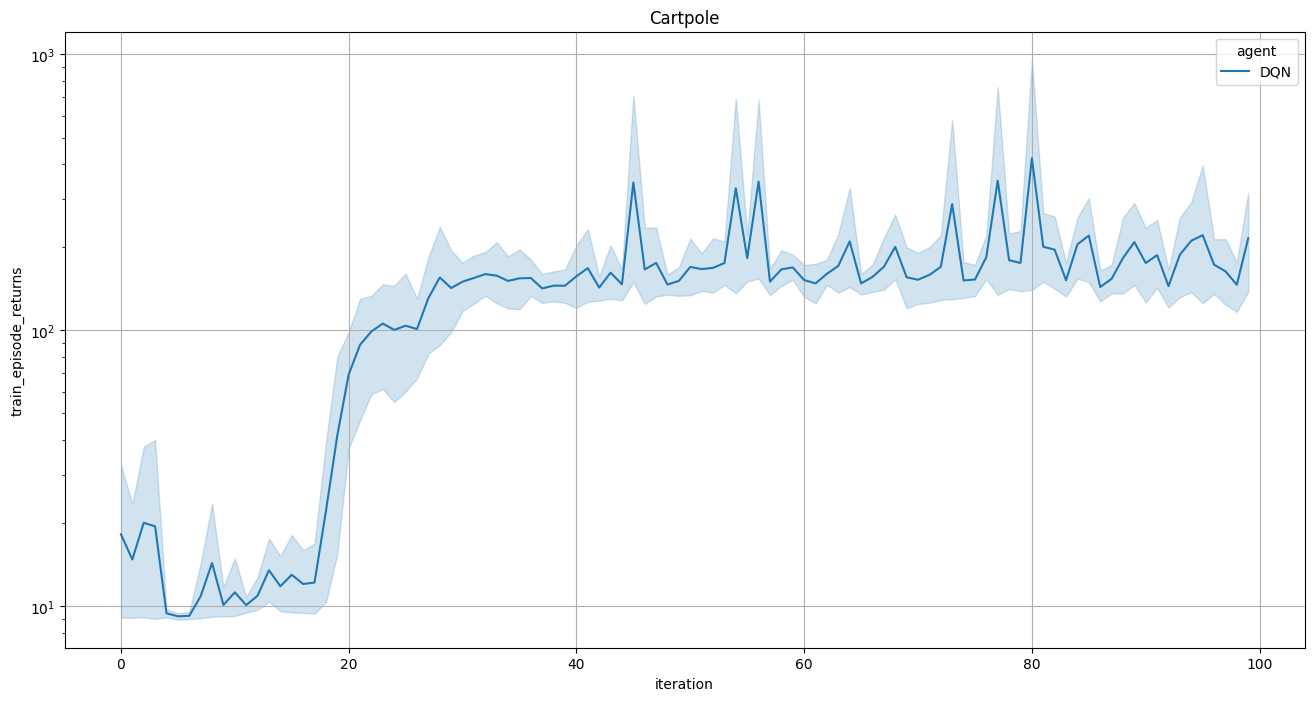

In [17]:
# Read the data
import collections

parameter_set = collections.OrderedDict([
    ('agent', ['DQN']),
    ('game', ['Cartpole'])
])

data = colab_utils.read_experiment(log_files[0], verbose=True,
                                      parameter_set=parameter_set,
                              summary_keys=['train_episode_returns'])

data['agent'] = 'DQN'
data['run'] = 1

for i in range(1,len(log_files)):
  tmp_data = colab_utils.read_experiment(log_files[i], verbose=True,
                                      parameter_set=parameter_set,
                              summary_keys=['train_episode_returns'])
  tmp_data['agent'] = 'DQN'
  tmp_data['run'] = i+1
  data = data.merge(tmp_data, how='outer')

# Plot the data
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='agent',
              data=data, ax=ax)
plt.yscale('log')
plt.grid()
plt.title('Cartpole')
plt.savefig("demo.png")
plt.show()

## Download the data if needed ***Attention: Huge Filesizes!!!***

In [ ]:
from google.colab import files
files.download("demo.png")


!zip -r /content/results.zip /tmp/eval/
files.download("/content/results.zip")